In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [3]:
# Assuming the sampling rate (sr) is given as 22050 Hz
sr = 22050

with open('Signal1.txt', 'r') as file:
    signal = np.loadtxt(file)



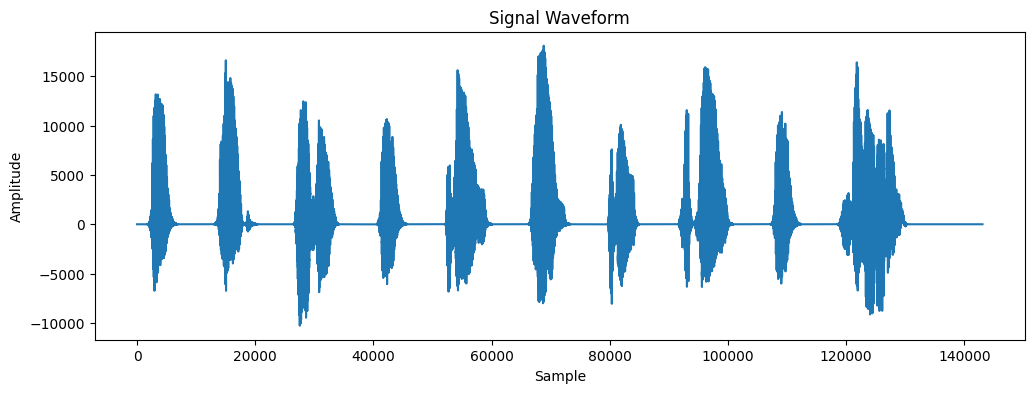

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title('Signal Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [5]:
from IPython.display import Audio

audio_clip = Audio(signal, rate=sr)
audio_clip

In [6]:
solution = ["the", "work", "easy", "the", "time", "long", "two", "prepare", "the", "solution"]

## První pokus: použití slov jako kernelu

In [7]:
import pyttsx3
engine = pyttsx3.init()

# Výběr hlasu pro kernel
voices = engine.getProperty('voices')
for voice in voices:
    if ("en_US" in voice.languages or "en_GB" in voice.languages) and voice.gender == "VoiceGenderNeuter":
        print(f"ID: {voice.id} | Language: {voice.languages} | Gender: {voice.gender} | Name: {voice.name}")


ID: com.apple.speech.synthesis.voice.Albert | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Albert
ID: com.apple.speech.synthesis.voice.BadNews | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bad News
ID: com.apple.speech.synthesis.voice.Bahh | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bahh
ID: com.apple.speech.synthesis.voice.Bells | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bells
ID: com.apple.speech.synthesis.voice.Boing | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Boing
ID: com.apple.speech.synthesis.voice.Bubbles | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bubbles
ID: com.apple.speech.synthesis.voice.Cellos | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Cellos
ID: com.apple.speech.synthesis.voice.Deranged | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Wobble
ID: com.apple.eloquence.en-GB.Eddy | Language: ['en_GB'] | Gender: VoiceGenderNeuter | Name: Eddy (English (UK))
ID: com.apple.el

In [8]:
desired_voice_id = "com.apple.eloquence.en-US.Reed"
engine.setProperty('voice', desired_voice_id)
engine.say("time, prepare, solution")
engine.runAndWait()


In [9]:
from gtts import gTTS
import os

def text_to_speech(text, filename):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)

words = [
    "time", "prepare", "solution", "make", "mistake", "no", "the", "probable", "long", "lecture",
    "method", "disaster", "fail", "work", "advice", "idea", "succeed", "easy", "is", "for", "give"
]

for word in words:
    text_to_speech(word, f"words/{word}.mp3")


In [10]:
from pydub import AudioSegment

for word in words:
    sound = AudioSegment.from_mp3(f"words/{word}.mp3")
    sound.export(f"words/{word}.wav", format="wav")


In [11]:
import librosa

def load_audio_to_numpy(filename):
    signal, loaded_sr = librosa.load(filename, sr=sr)
    print(f"Loaded {filename} with sampling rate {loaded_sr}")
    return signal

audio_signals = {}
for word in words:
    audio_signals[word] = load_audio_to_numpy(f"words/{word}.wav")


Loaded words/time.wav with sampling rate 22050
Loaded words/prepare.wav with sampling rate 22050
Loaded words/solution.wav with sampling rate 22050
Loaded words/make.wav with sampling rate 22050
Loaded words/mistake.wav with sampling rate 22050
Loaded words/no.wav with sampling rate 22050
Loaded words/the.wav with sampling rate 22050
Loaded words/probable.wav with sampling rate 22050
Loaded words/long.wav with sampling rate 22050
Loaded words/lecture.wav with sampling rate 22050
Loaded words/method.wav with sampling rate 22050
Loaded words/disaster.wav with sampling rate 22050
Loaded words/fail.wav with sampling rate 22050
Loaded words/work.wav with sampling rate 22050
Loaded words/advice.wav with sampling rate 22050
Loaded words/idea.wav with sampling rate 22050
Loaded words/succeed.wav with sampling rate 22050
Loaded words/easy.wav with sampling rate 22050
Loaded words/is.wav with sampling rate 22050
Loaded words/for.wav with sampling rate 22050
Loaded words/give.wav with sampling ra

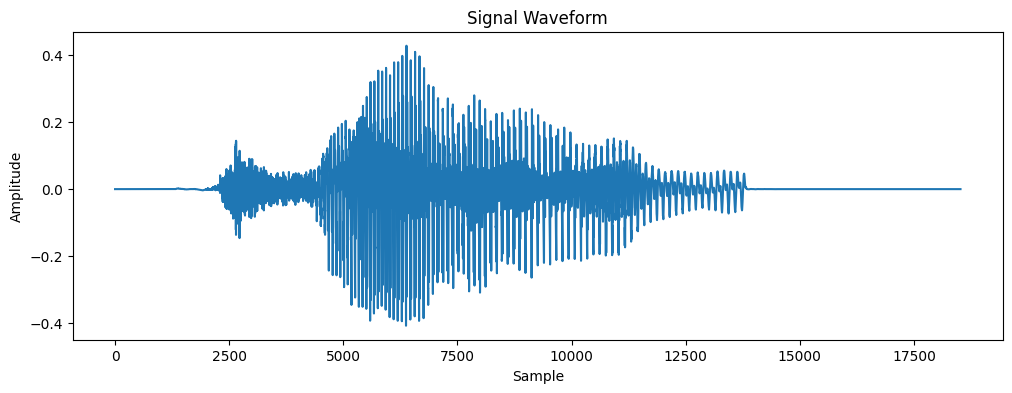

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(audio_signals["time"])
plt.title('Signal Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
audio_clip = Audio(audio_signals["time"], rate=sr)
audio_clip

In [13]:
convolved_signals = {}
for word in words:
  convolved_signals[word] = np.convolve(signal, audio_signals[word], mode='same')


In [14]:
cross_correlations = {}
for word in words:
  cross_correlations[word] = np.correlate(signal, audio_signals[word], mode='same')

In [15]:
conv_cross = {}
for word in words:
  conv_cross[word] = convolved_signals[word] * cross_correlations[word]

In [16]:
# Function to calculate covariance
# def calculate_covariance(signal1, signal2):
#     return np.cov(signal1, signal2)[0, 1]

# covariances_dict = {}

# for word in words:
#   word_length = len(audio_signals[word])

#   # Array to store covariance values
#   covariances = []

#   # Slide the word's signal over the target signal
#   for i in range(len(signal) - word_length + 1):
#       segment = signal[i:i + word_length]
#       cov = calculate_covariance(audio_signals[word], segment)
#       covariances.append(cov)

#   covariances_dict[word] = covariances

In [17]:
for word in words:
  # plt.figure(figsize=(12, 4))
  # plt.plot(convolved_signals[word])
  # plt.title("Convolved Signal by " + word)
  # plt.xlabel("Sample")
  # plt.ylabel("Correlation")
  # plt.show()

  # plt.figure(figsize=(12, 4))
  # plt.plot(cross_correlations[word])
  # plt.title("Cross-Correlation by " + word)
  # plt.xlabel("Sample")
  # plt.ylabel("Correlation")
  # plt.show()

  # plt.figure(figsize=(12, 4))
  # plt.plot(conv_cross[word])
  # plt.title("Convolved Signal * Cross-Correlation by " + word)
  # plt.xlabel("Sample")
  # plt.ylabel("Amplitude")
  # plt.show()

  # plt.figure(figsize=(12, 4))
  # plt.plot(covariances_dict[word])
  # plt.title("Covariance by " + word)
  # plt.xlabel("Sample")
  # plt.ylabel("Amplitude")
  # plt.show()
  pass

[  0   1   2  16  17  18  19  20  21  22  23  24  25  26  27  47  48  49
  50  51  52  53  54  55  56  57  78  79  80  81  82  83  84  85  86  87
  88  89 104 105 106 107 108 109 110 111 112 113 114 115 116 137 138 139
 140 141 142 143 144 145 146 147 148 167 168 169 170 171 172 173 174 175
 176 177 178 193 194 195 196 197 198 199 200 201 202 203 204 205 229 230
 231 232 233 234 235 236 237 238 239 240 255 256 257 258 259 260 261 262
 263 264 265 266 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324]
[(0, 16), (17, 47), (48, 78), (79, 104), (105, 116), (117, 137), (138, 167), (168, 193), (194, 205), (206, 229), (230, 255), (256, 296), (297, 308), (309, 320), (321, 325)]


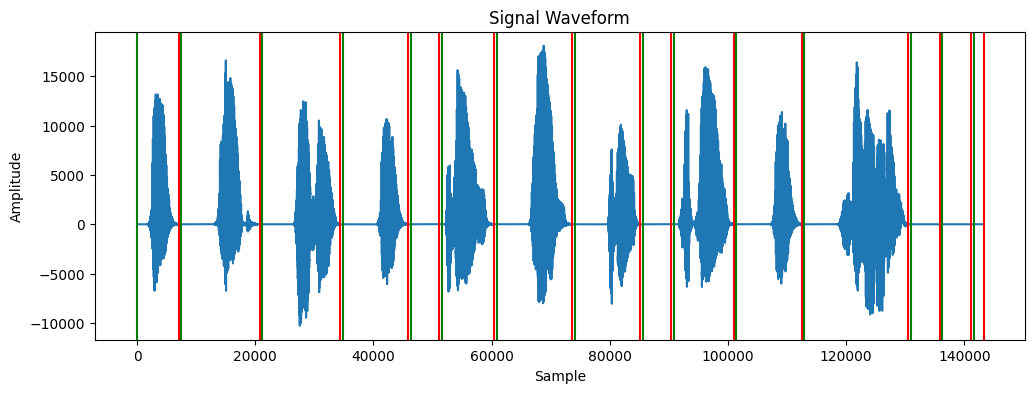

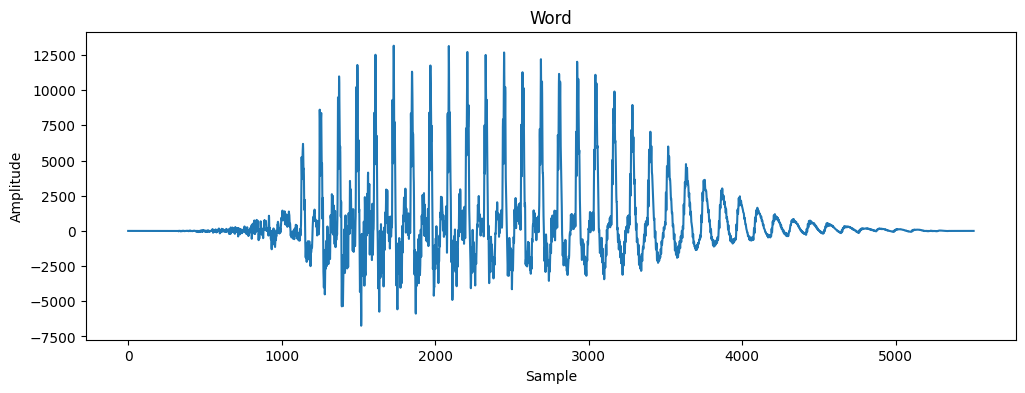

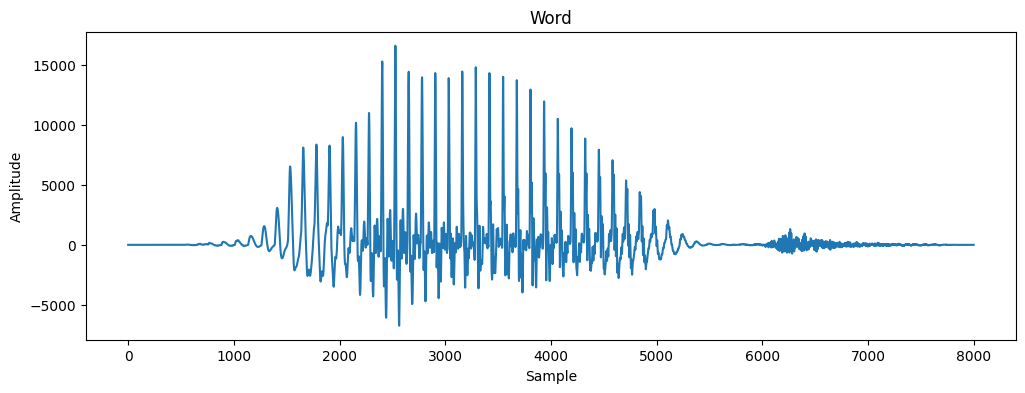

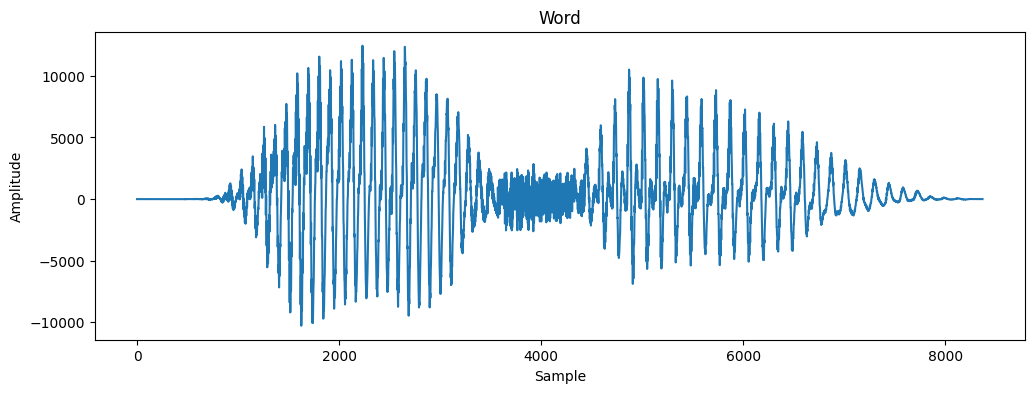

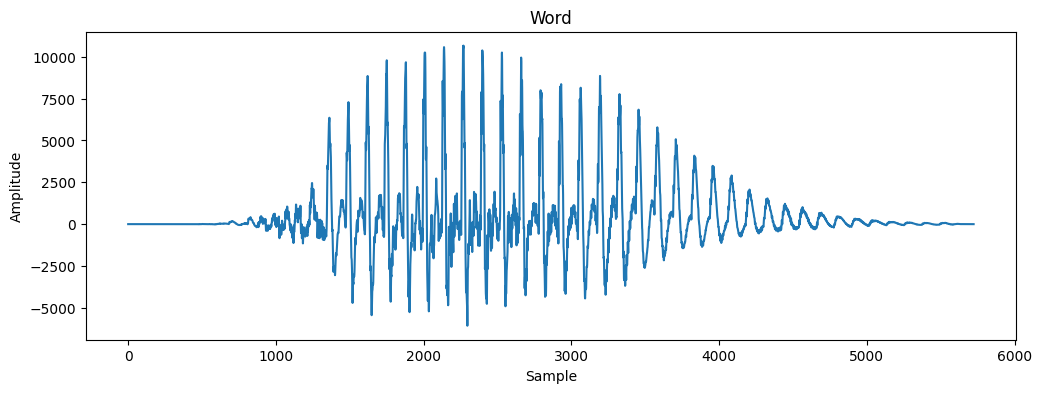

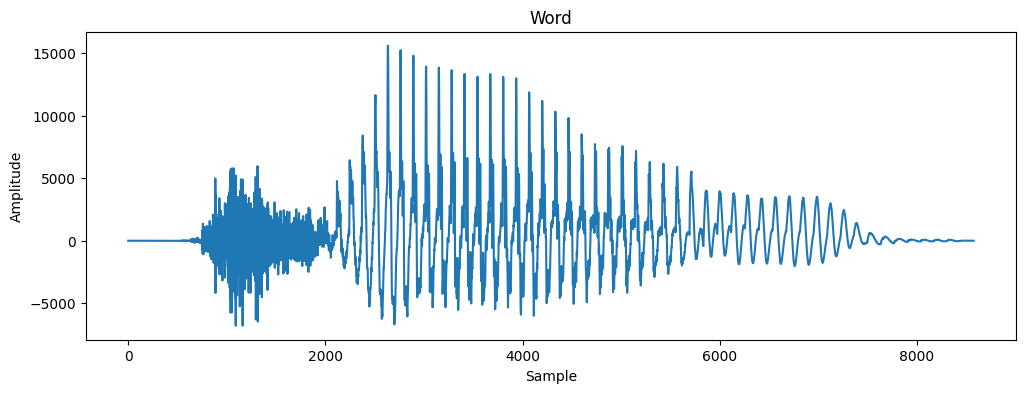

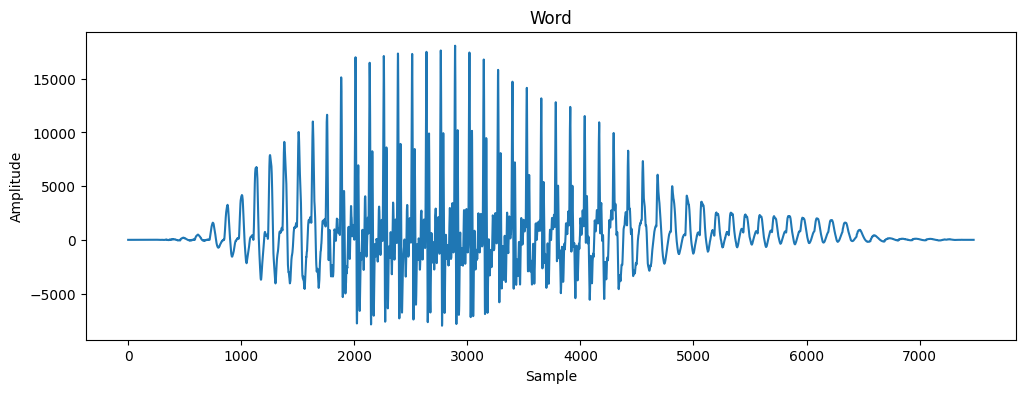

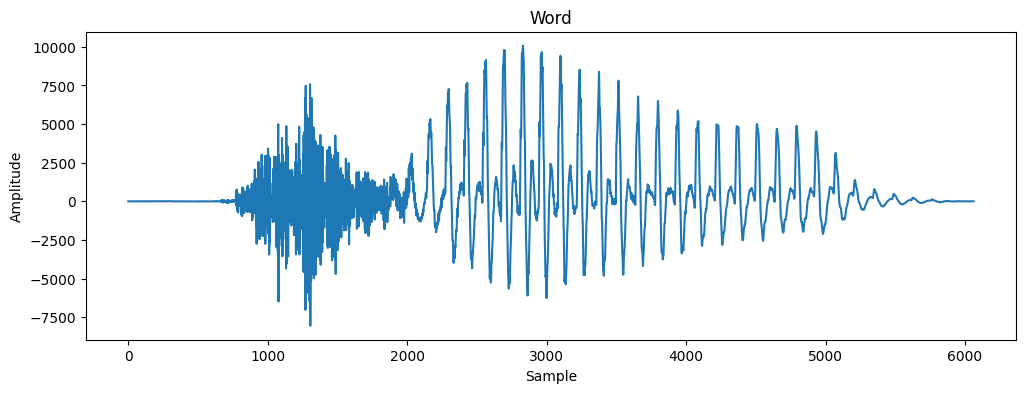

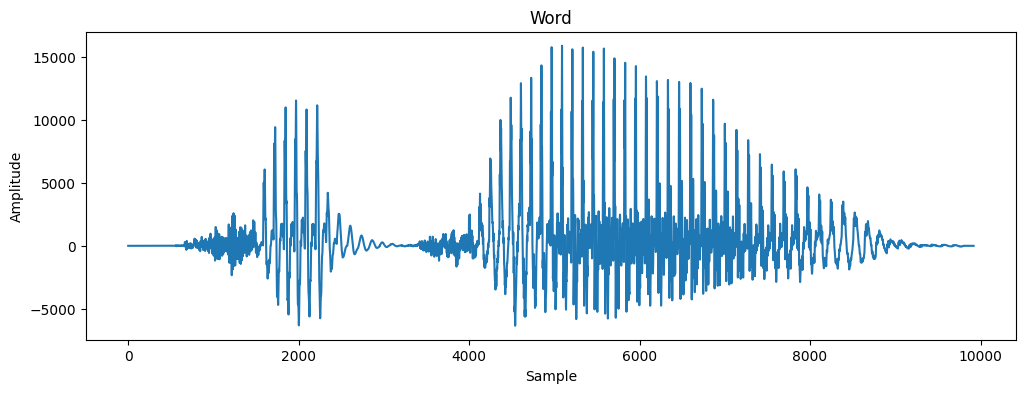

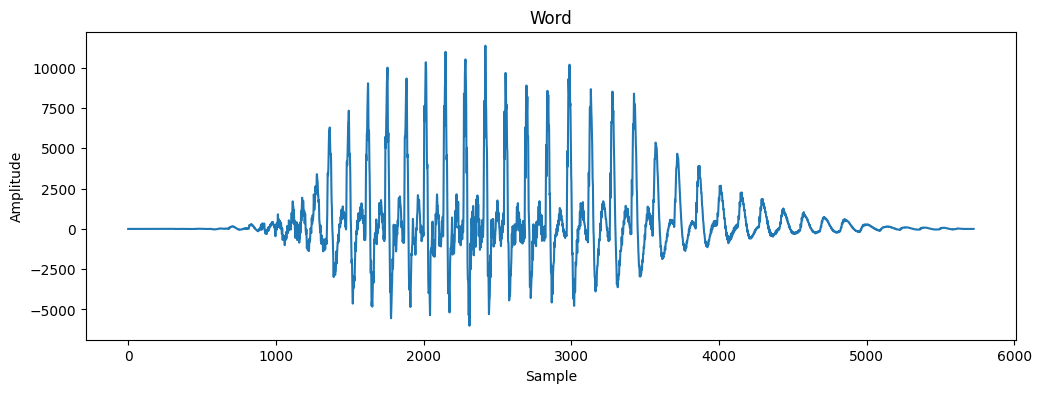

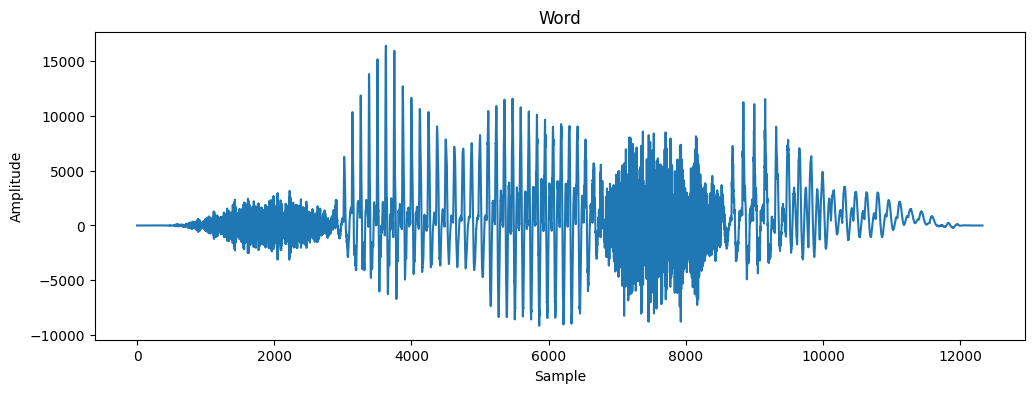

In [18]:
def calculate_energy(signal, frame_size):
    energy = np.array([
        np.sum(np.abs(signal[i:i+frame_size]**2))
        for i in range(0, len(signal), frame_size)
    ])
    return energy

frame_size = int(sr * 0.02)  # Example frame size of 20ms
energy = calculate_energy(signal, frame_size)

threshold = 0.001
min_silence_length = 0.2
silence_boundaries = np.where(energy < threshold)[0]

print(silence_boundaries)

word_boundaries = []
start = 0

for end in silence_boundaries:
    if (end - start) * frame_size > min_silence_length * sr: 
        word_boundaries.append((start, end))
        start = end + 1

if start < len(energy):
    word_boundaries.append((start, len(energy)))

print(word_boundaries)

# plot the boundaries on the signal graph
plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title("Signal Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
for start, end in word_boundaries:
    plt.axvline(x=start*frame_size, color="green")
    plt.axvline(x=end*frame_size, color="red")
plt.show()

word_signals = [signal[start*frame_size:end*frame_size] for start, end in word_boundaries]

# trim silence from the beginning and end of each word
for i, word in enumerate(word_signals):
    for j in range(len(word)):
        if np.abs(word[j]) < threshold:
            word_start = j
        else:
            break
    for j in range(len(word)-1, -1, -1):
        if np.abs(word[j]) < threshold:
            word_end = j
        else:
            break
    if word_end - word_start > 0:
        word_signals[i] = word[word_start:word_end]
    else:
        # if the word is empty after trimming, just remove it
        word_signals[i] = None

word_signals = [word for word in word_signals if word is not None]


for word in word_signals:
    plt.figure(figsize=(12, 4))
    plt.plot(word)
    plt.title("Word")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()


In [19]:
audio_clip = Audio(word_signals[5], rate=sr)
audio_clip

In [20]:
# normalize both the detected words and the generated words to -1 to 1
# this is probably not necessary, but it makes the visualization easier
word_signals = [word / np.max(np.abs(word)) for word in word_signals]
audio_signals = {word: audio_signals[word] / np.max(np.abs(audio_signals[word])) for word in audio_signals}

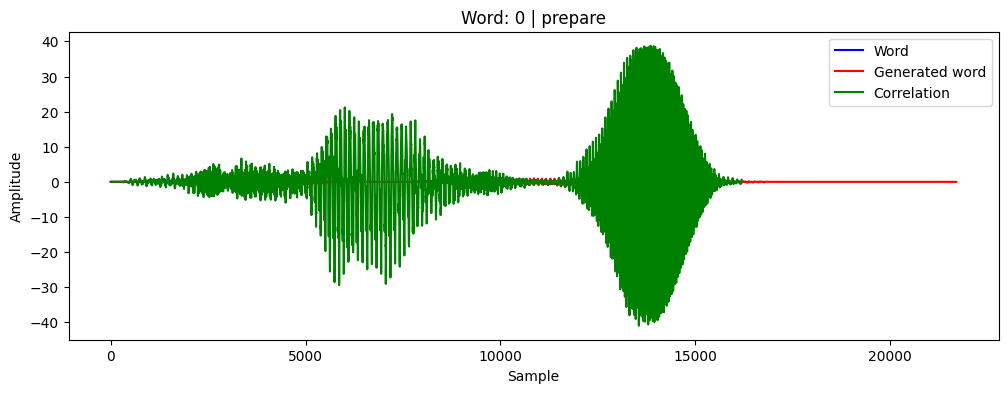

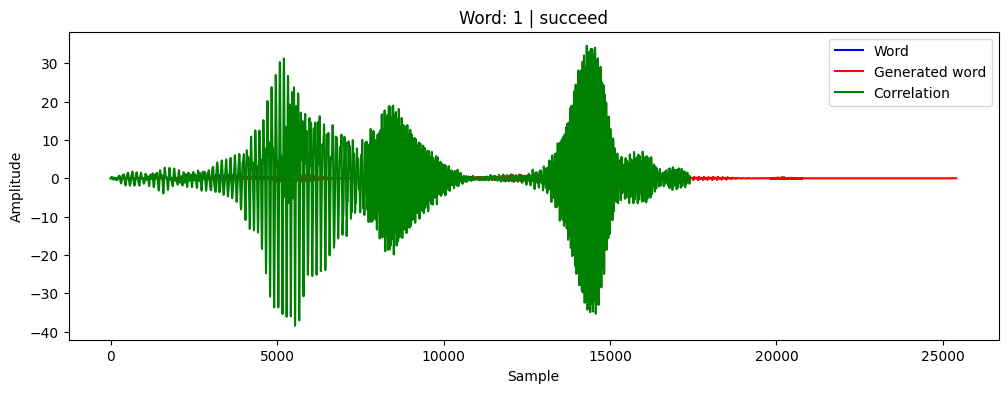

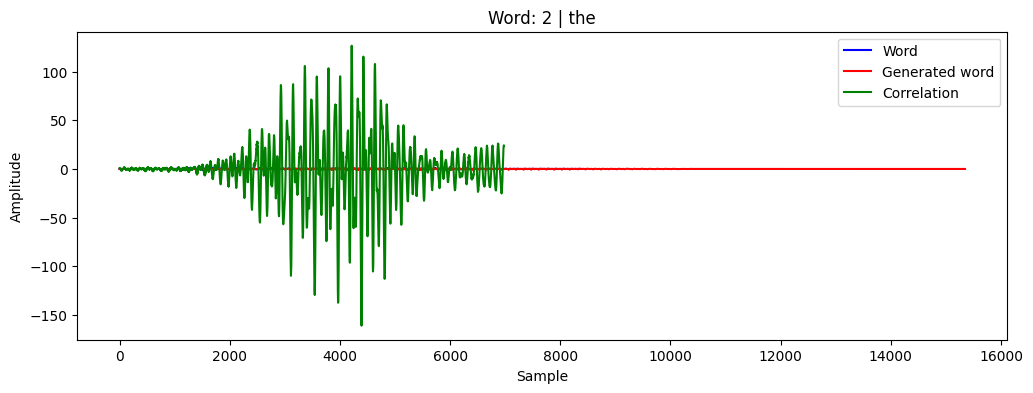

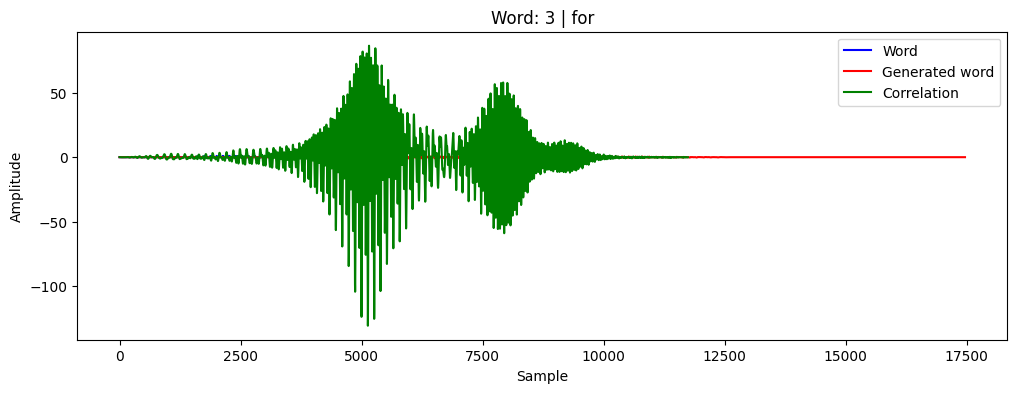

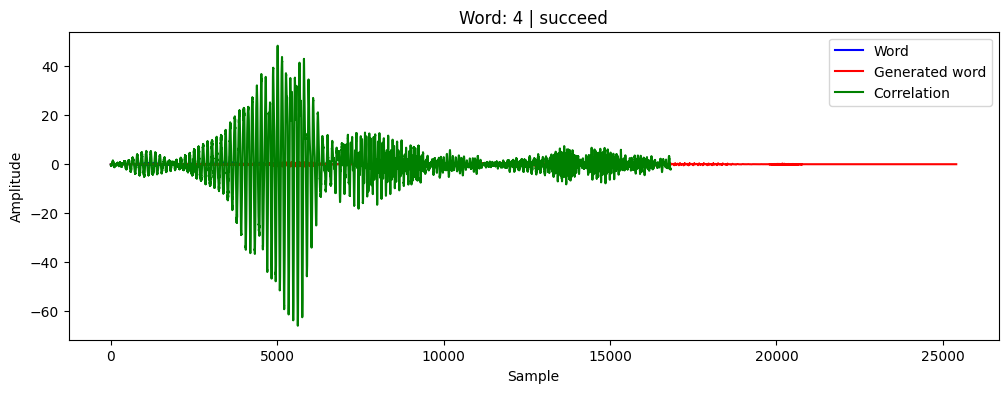

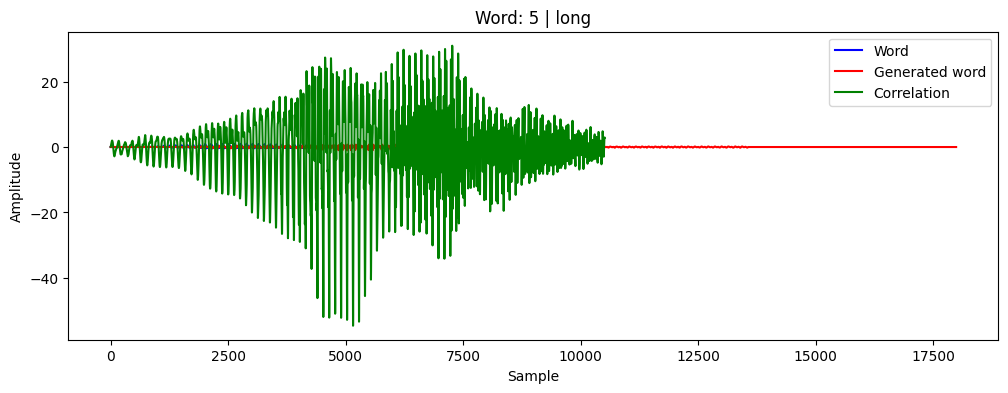

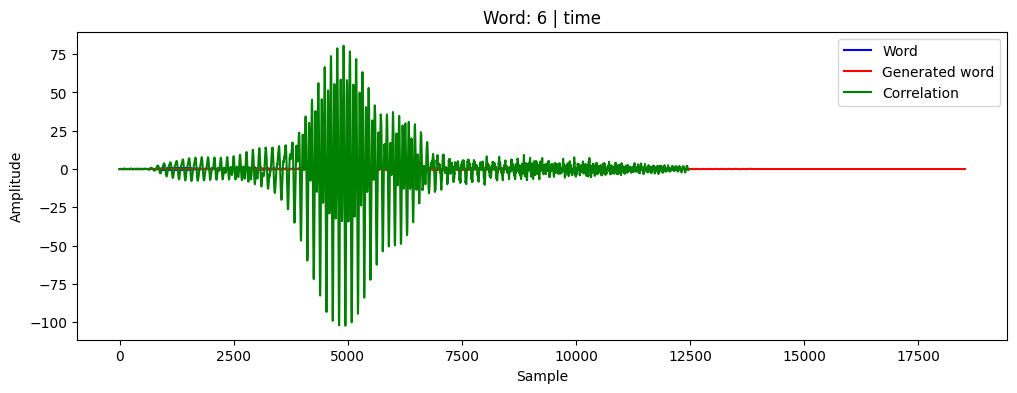

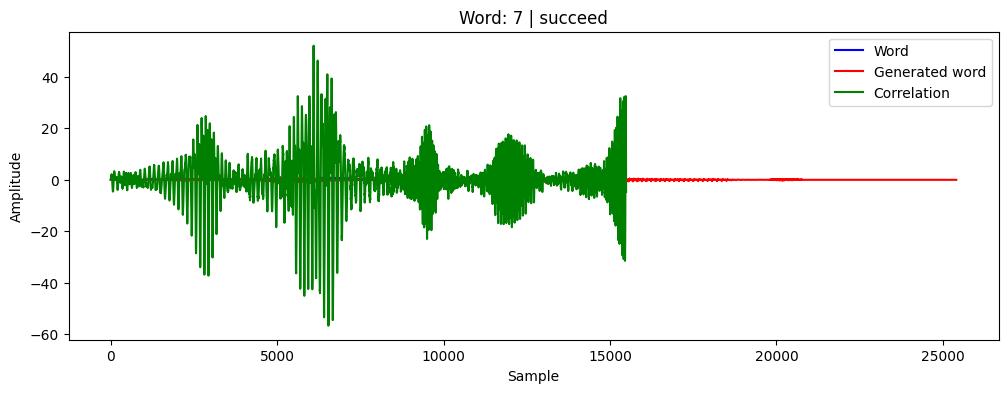

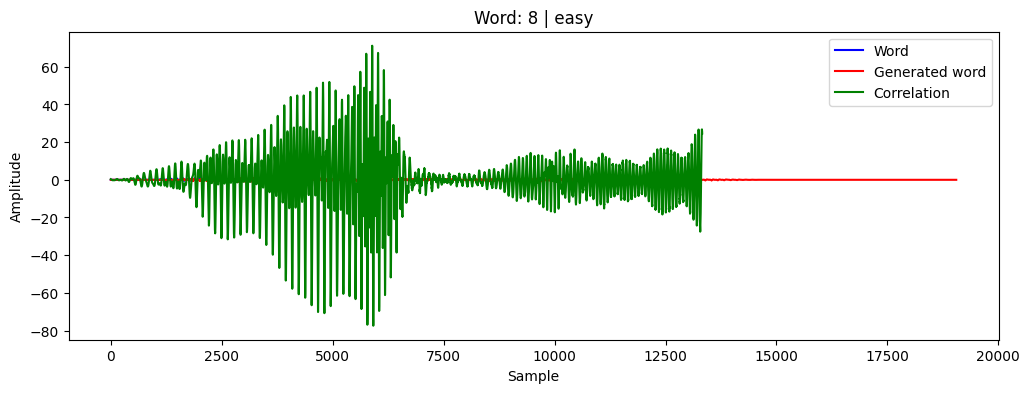

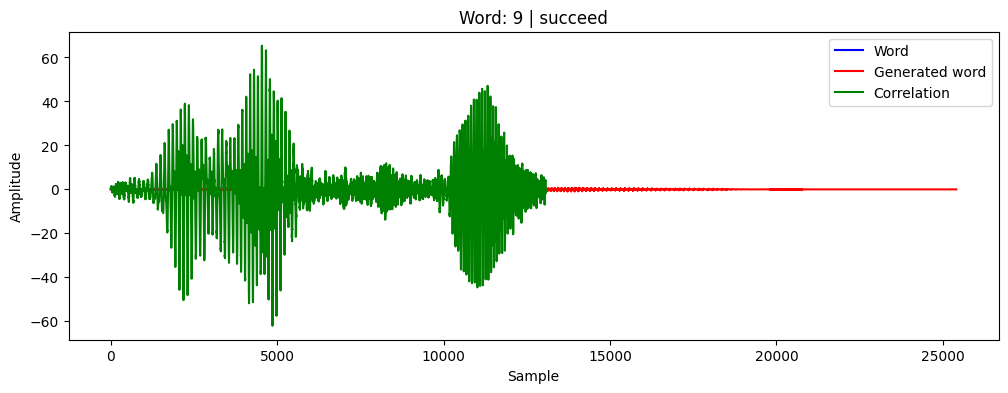

['prepare', 'succeed', 'the', 'for', 'succeed', 'long', 'time', 'succeed', 'easy', 'succeed']


In [21]:
best_matches = []
for i, word in enumerate(word_signals):
    best_match = None
    best_match_max = None
    best_result = None

    for generated_word in words:
        result = np.correlate(word, audio_signals[generated_word], mode='valid')
        if best_match_max is None or np.sum(result ** 2) > best_match_max:
            best_match = generated_word
            best_match_max = np.sum(result ** 2)
            best_result = result
    best_matches.append(best_match)

    plt.figure(figsize=(12, 4))
    plt.title("Word: " + str(i) + " | " + best_match)
    plt.plot(word, color="blue", label="Word")
    plt.plot(audio_signals[best_match], color="red", label="Generated word")
    plt.plot(best_result, color="green", label="Correlation")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

print(best_matches)





In [22]:
# compare the found out words with the solution
def compare_result_to_solution(result, solution):
    correct = 0
    for i, word in enumerate(result):
        if word == solution[i]:
            correct += 1
        else:
            print(f"Word {i} should be {solution[i]}, but was {word}")

    print(f"Correct: {correct}/{len(solution)}")

compare_result_to_solution(best_matches, solution)


Word 0 should be the, but was prepare
Word 1 should be work, but was succeed
Word 2 should be easy, but was the
Word 3 should be the, but was for
Word 4 should be time, but was succeed
Word 6 should be two, but was time
Word 7 should be prepare, but was succeed
Word 8 should be the, but was easy
Word 9 should be solution, but was succeed
Correct: 1/10


## Frekvenční oblast

In [23]:
word_signals_ft = [np.fft.fft(word) for word in word_signals]
audio_signals_ft = {word: np.fft.fft(audio_signals[word]) for word in audio_signals}

/Users/lpriban/Desktop/codegarden/pzs/sem_2/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lpriban/Desktop/codegarden/pzs/sem_2/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


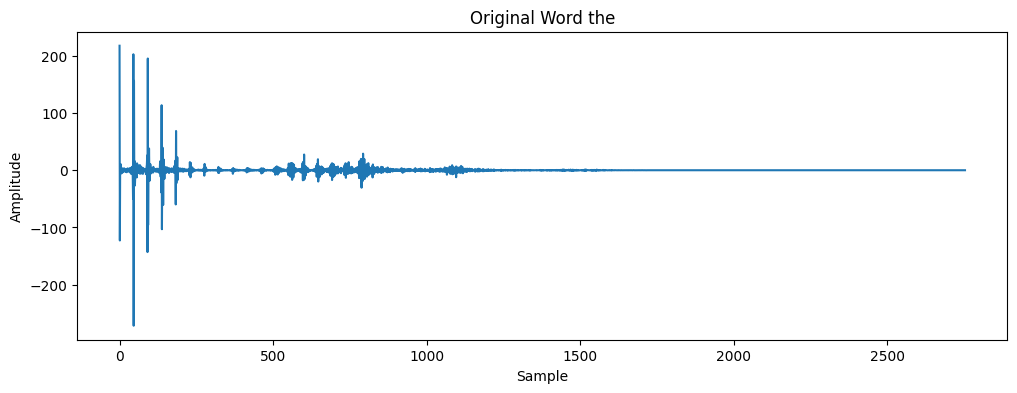

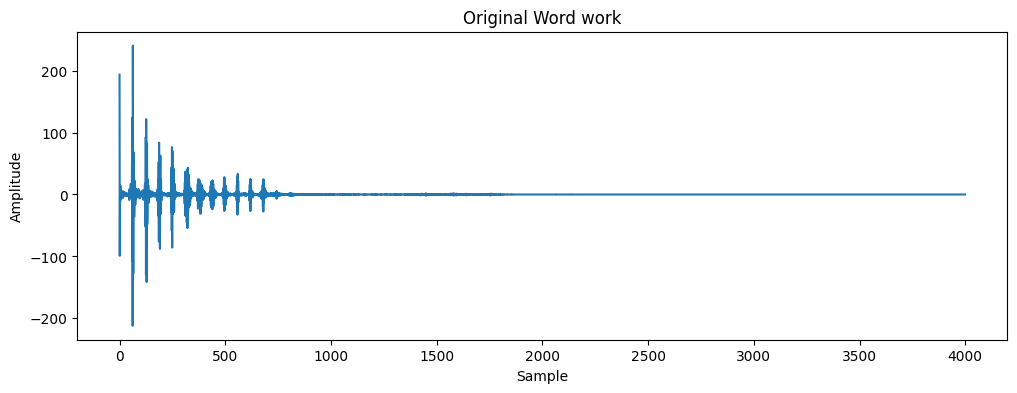

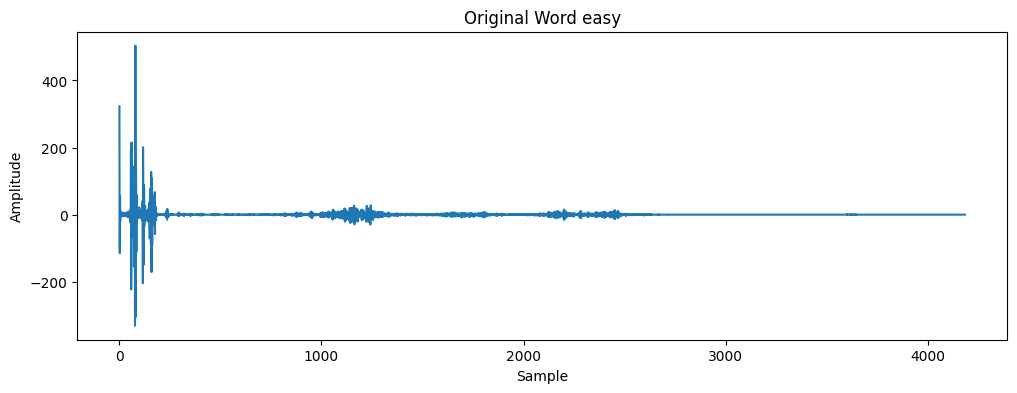

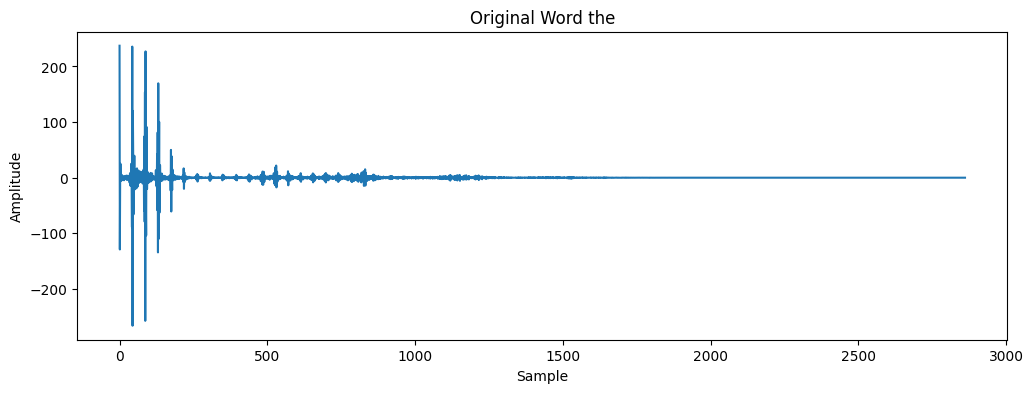

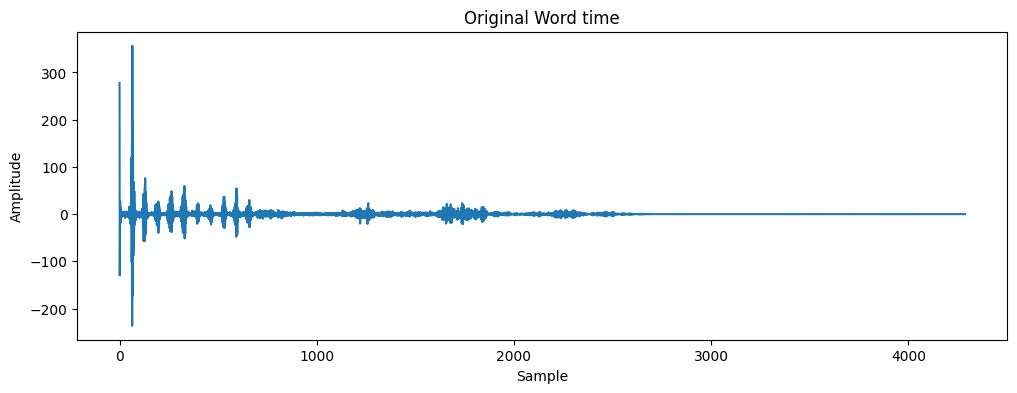

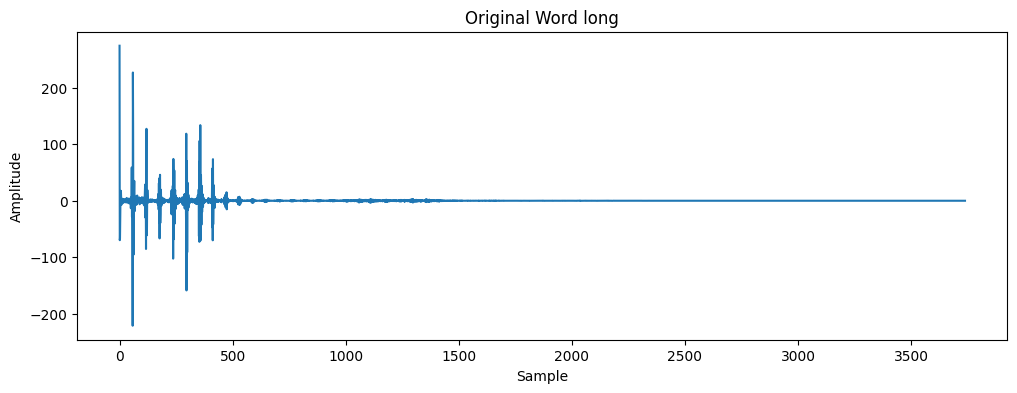

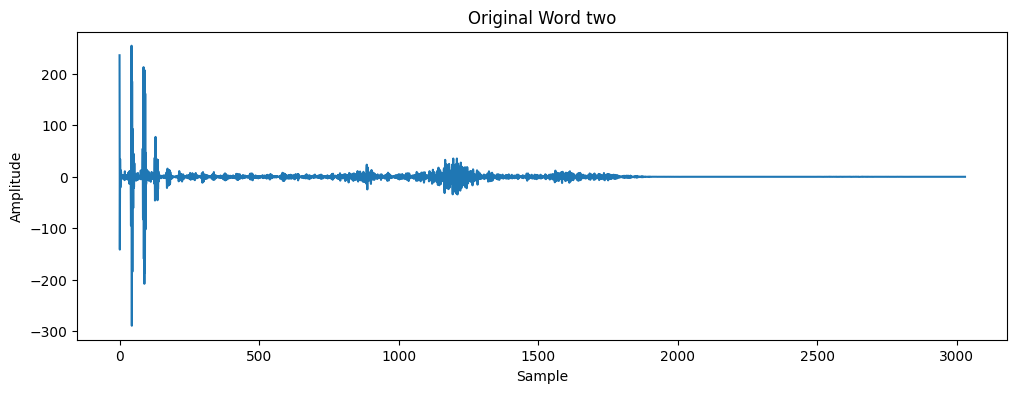

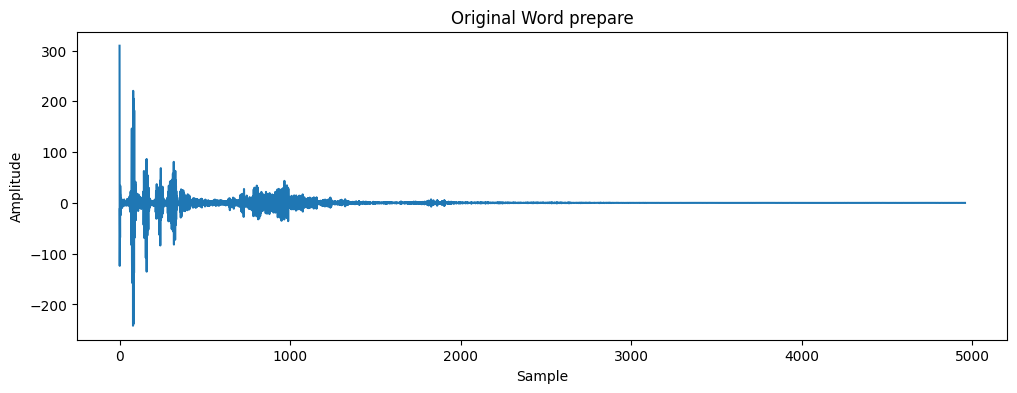

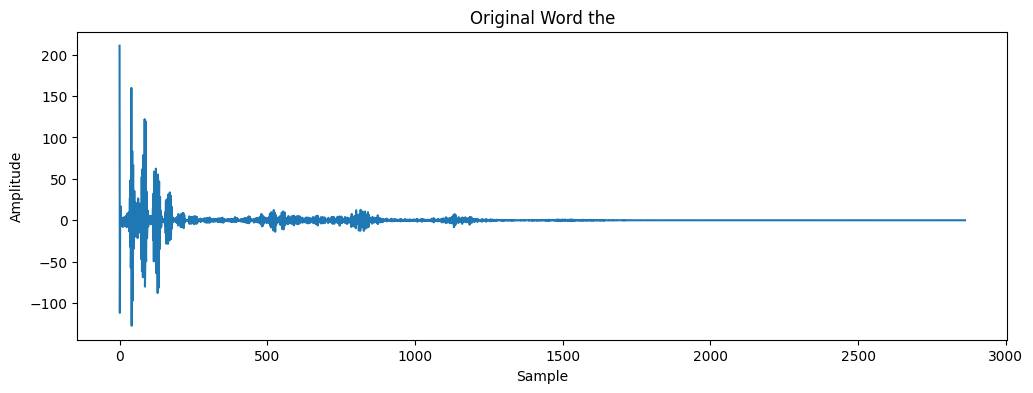

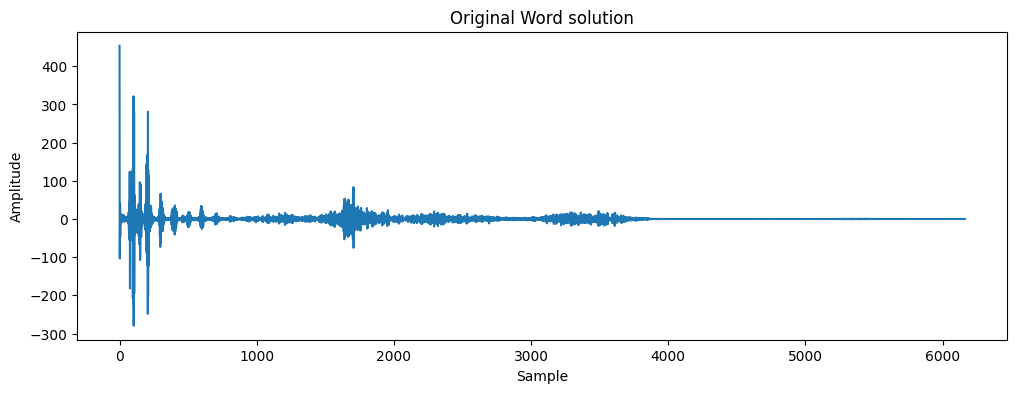

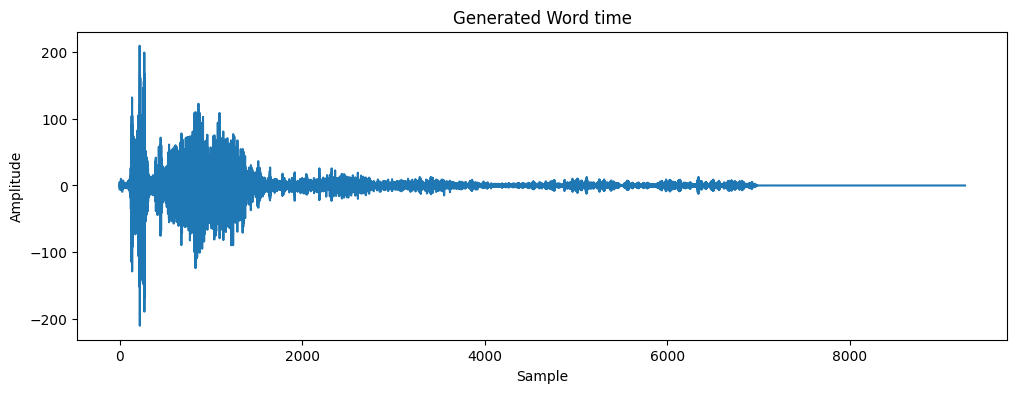

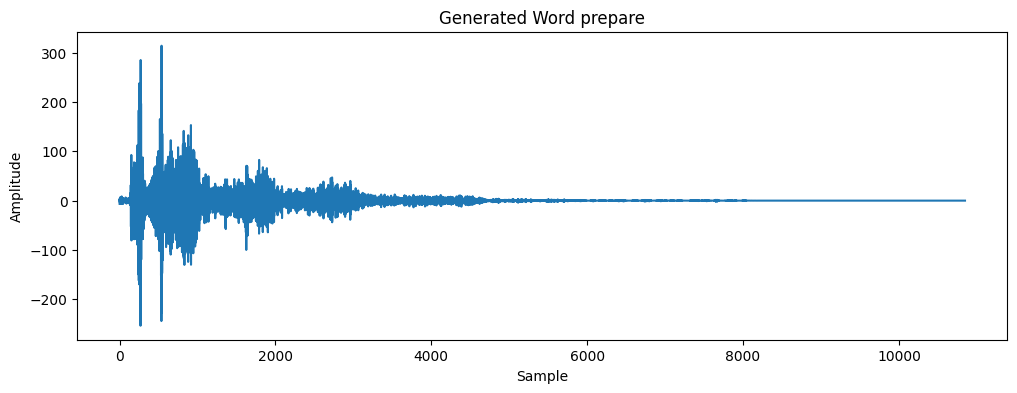

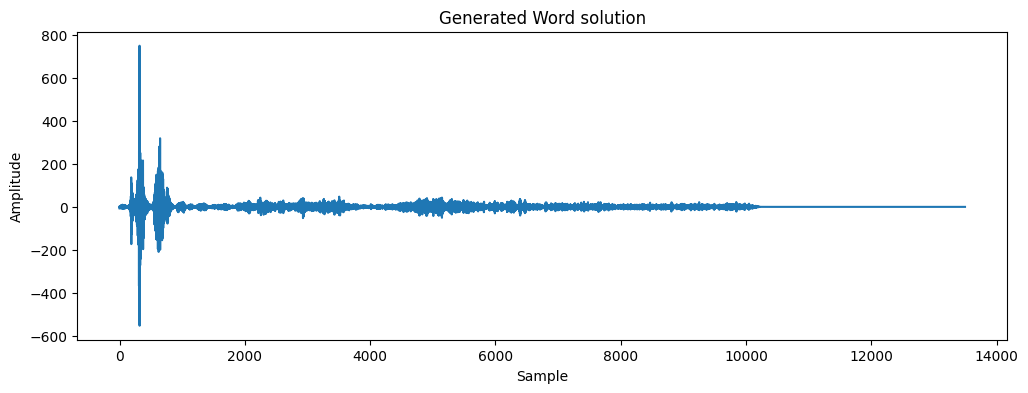

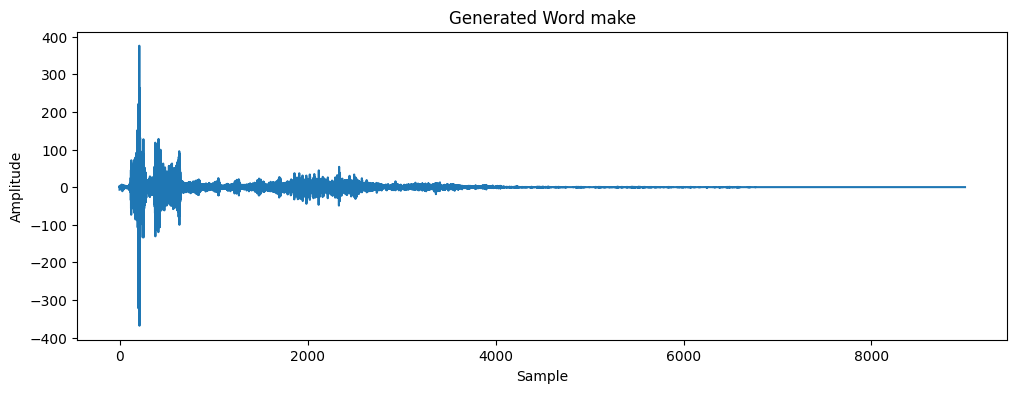

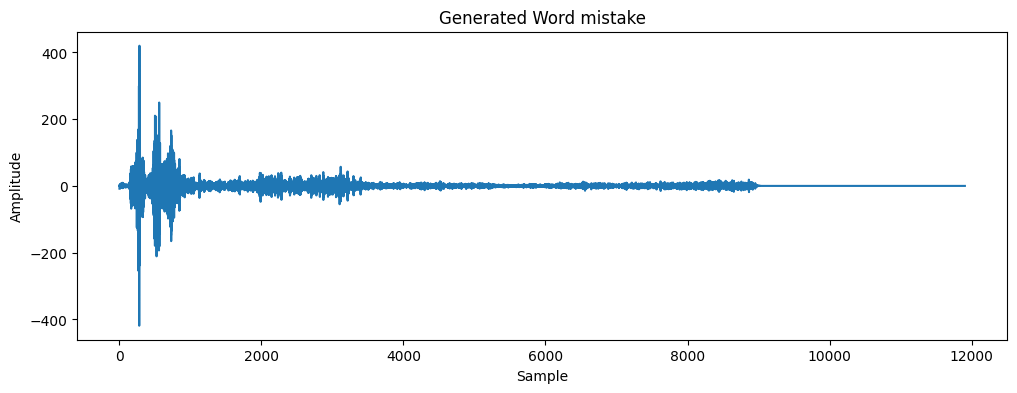

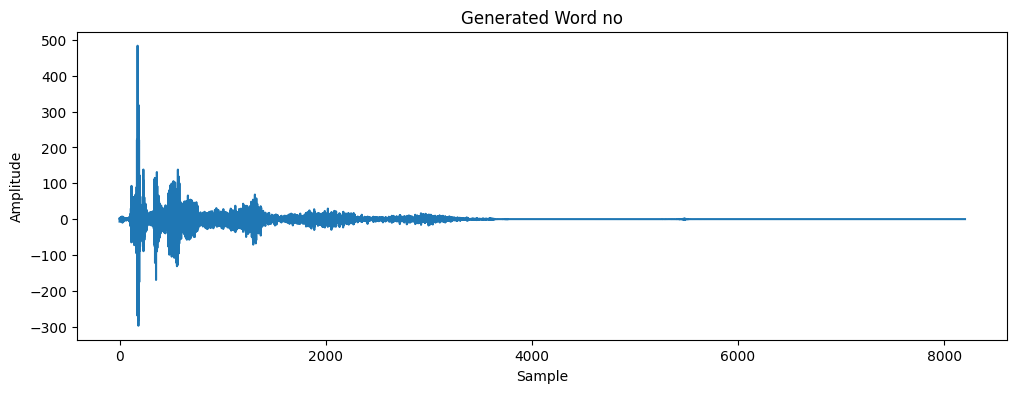

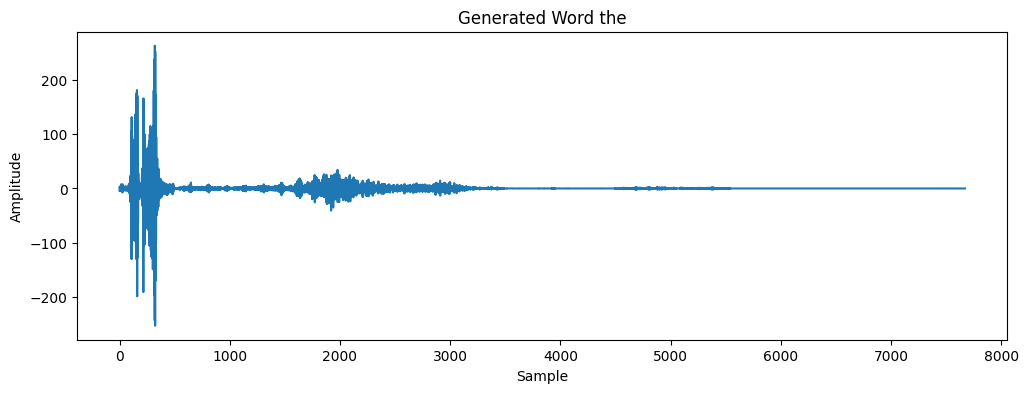

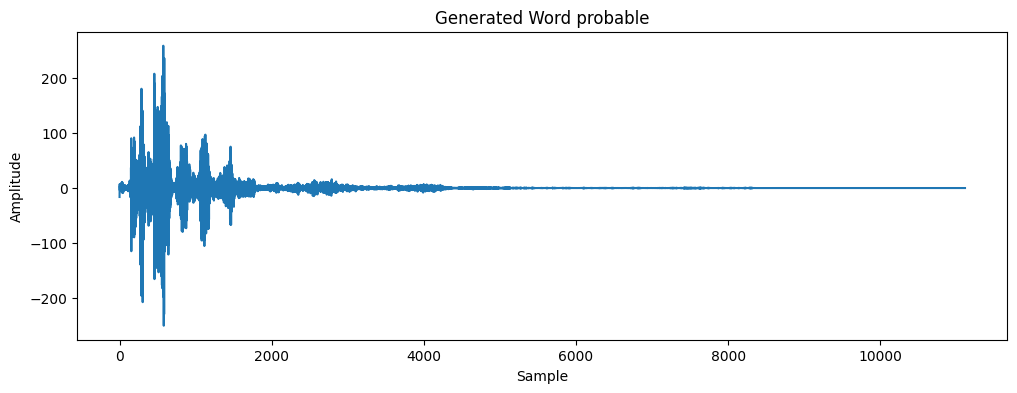

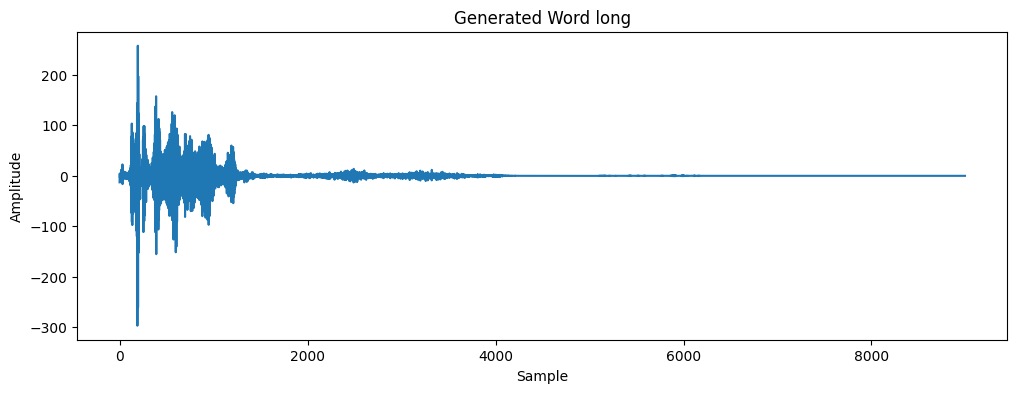

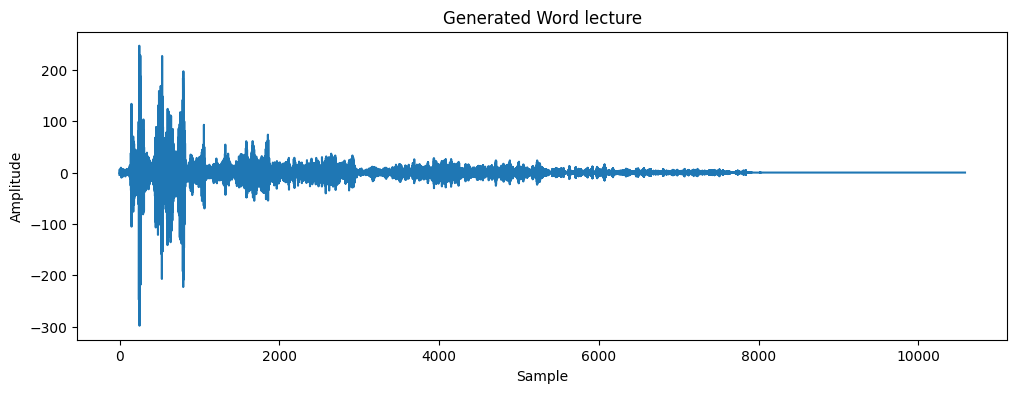

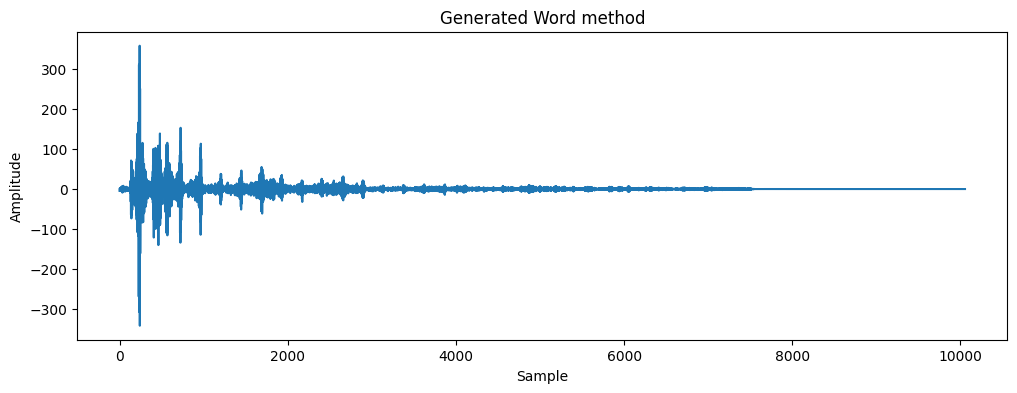

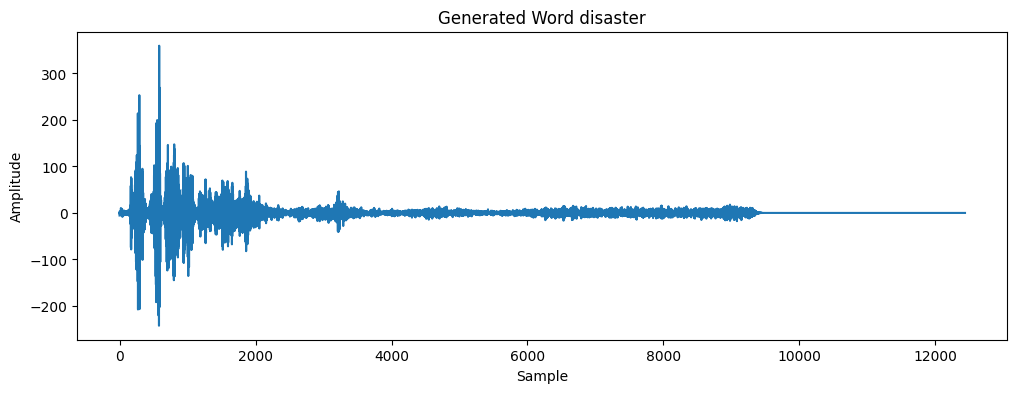

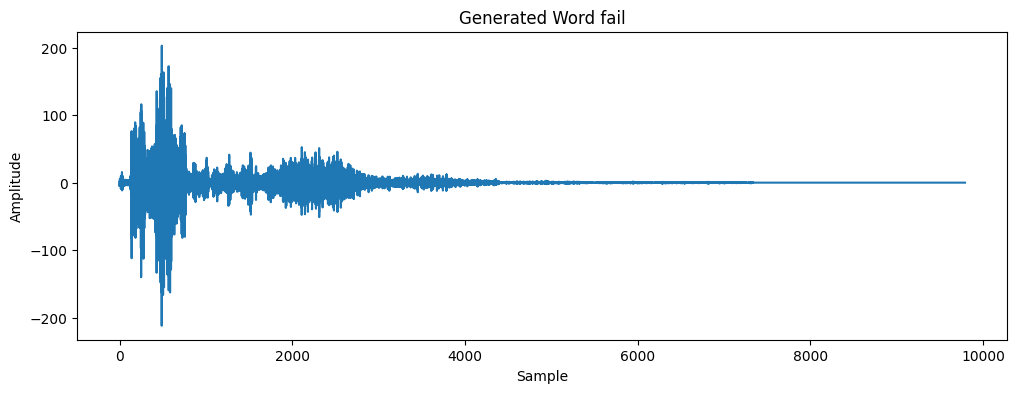

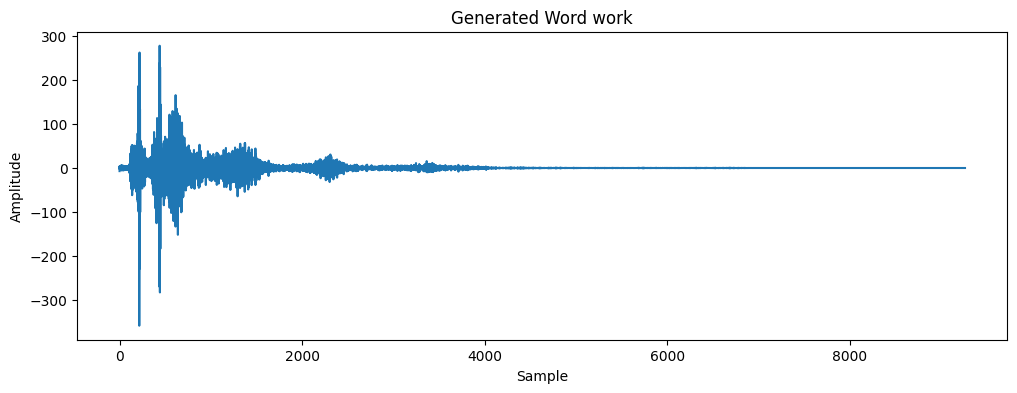

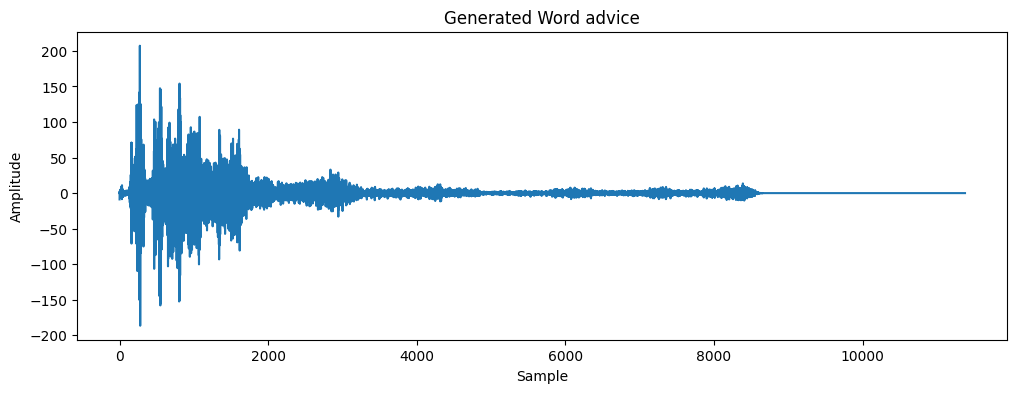

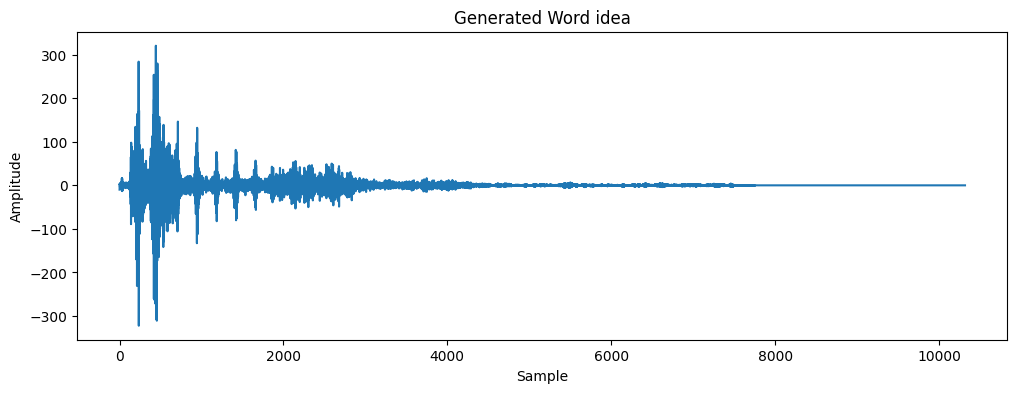

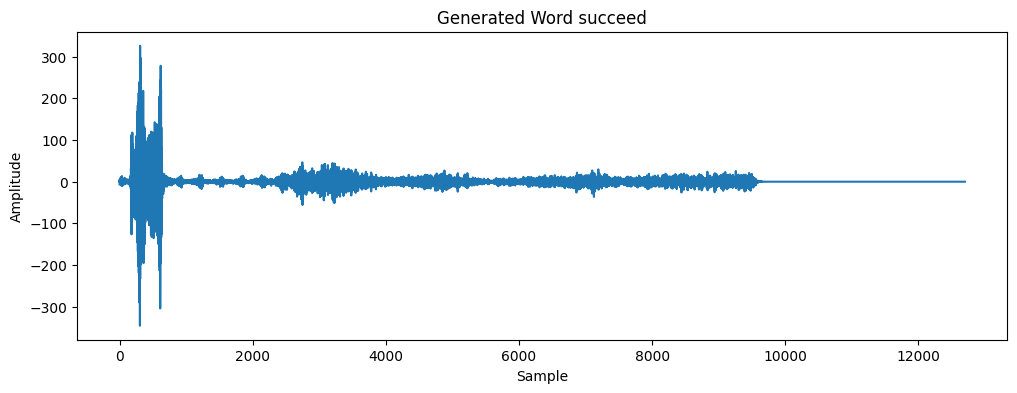

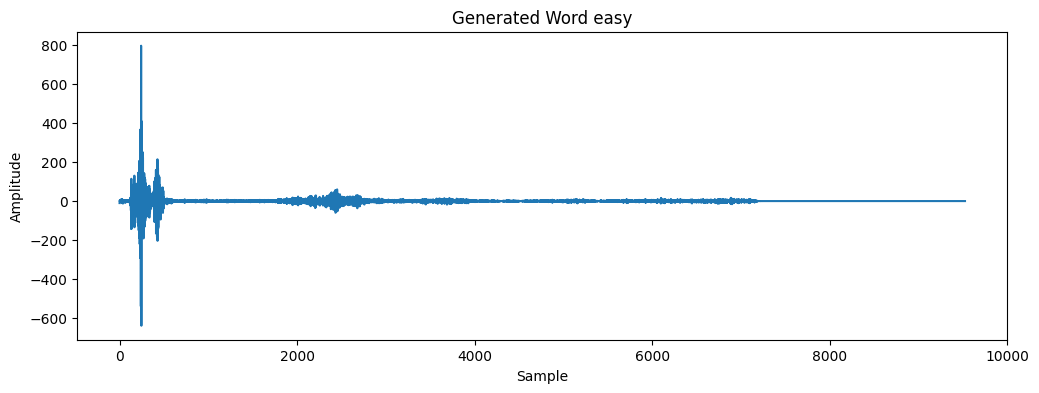

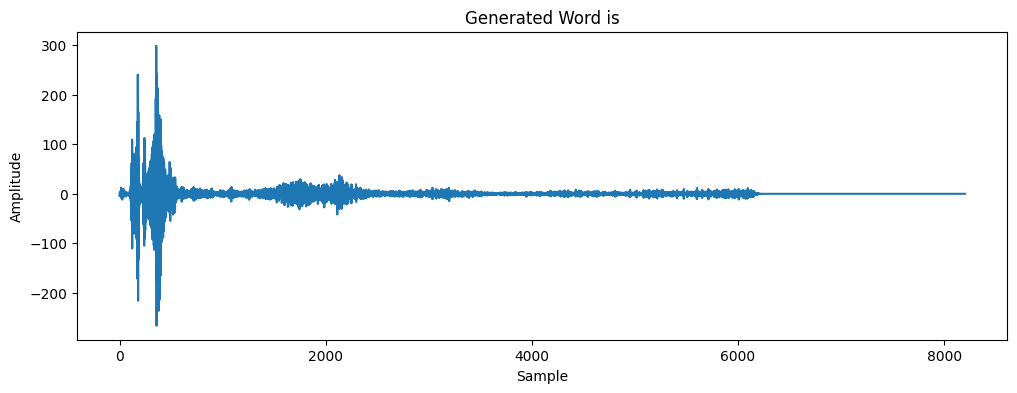

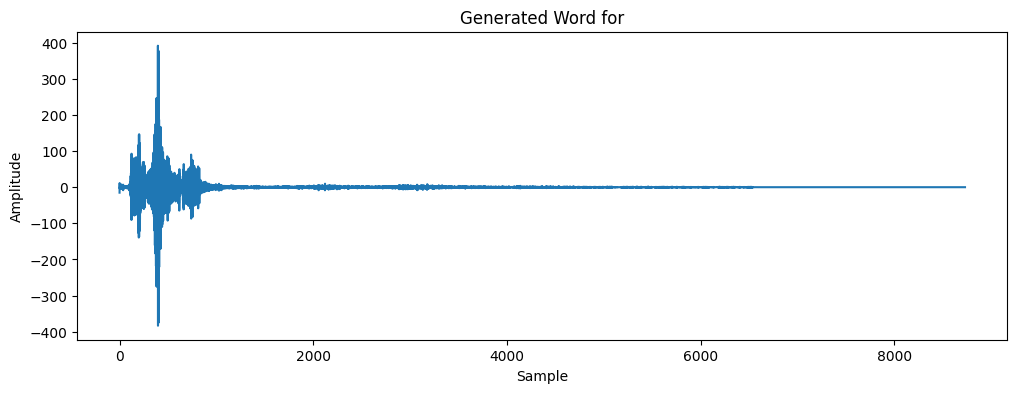

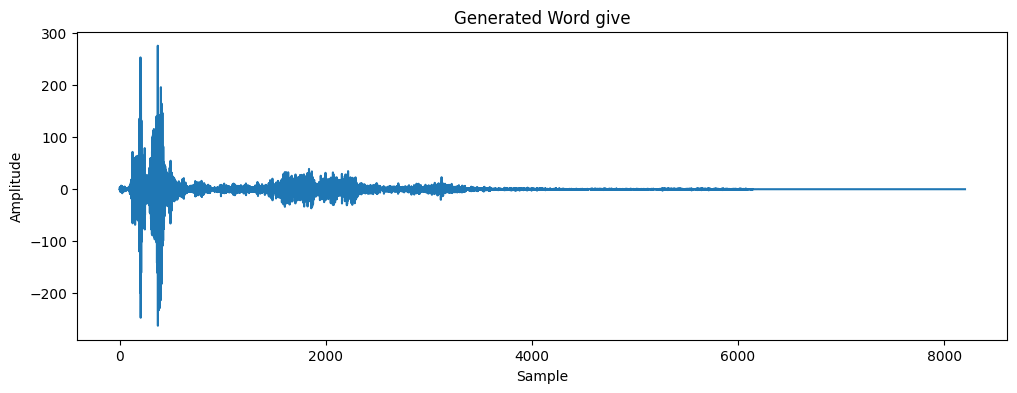

In [24]:
for i, ft in enumerate(word_signals_ft):
    plt.figure(figsize=(12, 4))
    plt.plot(ft[:len(ft)//2])
    plt.title("Original Word " + solution[i])
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

for word in words:
    plt.figure(figsize=(12, 4))
    plt.plot(audio_signals_ft[word][:len(audio_signals_ft[word])//2])
    plt.title("Generated Word " + word)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

In [25]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Example usage
fs = 22050  # Sampling rate
lowcut = 300.0  # Lower frequency bound (in Hz)
highcut = 3400.0  # Upper frequency bound (in Hz)

# Assuming word_signals is a list of numpy arrays (each array is a time-domain signal)
filtered_word_signals = [bandpass_filter(signal, lowcut, highcut, fs) for signal in word_signals]

# Assuming audio_signals is a dictionary with words as keys and numpy arrays (time-domain signals) as values
filtered_audio_signals = {word: bandpass_filter(signal, lowcut, highcut, fs) for word, signal in audio_signals.items()}

In [26]:
# compare filtered and unfiltered


In [27]:
filtered_word_signals_ft = [np.fft.fft(word) for word in filtered_word_signals]
filtered_audio_signals_ft = {word: np.fft.fft(filtered_audio_signals[word]) for word in filtered_audio_signals}

# normalize both the detected words and the generated words to -1 to 1
filtered_word_signals_ft = [np.abs(word / np.max(np.abs(word))) for word in filtered_word_signals_ft]
filtered_audio_signals_ft = {word: np.abs(filtered_audio_signals_ft[word] / np.max(np.abs(filtered_audio_signals_ft[word]))) for word in filtered_audio_signals_ft}

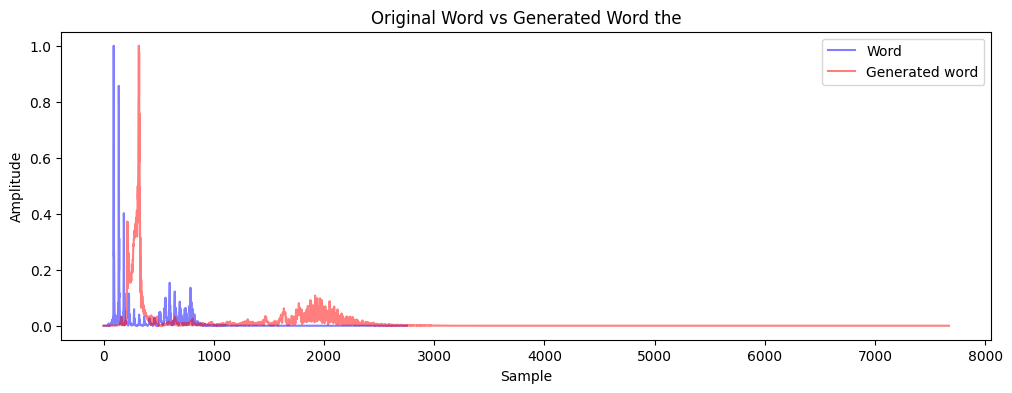

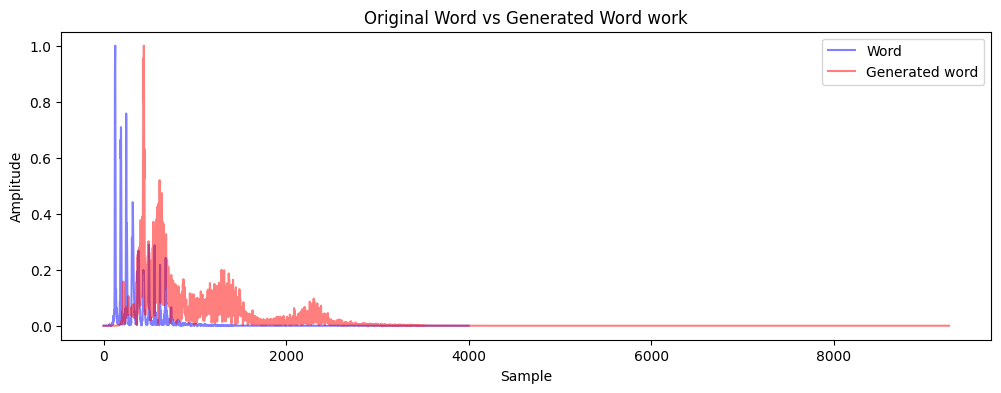

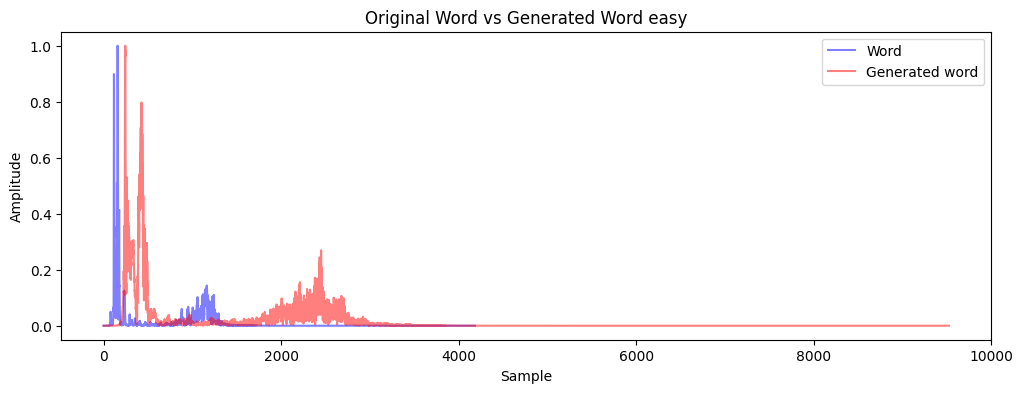

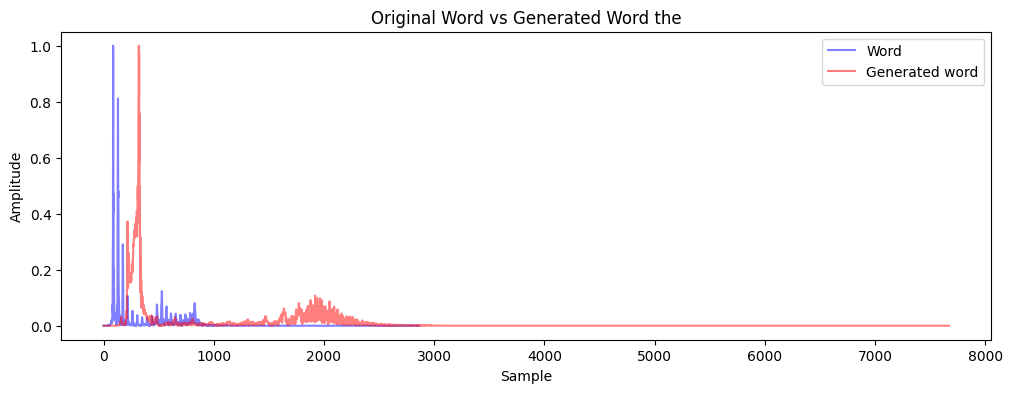

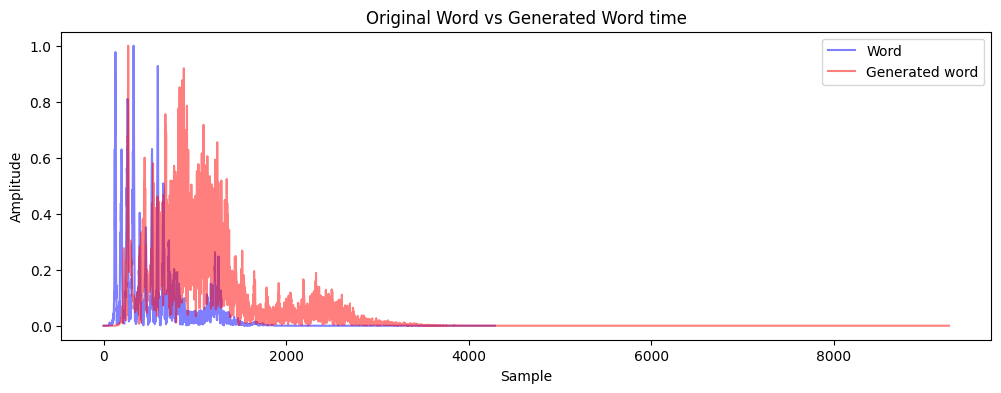

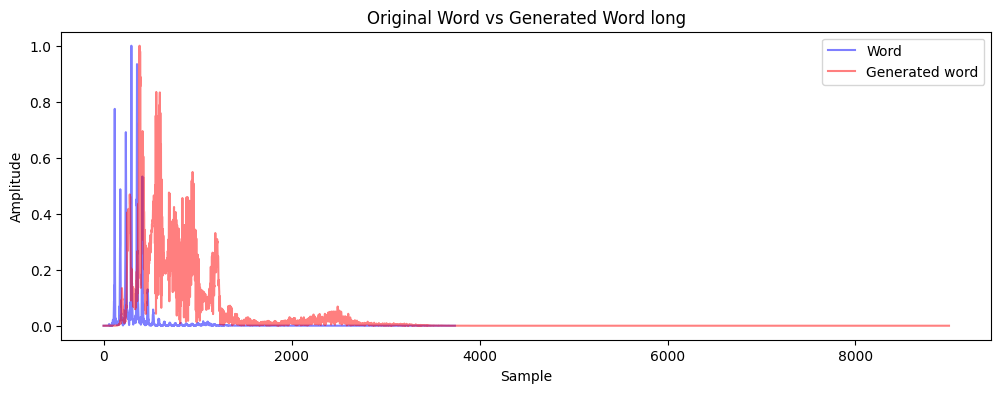

Word 6 should be two, but was not found


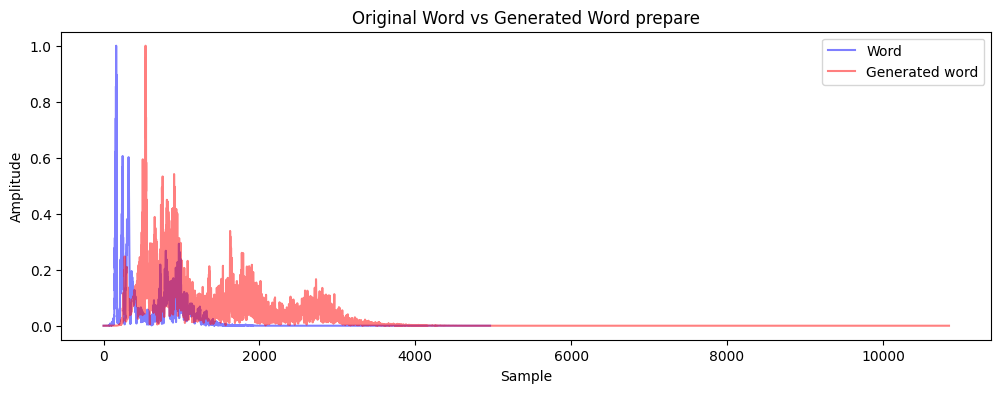

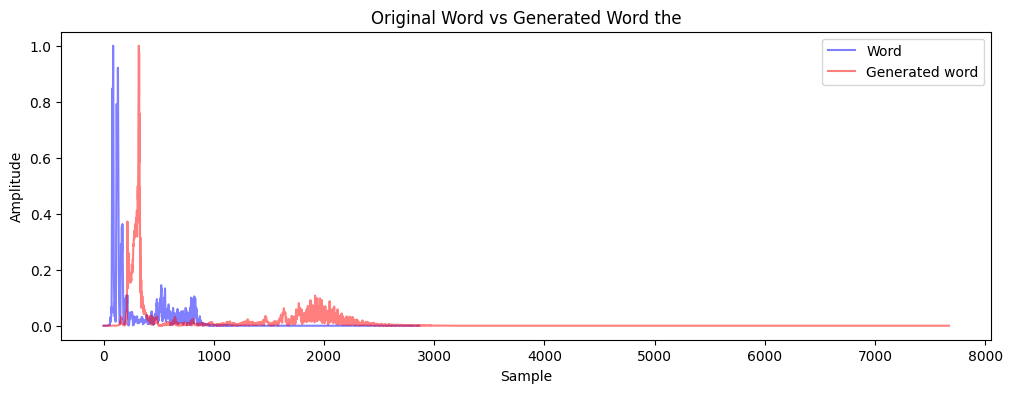

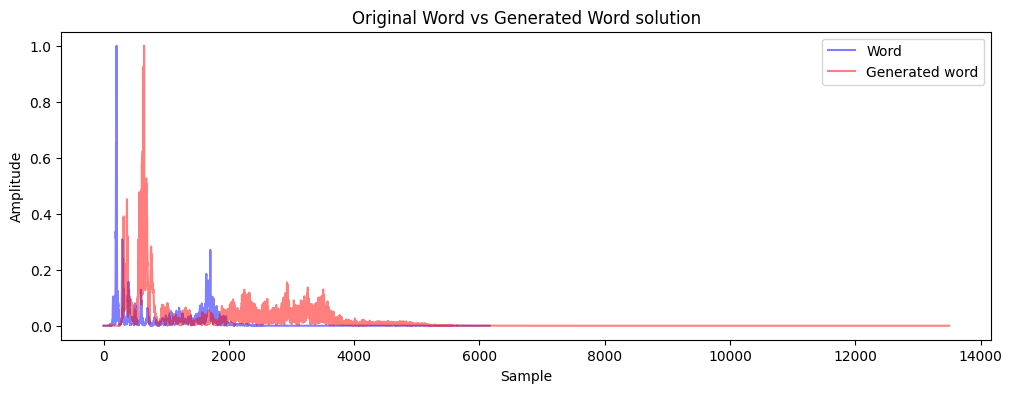

In [28]:
for i, ft in enumerate(filtered_word_signals_ft):
    if solution[i] not in filtered_audio_signals_ft.keys():
        print(f"Word {i} should be {solution[i]}, but was not found")
        continue
    # make the colors little transparent so that the plot is more readable
    plt.figure(figsize=(12, 4))
    plt.plot(ft[:len(ft)//2], color="blue", alpha=0.5, label="Word")
    plt.plot(filtered_audio_signals_ft[solution[i]][:len(filtered_audio_signals_ft[solution[i]])//2], color="red", alpha=0.5, label="Generated word")
    plt.title("Original Word vs Generated Word " + solution[i])
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


In [29]:
# keep only every other sample
filtered_audio_signals_ft = {word: filtered_audio_signals_ft[word][::2] for word in filtered_audio_signals_ft.keys()}

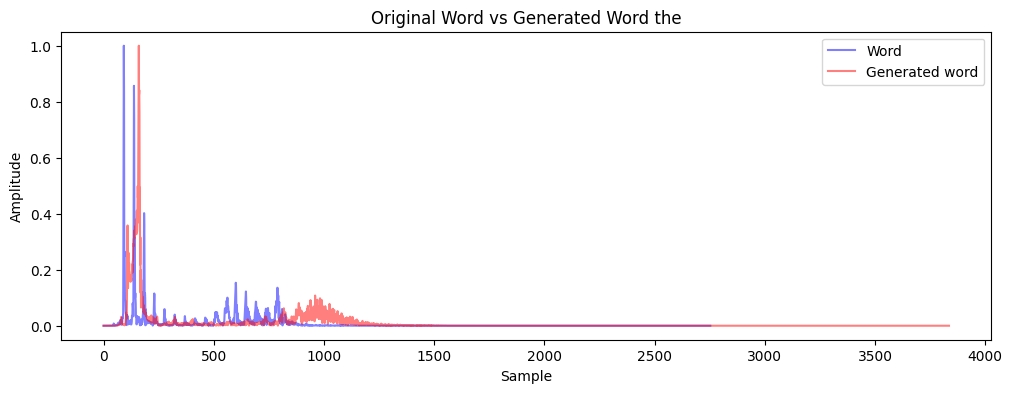

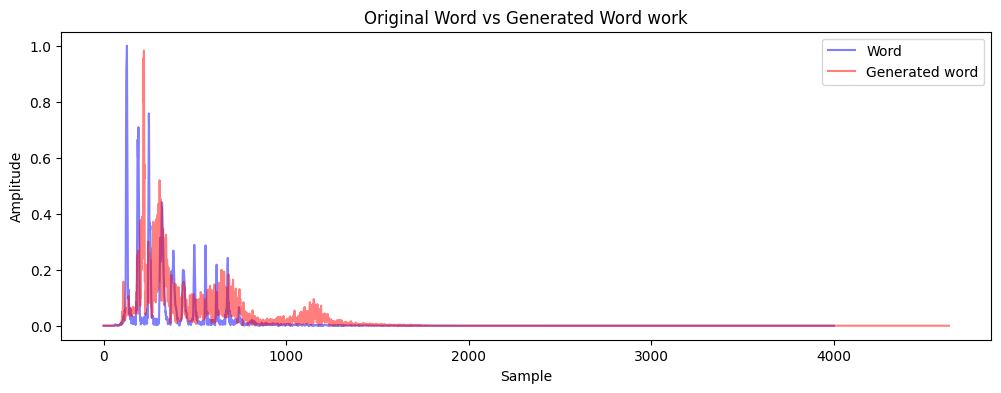

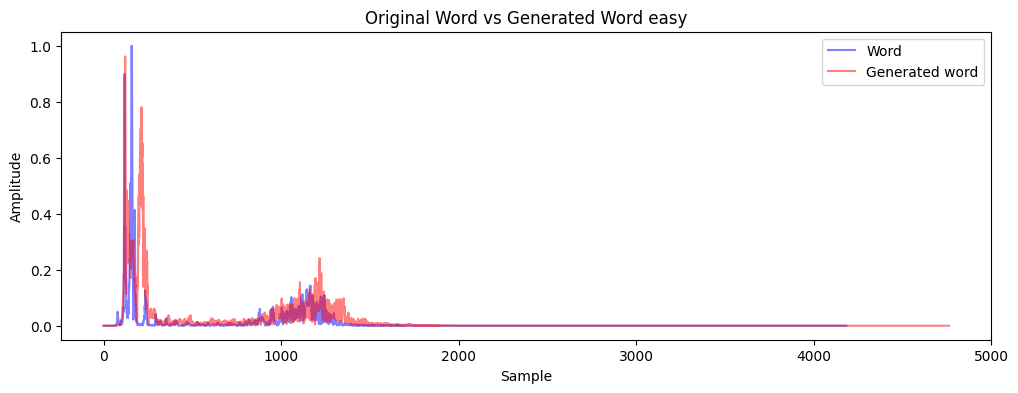

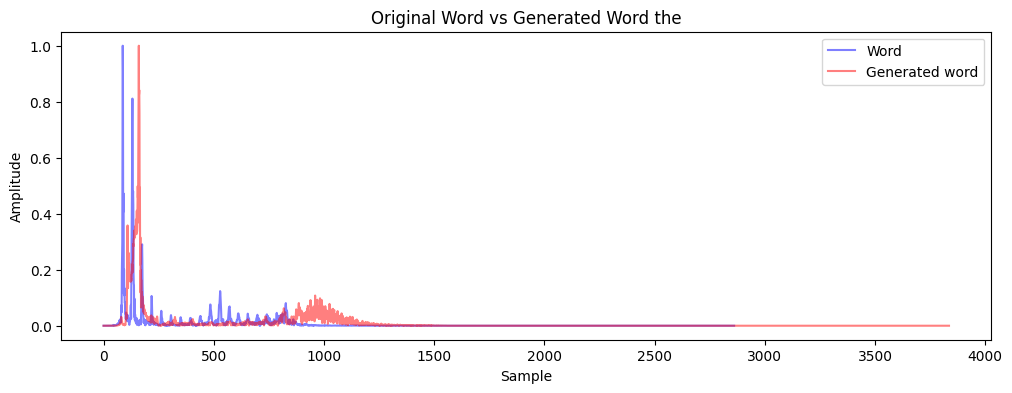

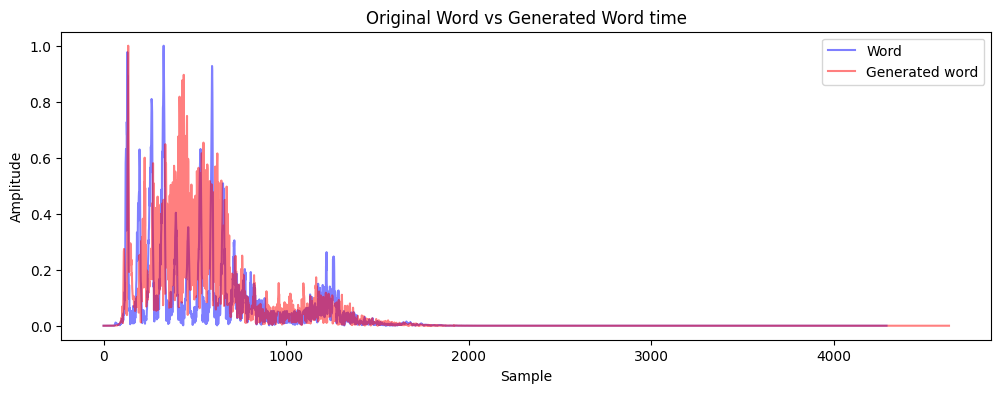

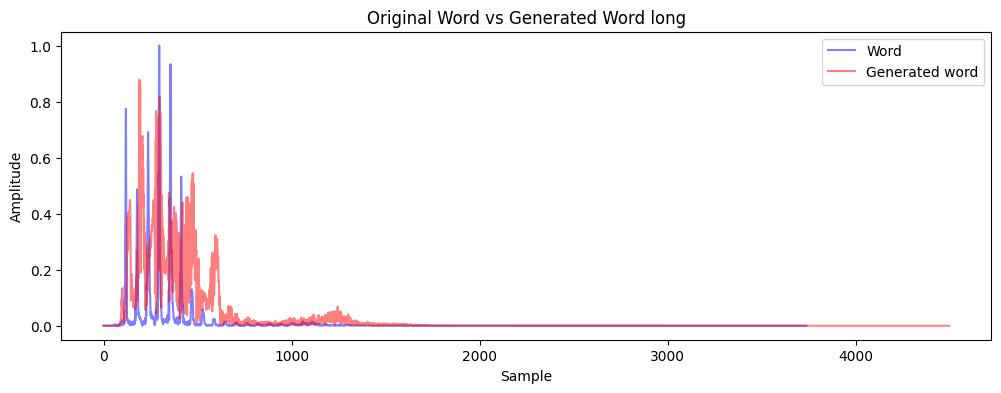

Word 6 should be two, but was not found


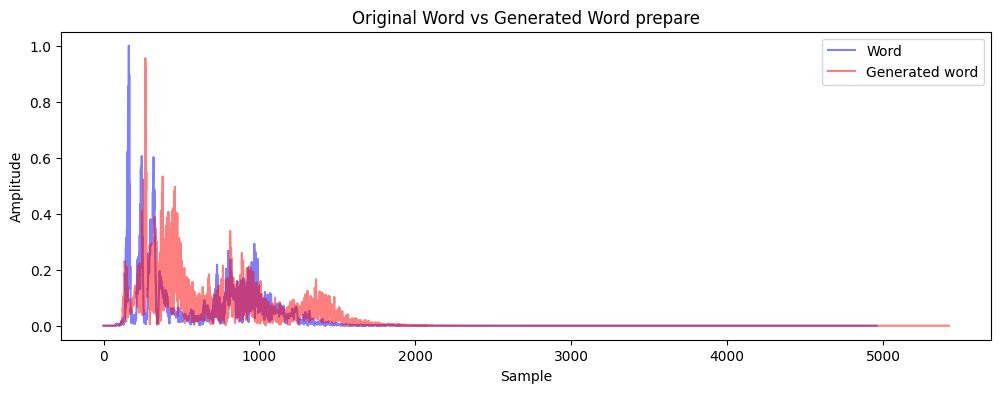

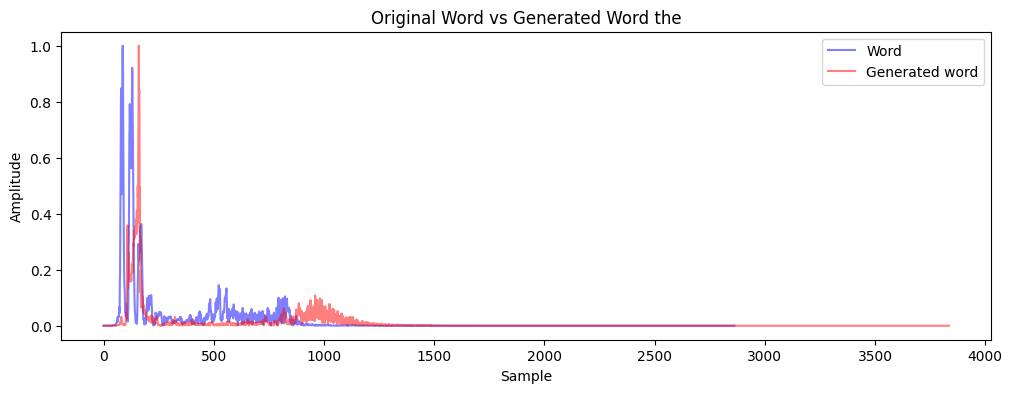

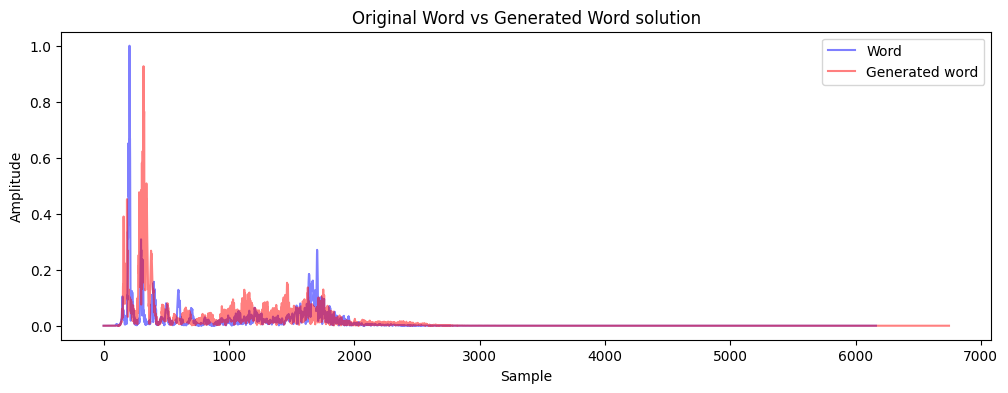

In [30]:
for i, ft in enumerate(filtered_word_signals_ft):
    if solution[i] not in filtered_audio_signals_ft.keys():
        print(f"Word {i} should be {solution[i]}, but was not found")
        continue
    # make the colors little transparent so that the plot is more readable
    plt.figure(figsize=(12, 4))
    plt.plot(ft[:len(ft)//2], color="blue", alpha=0.5, label="Word")
    plt.plot(filtered_audio_signals_ft[solution[i]][:len(filtered_audio_signals_ft[solution[i]])//2], color="red", alpha=0.5, label="Generated word")
    plt.title("Original Word vs Generated Word " + solution[i])
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

Word 0 | Generated word time | Distance 8.319716459347203
Word 0 | Generated word prepare | Distance 5.406645260304299
Word 0 | Generated word solution | Distance 4.632414278372789
Word 0 | Generated word make | Distance 6.704937546539669
Word 0 | Generated word mistake | Distance 5.94623508070873
Word 0 | Generated word no | Distance 6.114276881510748
Word 0 | Generated word the | Distance 3.4341483927573124
Word 0 | Generated word probable | Distance 5.602882707526748
Word 0 | Generated word long | Distance 6.625899884814924
Word 0 | Generated word lecture | Distance 6.550205272765429
Word 0 | Generated word method | Distance 7.000501069003987
Word 0 | Generated word disaster | Distance 5.06855545103912
Word 0 | Generated word fail | Distance 5.370444965051337
Word 0 | Generated word work | Distance 4.441817641286606
Word 0 | Generated word advice | Distance 7.176779737329083
Word 0 | Generated word idea | Distance 5.731820217020595
Word 0 | Generated word succeed | Distance 5.047177

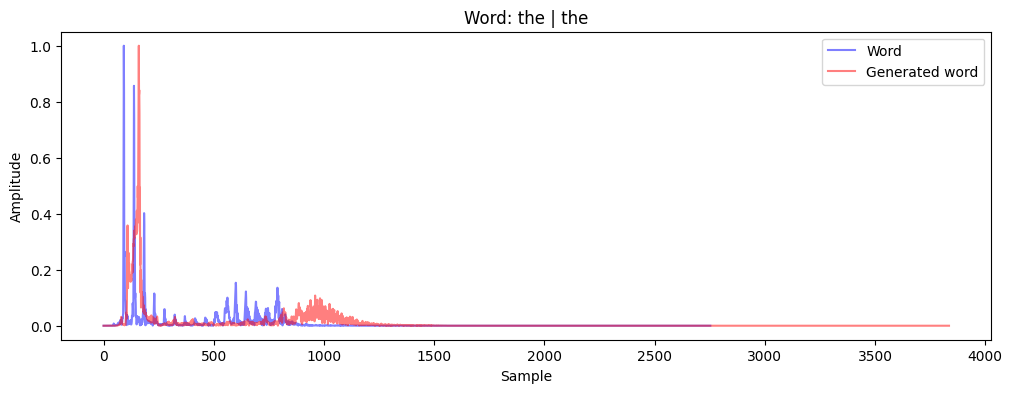

Word 1 | Generated word time | Distance 8.063471985425258
Word 1 | Generated word prepare | Distance 5.4326748474117466
Word 1 | Generated word solution | Distance 4.768233269227068
Word 1 | Generated word make | Distance 5.628355266633706
Word 1 | Generated word mistake | Distance 5.723333901030623
Word 1 | Generated word no | Distance 5.838915438509228
Word 1 | Generated word the | Distance 4.853152928222936
Word 1 | Generated word probable | Distance 5.512022471776127
Word 1 | Generated word long | Distance 5.984506381755281
Word 1 | Generated word lecture | Distance 6.028328799168964
Word 1 | Generated word method | Distance 7.290654189719157
Word 1 | Generated word disaster | Distance 5.757570332664317
Word 1 | Generated word fail | Distance 5.272984595696447
Word 1 | Generated word work | Distance 4.74551634158221
Word 1 | Generated word advice | Distance 7.173375556283714
Word 1 | Generated word idea | Distance 6.053709961254045
Word 1 | Generated word succeed | Distance 5.25742

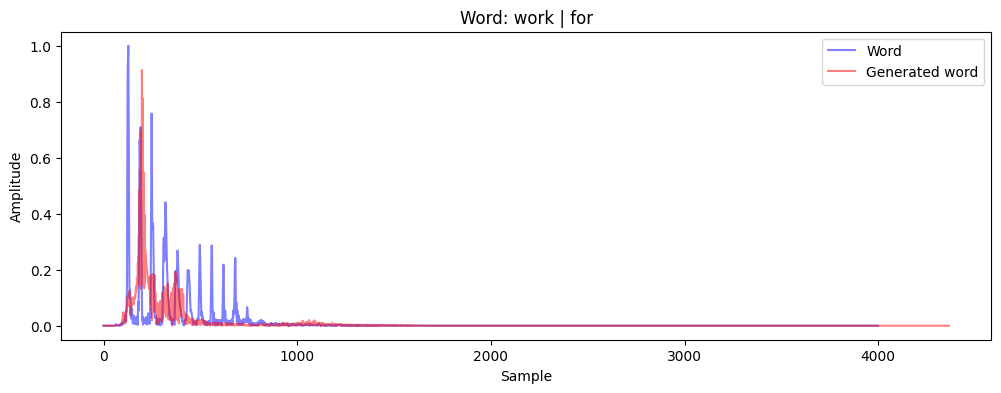

Word 2 | Generated word time | Distance 8.731727642766561
Word 2 | Generated word prepare | Distance 5.850240124152812
Word 2 | Generated word solution | Distance 4.821122601142136
Word 2 | Generated word make | Distance 6.668991155051387
Word 2 | Generated word mistake | Distance 6.1862250874532
Word 2 | Generated word no | Distance 6.263580972320803
Word 2 | Generated word the | Distance 2.243267544318323
Word 2 | Generated word probable | Distance 6.02001318008379
Word 2 | Generated word long | Distance 7.132813795701632
Word 2 | Generated word lecture | Distance 6.72005554749095
Word 2 | Generated word method | Distance 7.058017927736224
Word 2 | Generated word disaster | Distance 5.656124238472841
Word 2 | Generated word fail | Distance 5.562303794125299
Word 2 | Generated word work | Distance 5.078559382313626
Word 2 | Generated word advice | Distance 7.568579984994494
Word 2 | Generated word idea | Distance 5.995478257108988
Word 2 | Generated word succeed | Distance 5.310816170

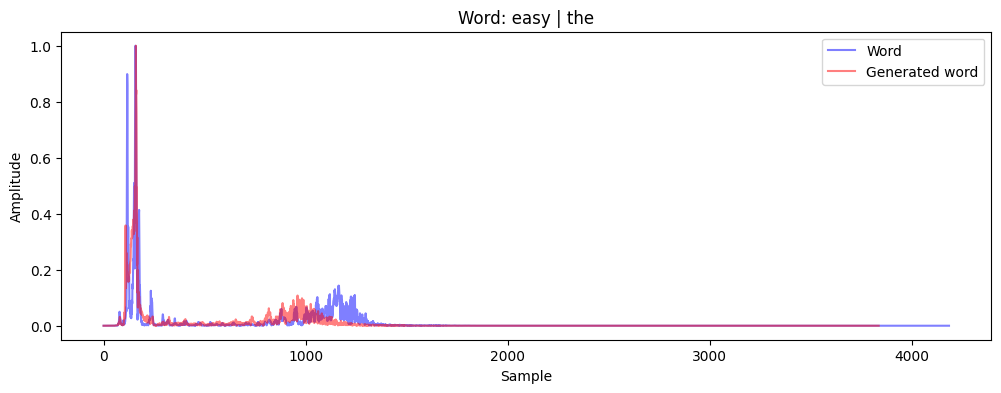

Word 3 | Generated word time | Distance 8.293094062301815
Word 3 | Generated word prepare | Distance 5.504869163102346
Word 3 | Generated word solution | Distance 4.812414178405489
Word 3 | Generated word make | Distance 6.6940902800624995
Word 3 | Generated word mistake | Distance 6.099429556619544
Word 3 | Generated word no | Distance 6.197024940256545
Word 3 | Generated word the | Distance 3.555922383543742
Word 3 | Generated word probable | Distance 5.864395039031788
Word 3 | Generated word long | Distance 6.69845308904995
Word 3 | Generated word lecture | Distance 6.520051123511681
Word 3 | Generated word method | Distance 7.103498078022729
Word 3 | Generated word disaster | Distance 5.198525487742619
Word 3 | Generated word fail | Distance 5.565470621327333
Word 3 | Generated word work | Distance 4.57093679391631
Word 3 | Generated word advice | Distance 7.343536762217216
Word 3 | Generated word idea | Distance 5.8834092911411595
Word 3 | Generated word succeed | Distance 5.19459

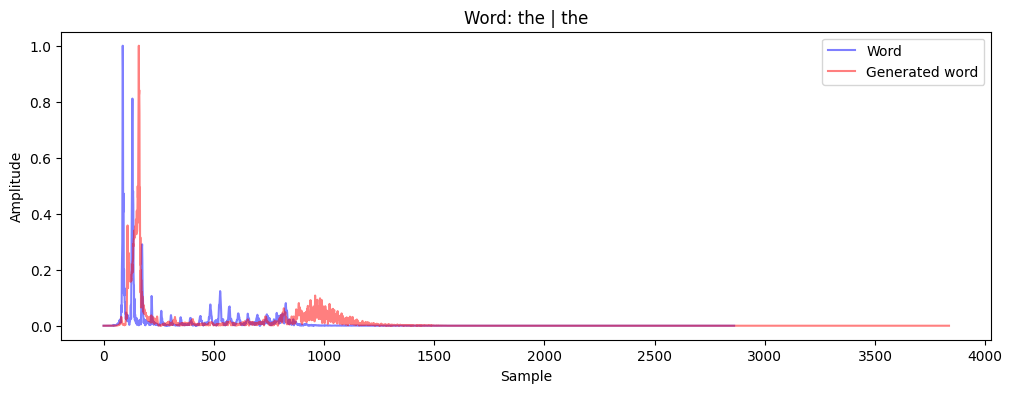

Word 4 | Generated word time | Distance 7.548021196754148
Word 4 | Generated word prepare | Distance 6.1506344477860475
Word 4 | Generated word solution | Distance 6.61117533474623
Word 4 | Generated word make | Distance 6.610698473366257
Word 4 | Generated word mistake | Distance 6.548495222309152
Word 4 | Generated word no | Distance 6.359705378932861
Word 4 | Generated word the | Distance 7.322773183450364
Word 4 | Generated word probable | Distance 6.757359184076388
Word 4 | Generated word long | Distance 6.535831826007853
Word 4 | Generated word lecture | Distance 6.095987069222053
Word 4 | Generated word method | Distance 7.954521120451881
Word 4 | Generated word disaster | Distance 6.758408333894608
Word 4 | Generated word fail | Distance 6.636346167820194
Word 4 | Generated word work | Distance 6.311125660130555
Word 4 | Generated word advice | Distance 6.702435231074757
Word 4 | Generated word idea | Distance 6.838214156499352
Word 4 | Generated word succeed | Distance 7.12832

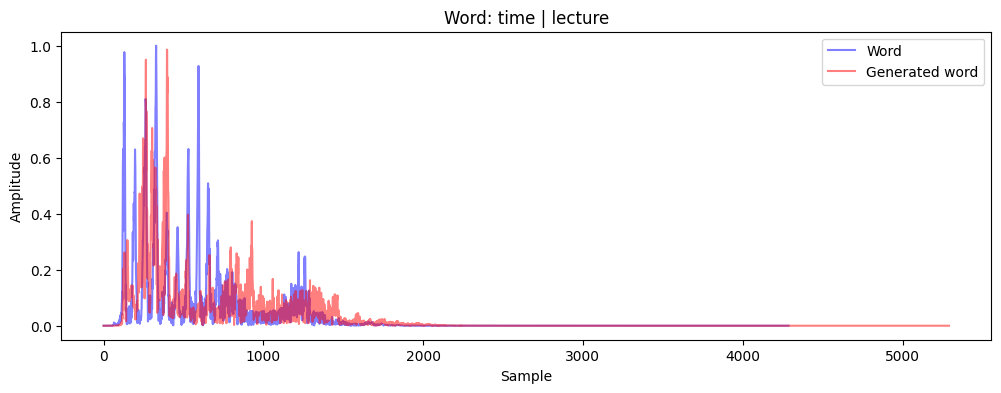

Word 5 | Generated word time | Distance 8.357775457844362
Word 5 | Generated word prepare | Distance 5.71357605155783
Word 5 | Generated word solution | Distance 4.92209749352795
Word 5 | Generated word make | Distance 6.65383882637926
Word 5 | Generated word mistake | Distance 5.661678208698206
Word 5 | Generated word no | Distance 5.799093429553629
Word 5 | Generated word the | Distance 4.86117941534077
Word 5 | Generated word probable | Distance 5.385283934849805
Word 5 | Generated word long | Distance 6.338210897231392
Word 5 | Generated word lecture | Distance 6.467332812533684
Word 5 | Generated word method | Distance 6.257909773988772
Word 5 | Generated word disaster | Distance 4.833548367034874
Word 5 | Generated word fail | Distance 4.970863321274345
Word 5 | Generated word work | Distance 4.799913311595058
Word 5 | Generated word advice | Distance 7.046948850066614
Word 5 | Generated word idea | Distance 5.541436077846166
Word 5 | Generated word succeed | Distance 4.930588027

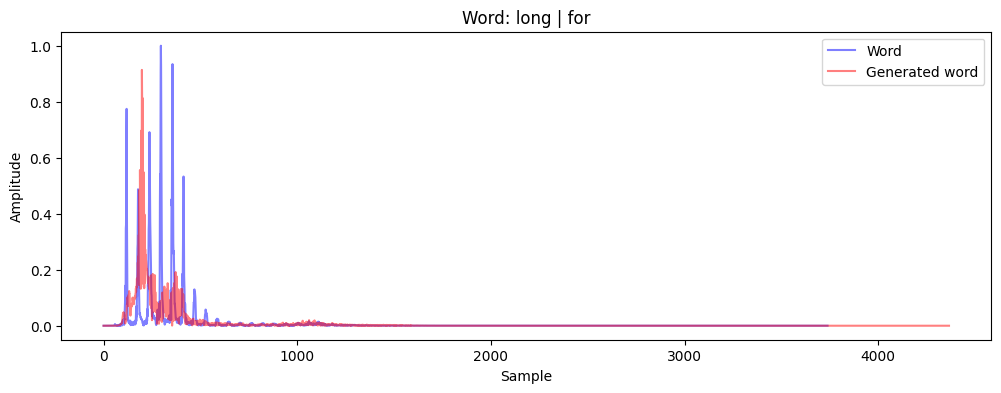

Word 6 | Generated word time | Distance 8.352325440087146
Word 6 | Generated word prepare | Distance 5.463772537428639
Word 6 | Generated word solution | Distance 4.826965295779069
Word 6 | Generated word make | Distance 6.7008516130962406
Word 6 | Generated word mistake | Distance 6.050617099766857
Word 6 | Generated word no | Distance 6.137760362953385
Word 6 | Generated word the | Distance 3.7722257059491846
Word 6 | Generated word probable | Distance 5.845926079070491
Word 6 | Generated word long | Distance 6.711832193321239
Word 6 | Generated word lecture | Distance 6.532759379652562
Word 6 | Generated word method | Distance 7.07907197366045
Word 6 | Generated word disaster | Distance 5.16188528353094
Word 6 | Generated word fail | Distance 5.522972091996721
Word 6 | Generated word work | Distance 4.64031981308385
Word 6 | Generated word advice | Distance 7.305270023013707
Word 6 | Generated word idea | Distance 5.880542326054859
Word 6 | Generated word succeed | Distance 5.236583

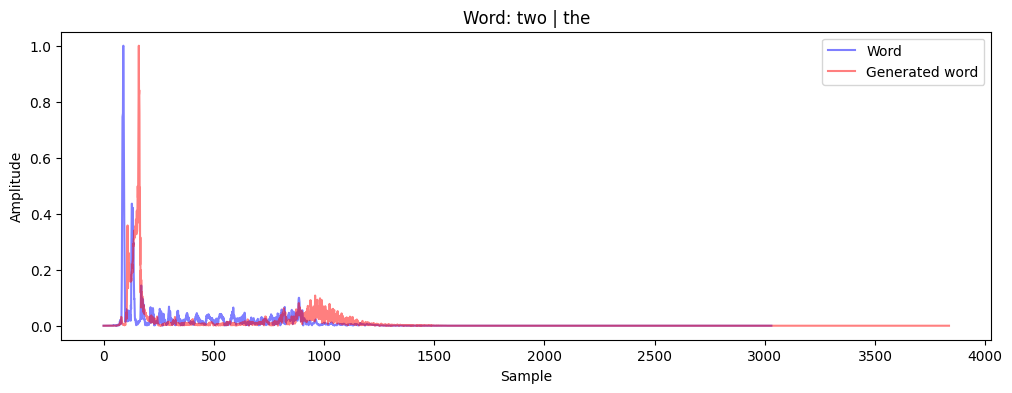

Word 7 | Generated word time | Distance 7.798932388318726
Word 7 | Generated word prepare | Distance 4.931875775774441
Word 7 | Generated word solution | Distance 4.154560216233511
Word 7 | Generated word make | Distance 5.559106997709919
Word 7 | Generated word mistake | Distance 5.030141250558897
Word 7 | Generated word no | Distance 5.433216157957712
Word 7 | Generated word the | Distance 4.153562896155452
Word 7 | Generated word probable | Distance 4.703910981319869
Word 7 | Generated word long | Distance 6.264021835818197
Word 7 | Generated word lecture | Distance 5.046539730072021
Word 7 | Generated word method | Distance 5.889059612573043
Word 7 | Generated word disaster | Distance 5.1089322310932985
Word 7 | Generated word fail | Distance 4.249691109344317
Word 7 | Generated word work | Distance 4.397828176853125
Word 7 | Generated word advice | Distance 6.223176267765743
Word 7 | Generated word idea | Distance 5.165977511661877
Word 7 | Generated word succeed | Distance 4.6735

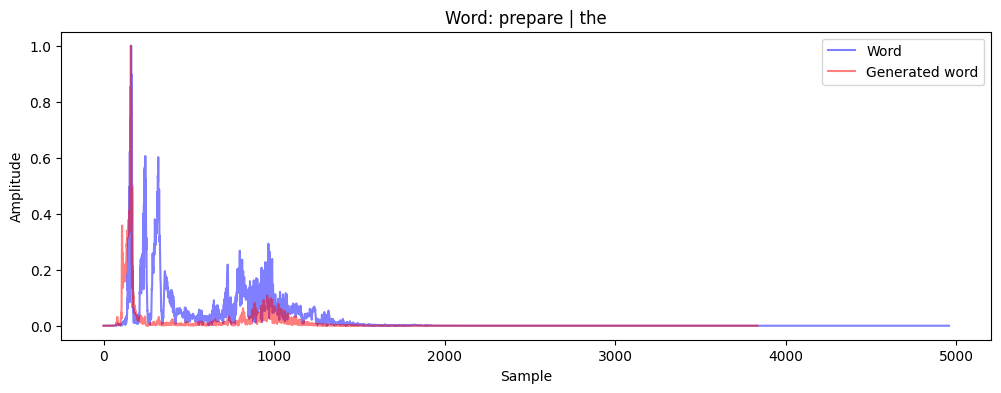

Word 8 | Generated word time | Distance 8.515590668526766
Word 8 | Generated word prepare | Distance 6.299683843729083
Word 8 | Generated word solution | Distance 5.852471182796395
Word 8 | Generated word make | Distance 6.877312892997492
Word 8 | Generated word mistake | Distance 6.838852108206734
Word 8 | Generated word no | Distance 6.489643196580528
Word 8 | Generated word the | Distance 4.348659094493549
Word 8 | Generated word probable | Distance 6.612249999617248
Word 8 | Generated word long | Distance 7.107192850401455
Word 8 | Generated word lecture | Distance 7.122846199653265
Word 8 | Generated word method | Distance 7.362046660079099
Word 8 | Generated word disaster | Distance 6.134251429554844
Word 8 | Generated word fail | Distance 6.288492742197633
Word 8 | Generated word work | Distance 5.5965920792256085
Word 8 | Generated word advice | Distance 7.79407399267562
Word 8 | Generated word idea | Distance 6.602714743807905
Word 8 | Generated word succeed | Distance 6.21452

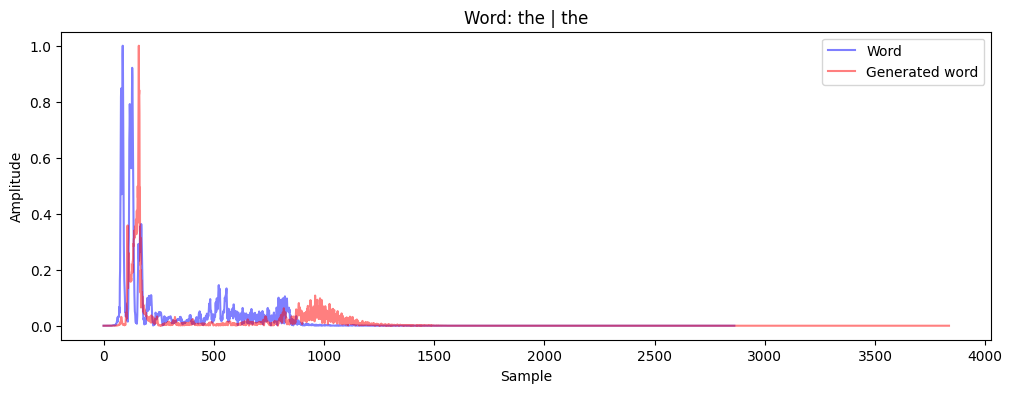

Word 9 | Generated word time | Distance 8.174005872932902
Word 9 | Generated word prepare | Distance 5.317555251179113
Word 9 | Generated word solution | Distance 4.324376595743754
Word 9 | Generated word make | Distance 5.6257902301741005
Word 9 | Generated word mistake | Distance 5.714737643628134
Word 9 | Generated word no | Distance 6.198842042749995
Word 9 | Generated word the | Distance 4.365432924701237
Word 9 | Generated word probable | Distance 5.3668708600752435
Word 9 | Generated word long | Distance 5.778755593457774
Word 9 | Generated word lecture | Distance 6.213708233335013
Word 9 | Generated word method | Distance 6.168202672882104
Word 9 | Generated word disaster | Distance 5.09489786866195
Word 9 | Generated word fail | Distance 5.003379634344302
Word 9 | Generated word work | Distance 4.065755081359289
Word 9 | Generated word advice | Distance 7.10438889527704
Word 9 | Generated word idea | Distance 4.791456917940822
Word 9 | Generated word succeed | Distance 4.28638

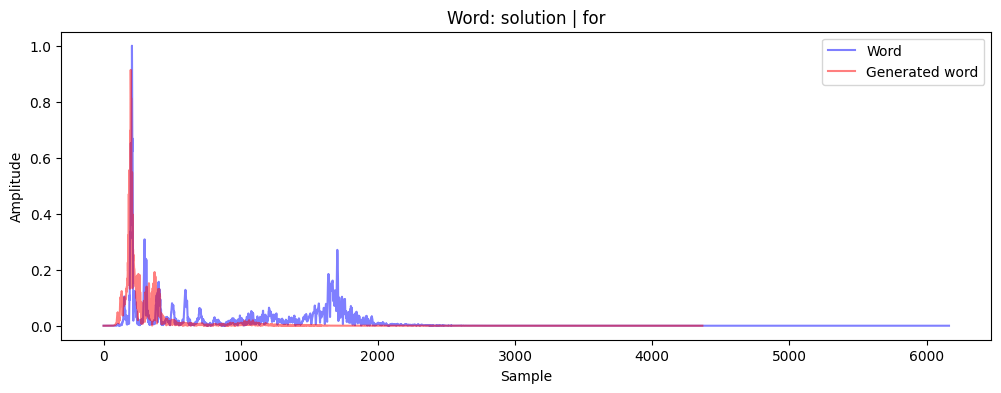

['the', 'for', 'the', 'the', 'lecture', 'for', 'the', 'the', 'the', 'for']


In [31]:
best_matches = []
for i, word in enumerate(filtered_word_signals_ft):
    best_match = None
    best_match_min = None

    # Consider only the first half of the Fourier transform
    word = word[:len(word)//2]

    for generated_word in words:
        comparing_signal = filtered_audio_signals_ft[generated_word][:len(filtered_audio_signals_ft[generated_word])//2]
        
        # Ensure both signals are of the same length
        min_length = min(len(word), len(comparing_signal))
        word_resized = word[:min_length]
        comparing_signal_resized = comparing_signal[:min_length]

        # Calculate the Euclidean distance
        distance = np.linalg.norm(word_resized - comparing_signal_resized)

        print(f"Word {i} | Generated word {generated_word} | Distance {distance}")

        # Check for the best match
        if best_match_min is None or distance < best_match_min:
            best_match = generated_word
            best_match_min = distance

    best_matches.append(best_match)

    # Plotting the results
    plt.figure(figsize=(12, 4))
    plt.title("Word: " + solution[i] + " | " + best_match)
    plt.plot(word, color="blue", label="Word", alpha=0.5)
    plt.plot(filtered_audio_signals_ft[best_match][:len(filtered_audio_signals_ft[best_match])//2], color="red", label="Generated word", alpha=0.5)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

print(best_matches)

In [32]:
compare_result_to_solution(best_matches, solution)

Word 1 should be work, but was for
Word 2 should be easy, but was the
Word 4 should be time, but was lecture
Word 5 should be long, but was for
Word 6 should be two, but was the
Word 7 should be prepare, but was the
Word 9 should be solution, but was for
Correct: 3/10


In [33]:
def compute_cepstrum(signal, every_other_sample=False):
    spectrum = np.fft.fft(signal)
    if every_other_sample:
        spectrum = spectrum[::2]
    log_spectrum = np.log(np.abs(spectrum), where=(np.abs(spectrum) > 0))
    cepstrum = np.fft.ifft(log_spectrum)
    return cepstrum

detected_words_ceps = [compute_cepstrum(word) for word in filtered_word_signals]
generated_words_ceps = {word: compute_cepstrum(filtered_audio_signals[word], True) for word in filtered_audio_signals}

# normalize and abs
detected_words_ceps = [np.abs(word / np.max(np.abs(word))) for word in detected_words_ceps]
generated_words_ceps = {word: np.abs(generated_words_ceps[word] / np.max(np.abs(generated_words_ceps[word]))) for word in generated_words_ceps}

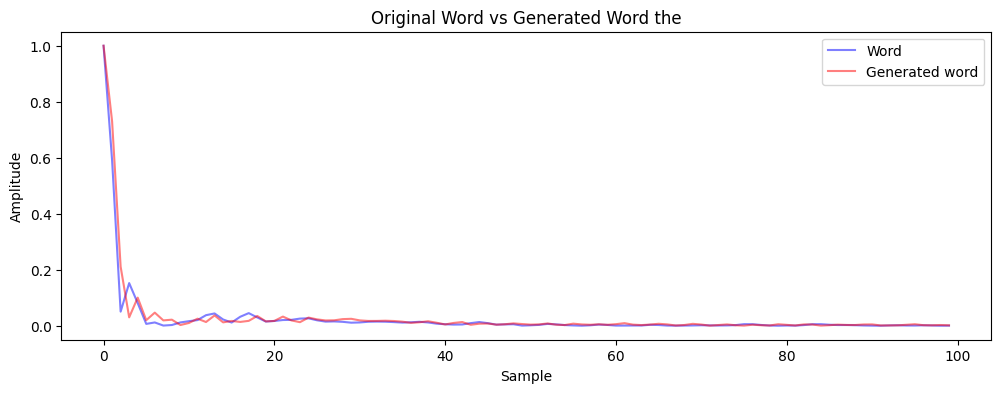

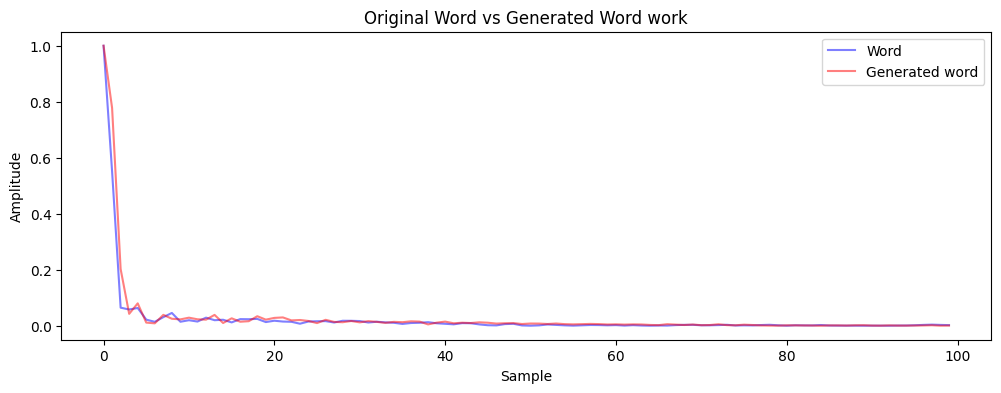

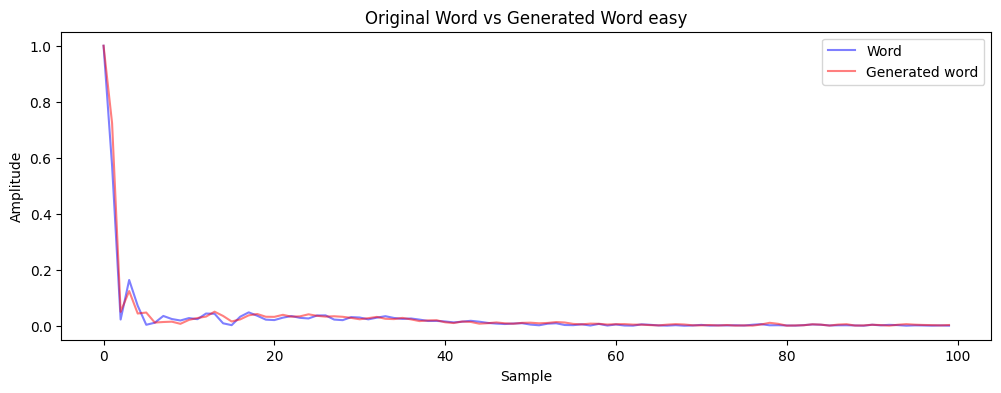

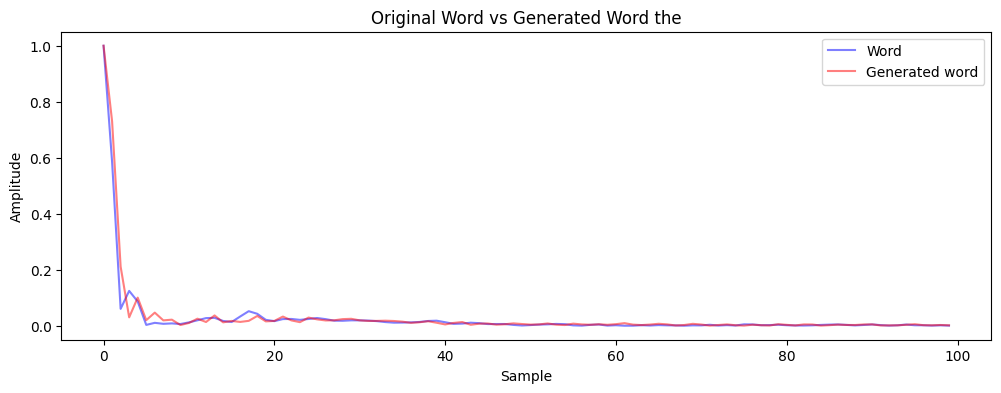

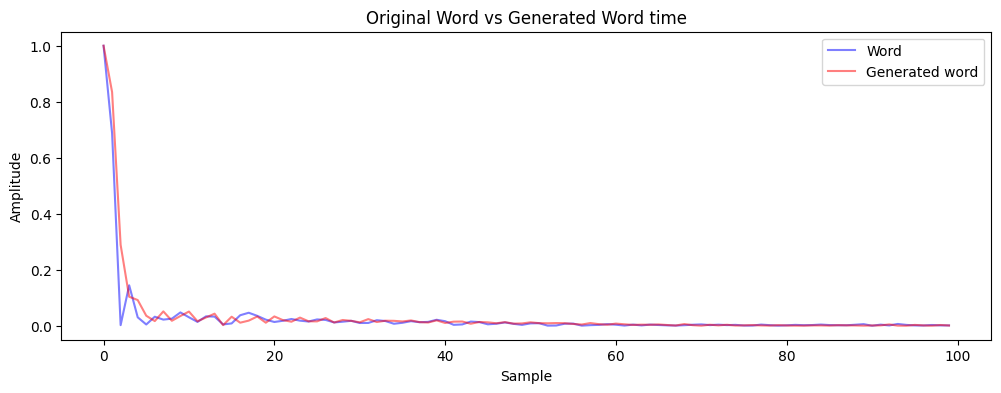

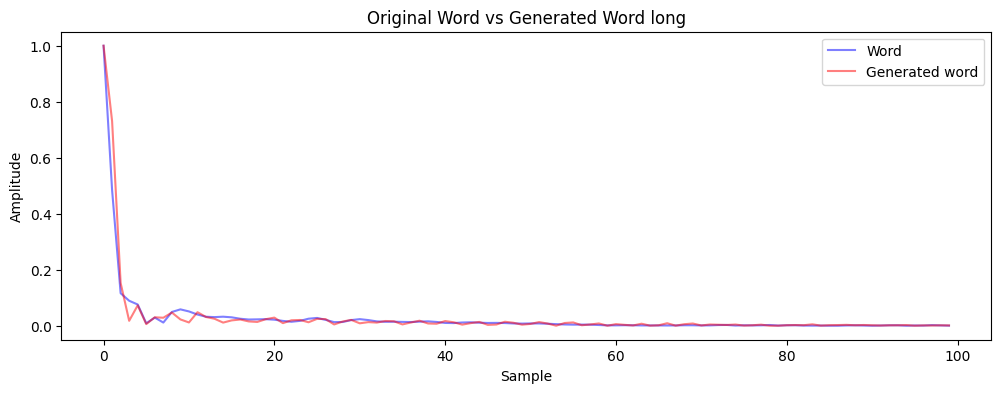

Word 6 should be two, but was not found


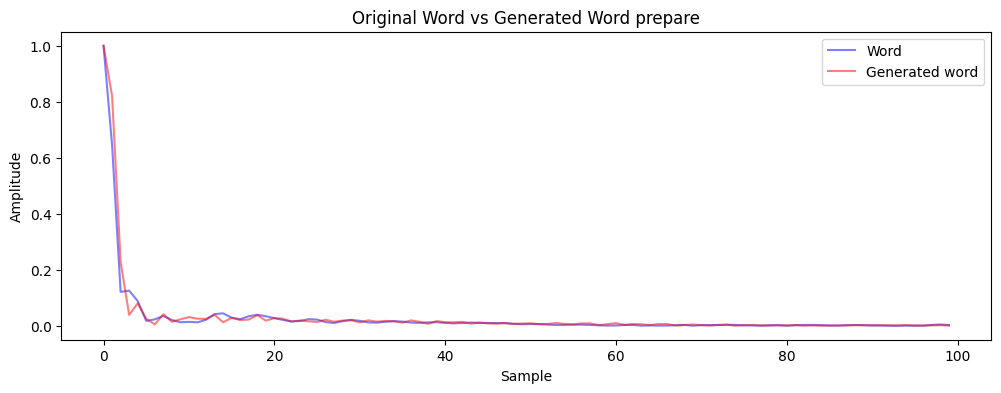

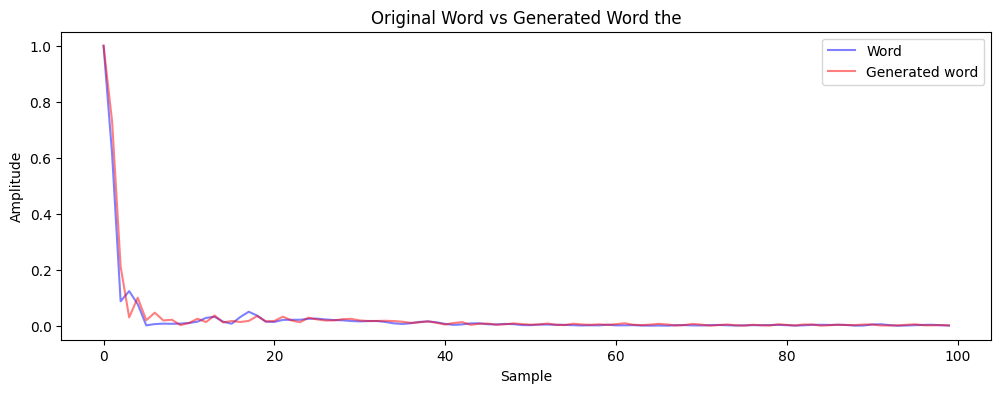

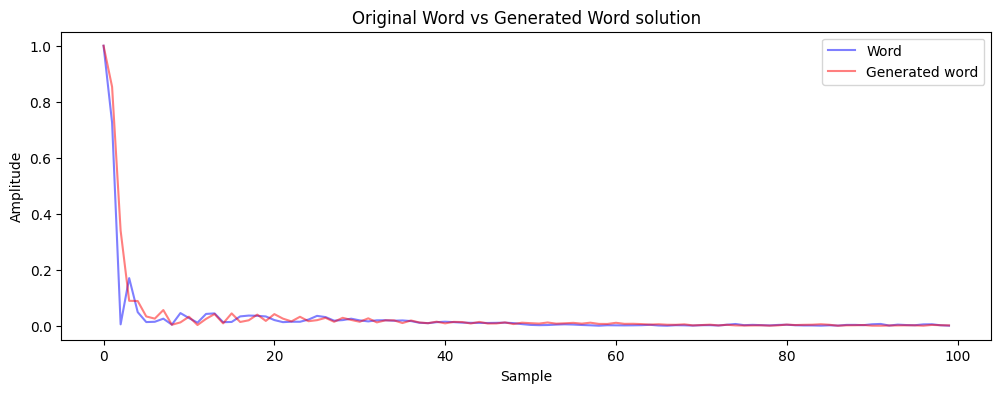

In [34]:
for i, cp in enumerate(detected_words_ceps):
    if solution[i] not in generated_words_ceps.keys():
        print(f"Word {i} should be {solution[i]}, but was not found")
        continue
    # make the colors little transparent so that the plot is more readable
    plt.figure(figsize=(12, 4))
    plt.plot(cp[:100], color="blue", alpha=0.5, label="Word")
    plt.plot(generated_words_ceps[solution[i]][:100], color="red", alpha=0.5, label="Generated word")
    plt.title("Original Word vs Generated Word " + solution[i])
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

In [35]:
best_matches = []
for detected_word_cep in detected_words_ceps:
    best_match = None
    best_match_min_distance = None

    for generated_word, generated_word_cep in generated_words_ceps.items():
        # Ensure both cepstra are of the same length for comparison
        min_length = min(len(detected_word_cep), len(generated_word_cep))
        detected_word_cep_resized = detected_word_cep[:min_length]
        generated_word_cep_resized = generated_word_cep[:min_length]

        # Calculate Euclidean distance
        distance = np.linalg.norm(detected_word_cep_resized - generated_word_cep_resized)

        if best_match_min_distance is None or distance < best_match_min_distance:
            best_match = generated_word
            best_match_min_distance = distance

    best_matches.append(best_match)

# Output the best matches
print(best_matches)


['easy', 'easy', 'easy', 'easy', 'easy', 'long', 'easy', 'probable', 'easy', 'easy']


## Využití MFCC: Signál 1

In [36]:
sr = 22050
lowcut = 300.0
highcut = 3400.0

def load_signal(signal_file_name):
  with open(signal_file_name, 'r') as file:
    return np.loadtxt(file)


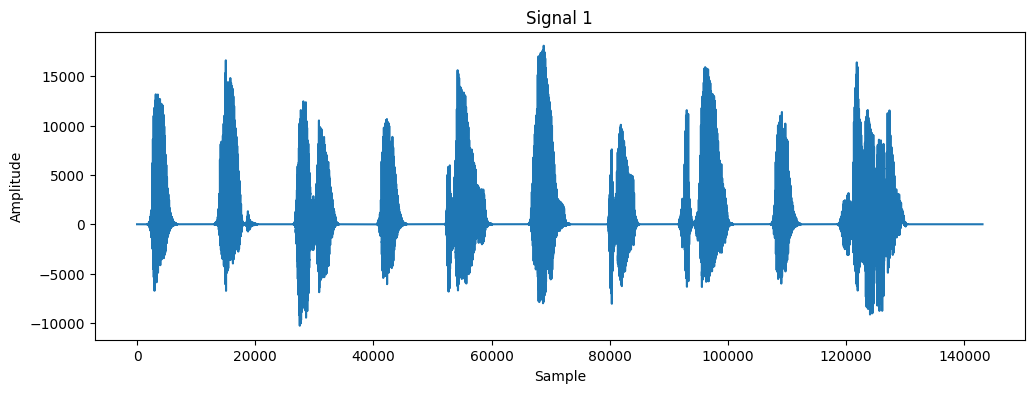

In [37]:
signal1 = load_signal('Signal1.txt')

plt.figure(figsize=(12, 4))
plt.plot(signal1)
plt.title('Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

audio_clip = Audio(signal1, rate=sr)
audio_clip

In [38]:
solution1 = ["the", "work", "easy", "the", "time", "long", "two", "prepare", "the", "solution"]

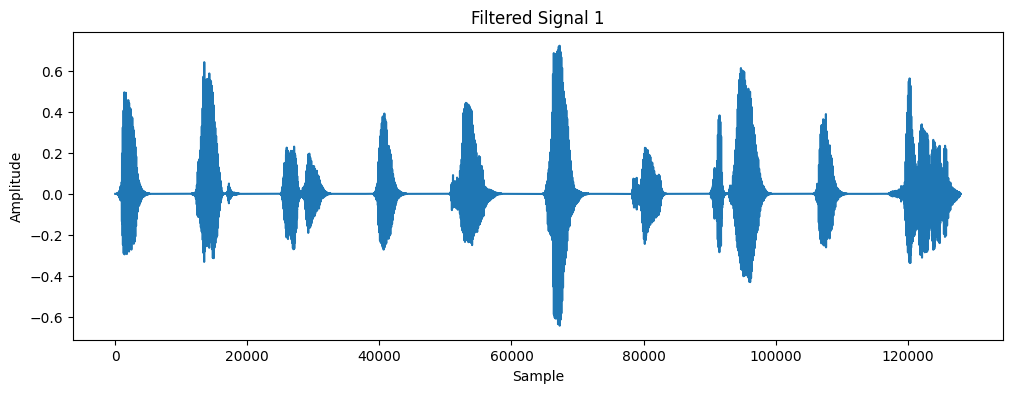

In [39]:
def preprocess_signal(signal, lowcut, highcut, sr):
  signal = signal / np.max(np.abs(signal))

  signal = bandpass_filter(signal, lowcut, highcut, sr)

  nyquist = 0.5 * sr
  low = lowcut / nyquist
  high = highcut / nyquist
  b, a = butter(N=5, Wn=[low, high], btype='band')
  signal = filtfilt(b, a, signal)


  signal = librosa.effects.trim(signal, top_db=30)[0]

  return signal

signal1 = preprocess_signal(signal1, lowcut, highcut, sr)

plt.figure(figsize=(12, 4))
plt.plot(signal1)
plt.title('Filtered Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

audio_clip = Audio(signal1, rate=sr)
audio_clip

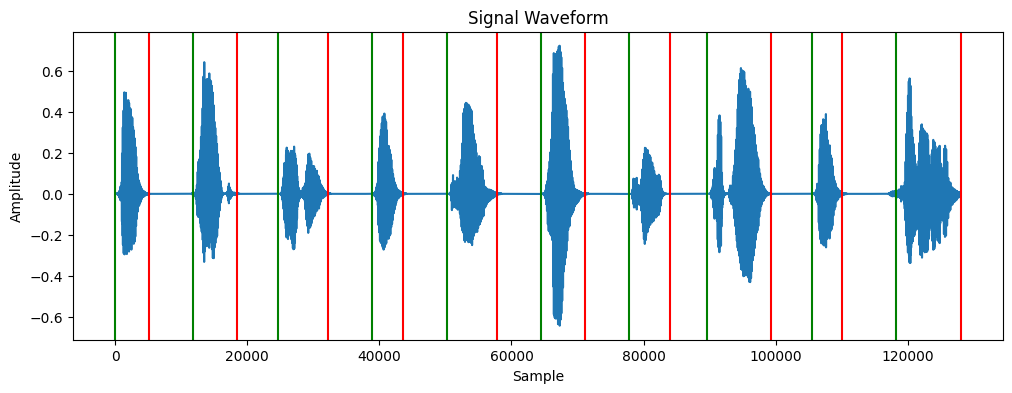

In [64]:
def segment_signal(signal, top_db=30, indexes=False, plot=True):
  non_silent_parts = librosa.effects.split(signal, top_db=top_db)
  speech_segments = [signal[start:end] for start, end in non_silent_parts]

  if plot:
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title('Signal Waveform')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    for start, end in non_silent_parts:
      plt.axvline(x=start, color="green")
      plt.axvline(x=end, color="red")
    plt.show()
    
  return speech_segments if not indexes else non_silent_parts

signal1_segments = [preprocess_signal(segment, lowcut, highcut, sr) for segment in segment_signal(signal1)]


In [41]:
engine = pyttsx3.init()

voices = engine.getProperty('voices')
for voice in voices:
    if "en_US" in voice.languages:# and voice.gender == "VoiceGenderNeuter":
        print(f"ID: {voice.id} | Language: {voice.languages} | Gender: {voice.gender} | Name: {voice.name}")

ID: com.apple.speech.synthesis.voice.Albert | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Albert
ID: com.apple.speech.synthesis.voice.BadNews | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bad News
ID: com.apple.speech.synthesis.voice.Bahh | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bahh
ID: com.apple.speech.synthesis.voice.Bells | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bells
ID: com.apple.speech.synthesis.voice.Boing | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Boing
ID: com.apple.speech.synthesis.voice.Bubbles | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Bubbles
ID: com.apple.speech.synthesis.voice.Cellos | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Cellos
ID: com.apple.speech.synthesis.voice.Deranged | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Wobble
ID: com.apple.eloquence.en-US.Eddy | Language: ['en_US'] | Gender: VoiceGenderNeuter | Name: Eddy (English (US))
ID: com.apple.el

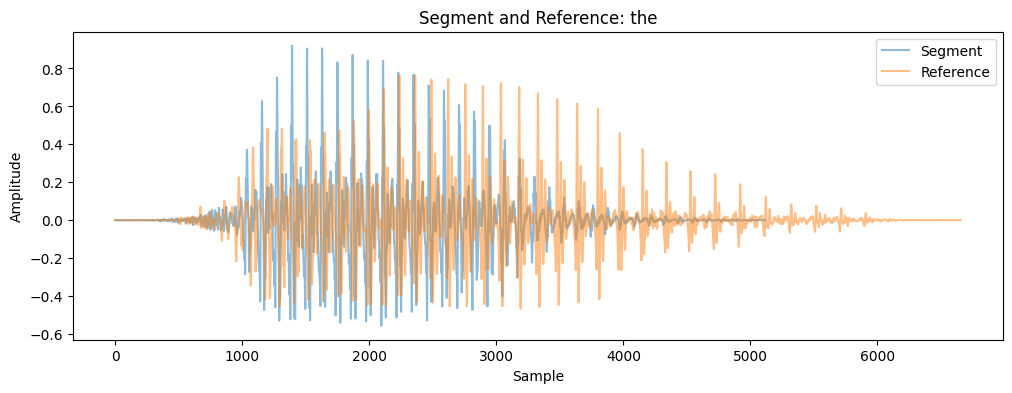

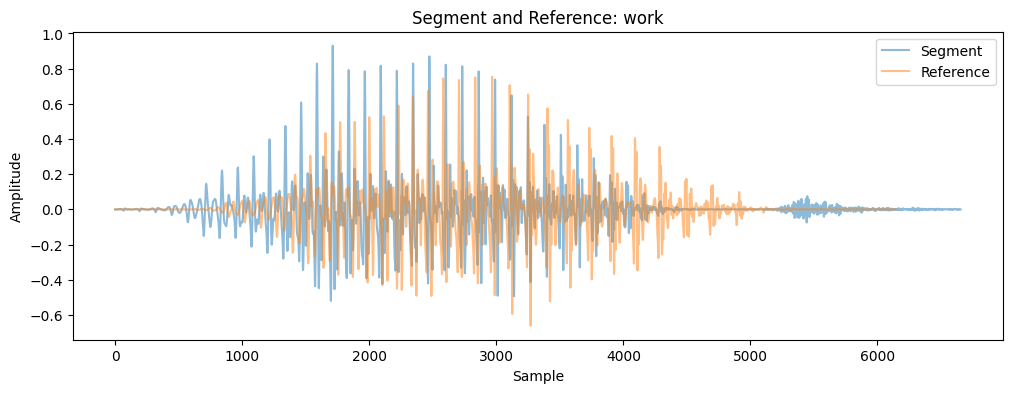

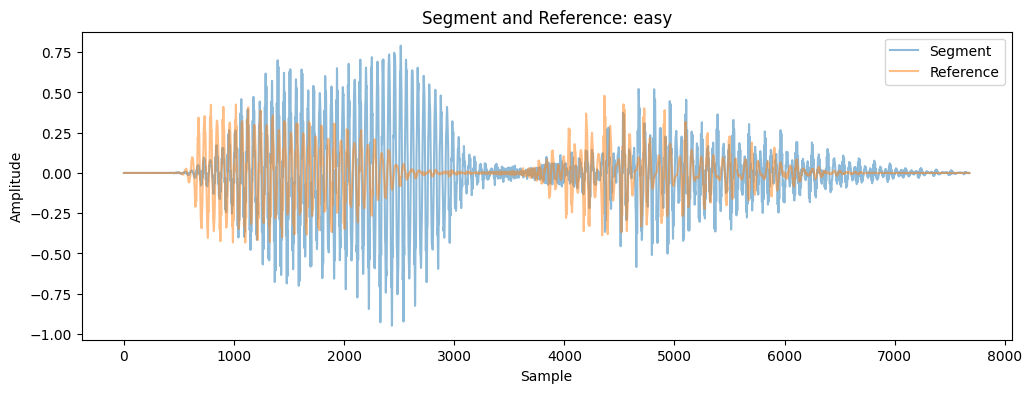

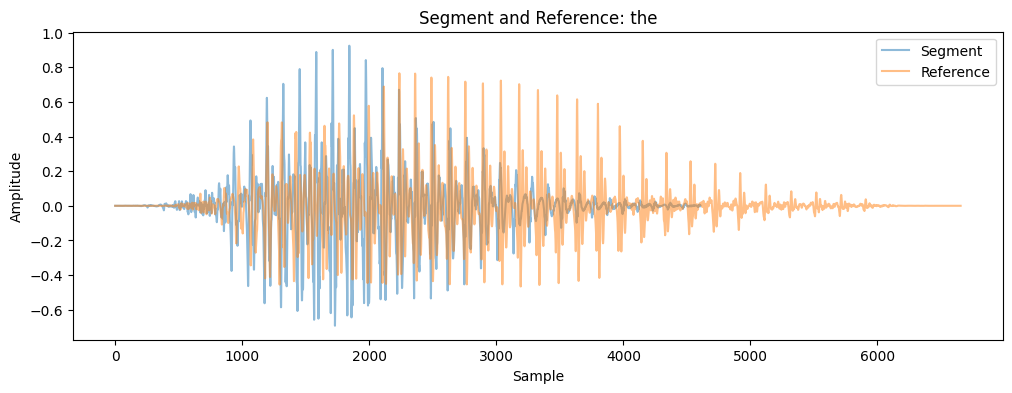

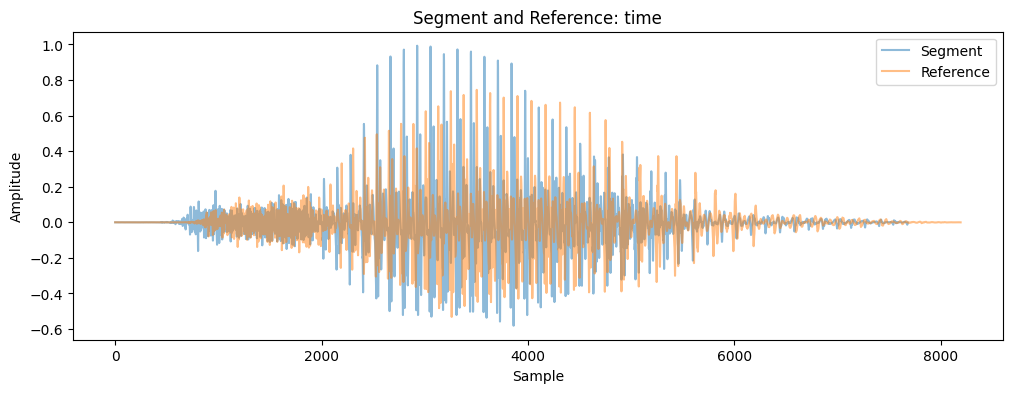

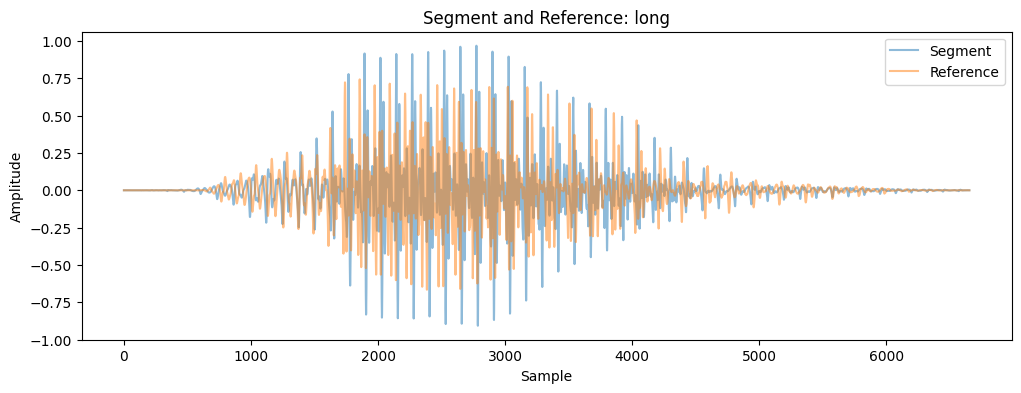

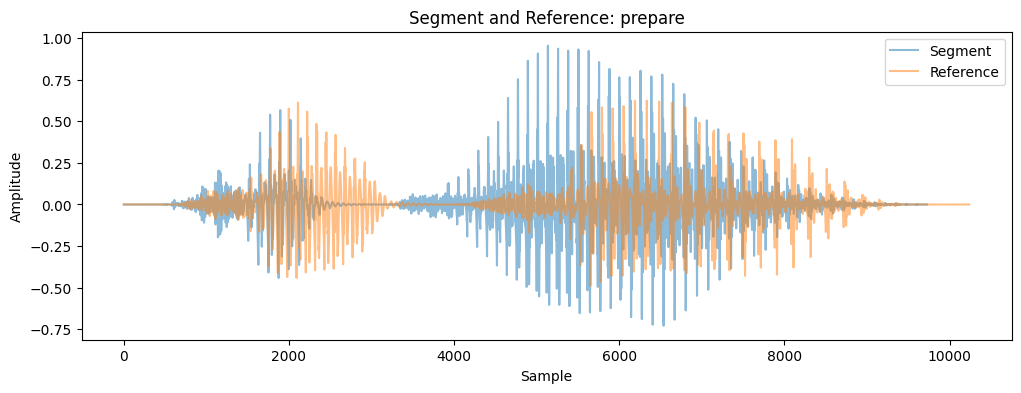

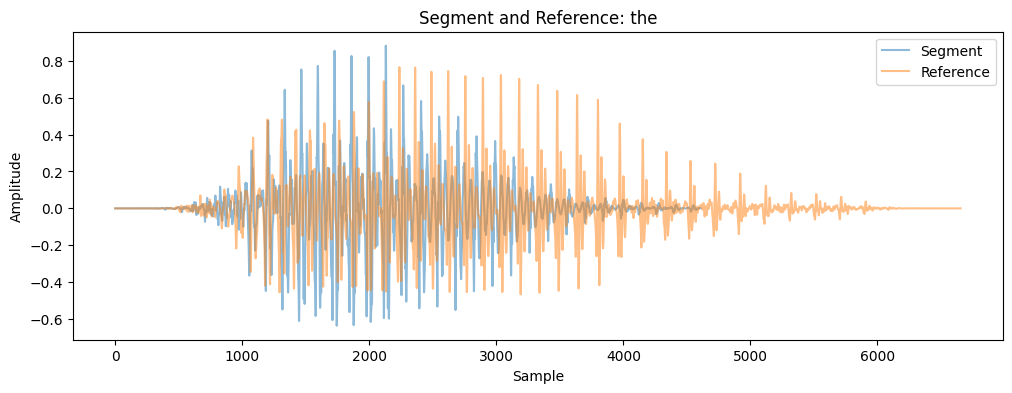

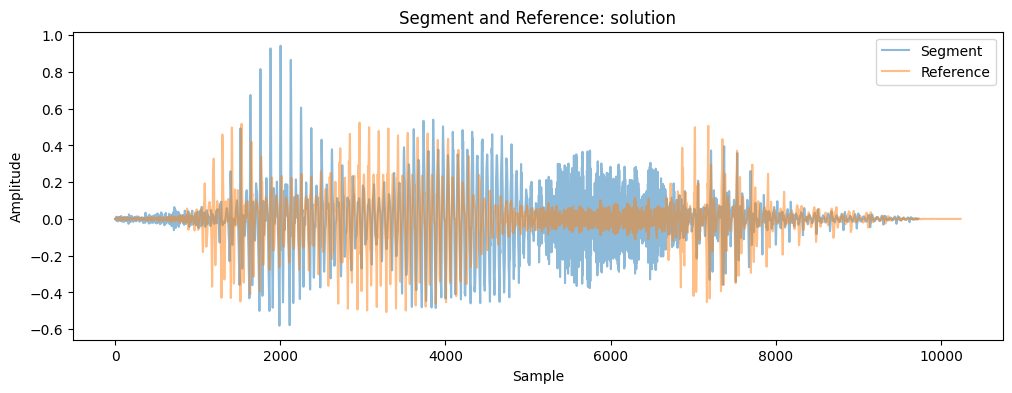

In [42]:
# load reference word signals
words = [
    "time", "prepare", "solution", "make", "mistake", "no", "the", "probable", "long", "lecture",
    "method", "disaster", "fail", "work", "advice", "idea", "succeed", "easy", "is", "for", "give"
]

engine.setProperty('voice', "com.apple.voice.compact.en-US.Samantha")
engine.setProperty('rate', 200)

audio_dir = 'words_pyttsx3'
os.makedirs(audio_dir, exist_ok=True)

# Generate and save audio for each word
for word in words:
    audio_path = os.path.join(audio_dir, f"{word}.wav")
    engine.save_to_file(word, audio_path)
    engine.runAndWait()

def load_audio_to_numpy(filename):
    signal, loaded_sr = librosa.load(filename, sr=sr)
    return signal

reference_word_signals = {}
for word in words:
    reference_word_signals[word] = load_audio_to_numpy(f"words_pyttsx3/{word}.wav")

# preprocess reference word signals
for word in words:
    reference_word_signals[word] = preprocess_signal(reference_word_signals[word], lowcut, highcut, sr)

# plot first word and the reference word
for i, signal in enumerate(signal1_segments):
    if solution1[i] not in reference_word_signals.keys():
        continue
    plt.figure(figsize=(12, 4))
    plt.plot(signal, label='Segment', alpha=0.5)
    plt.plot(reference_word_signals[solution1[i]], label='Reference', alpha=0.5)
    plt.title("Segment and Reference: " + solution1[i])
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()


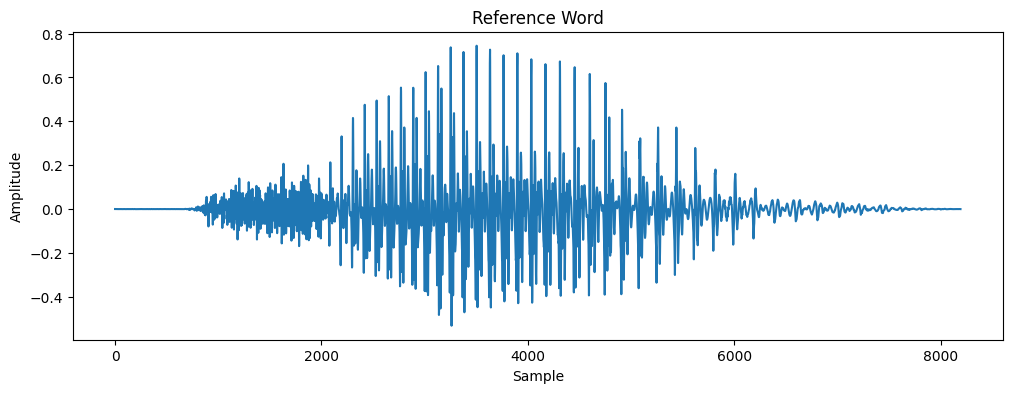

In [43]:
plt.figure(figsize=(12, 4))
plt.plot(reference_word_signals[solution1[4]])
plt.title('Reference Word')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [44]:
audio_clip = Audio(signal1_segments[0], rate=sr)
audio_clip

In [45]:
audio_clip = Audio(reference_word_signals["the"], rate=sr)
audio_clip

In [46]:
audio_clip = Audio(reference_word_signals["solution"], rate=sr)
audio_clip

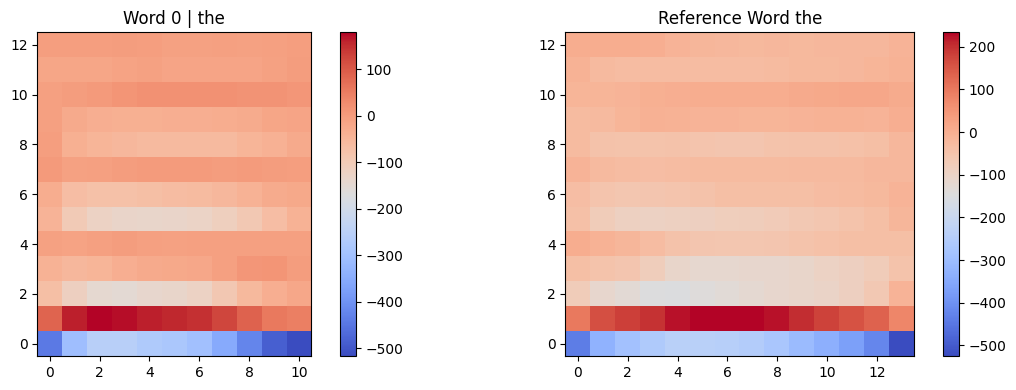

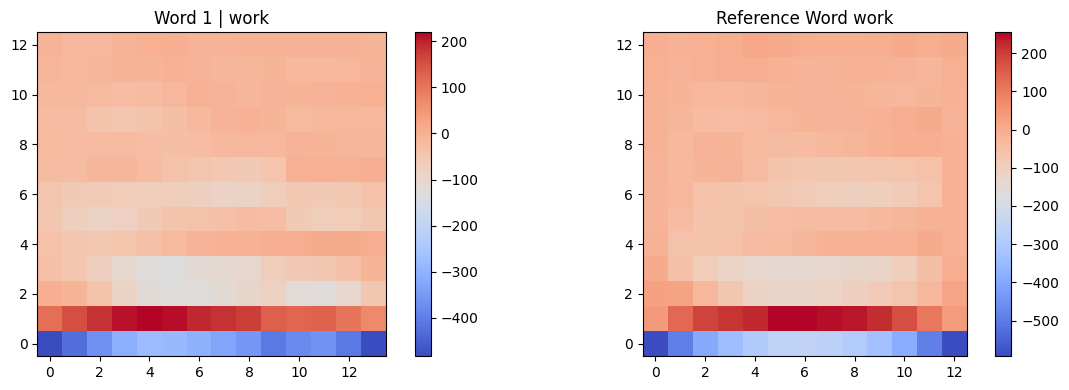

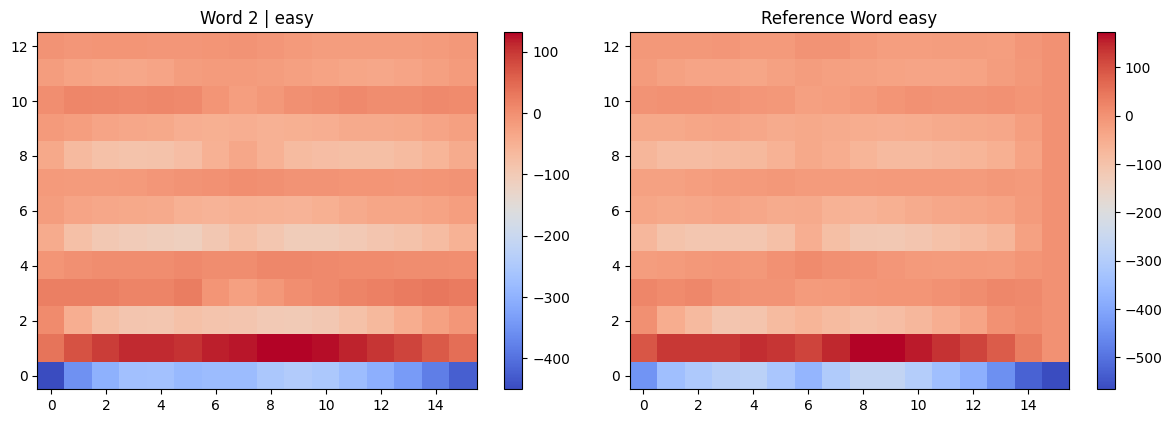

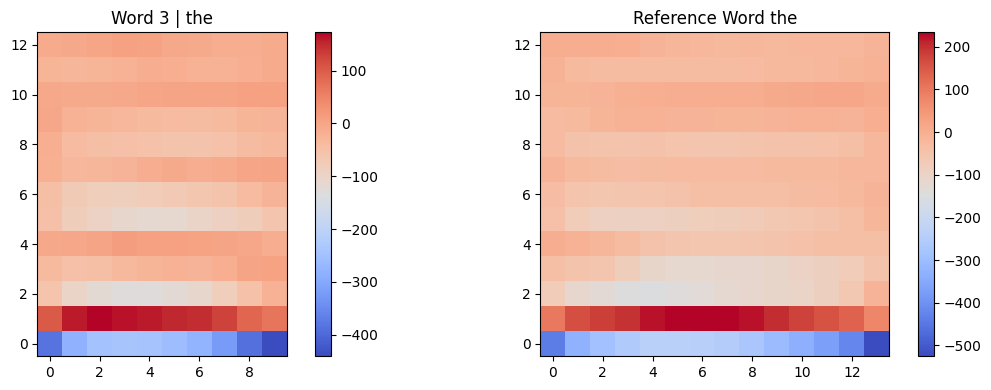

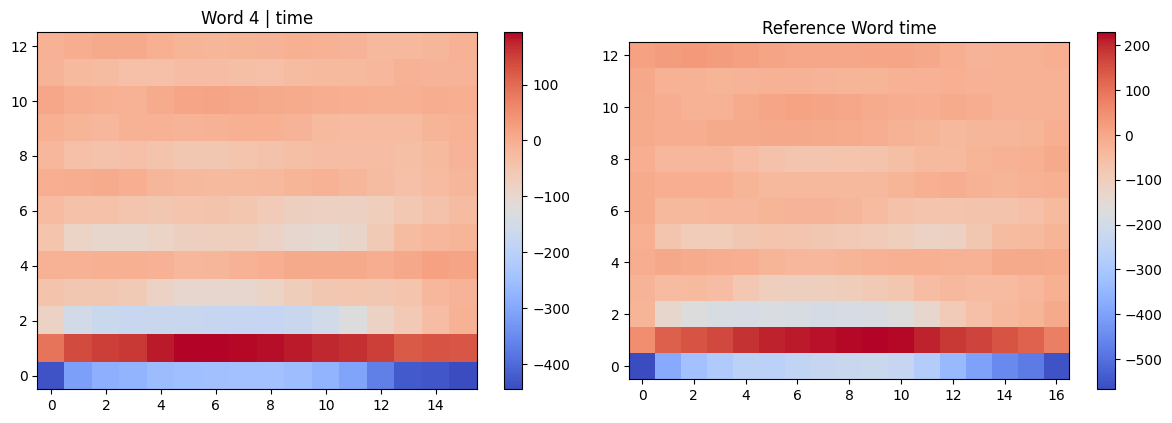

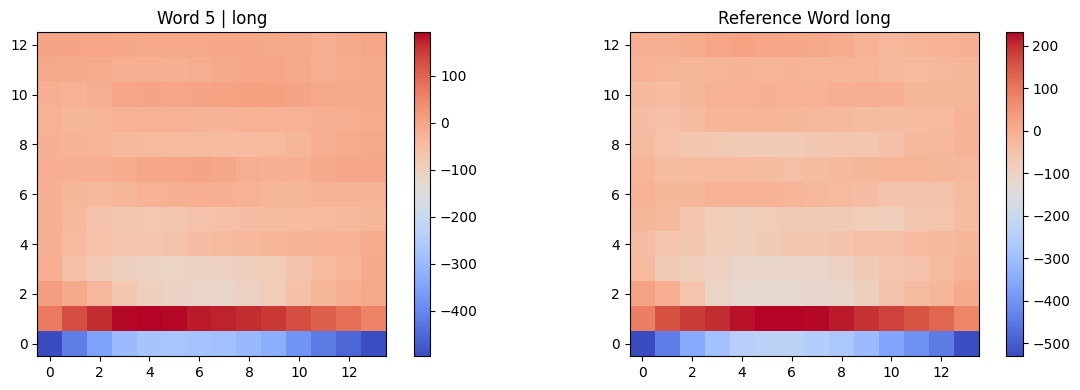

Reference MFCC for '6' not found.


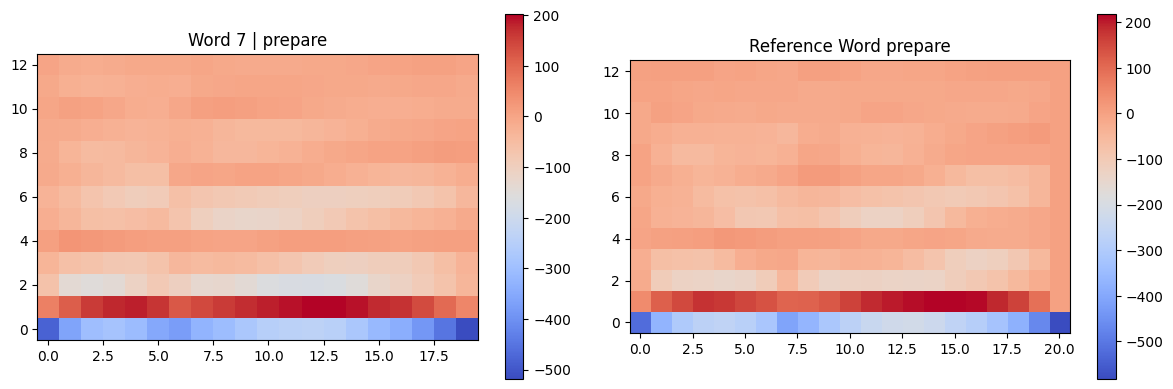

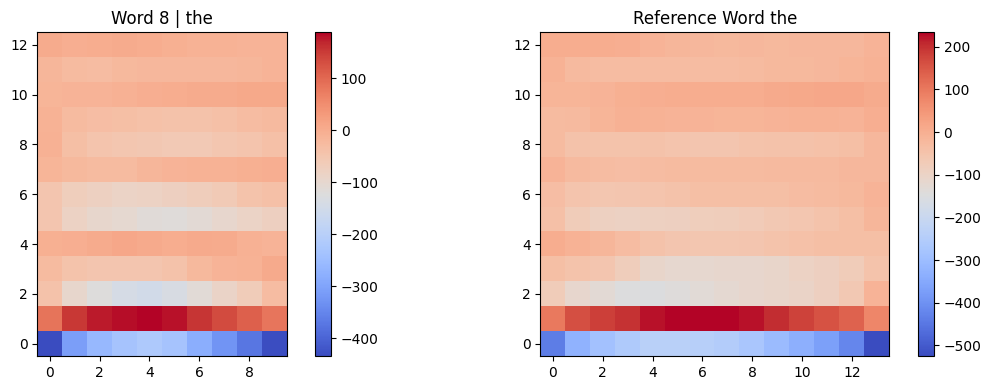

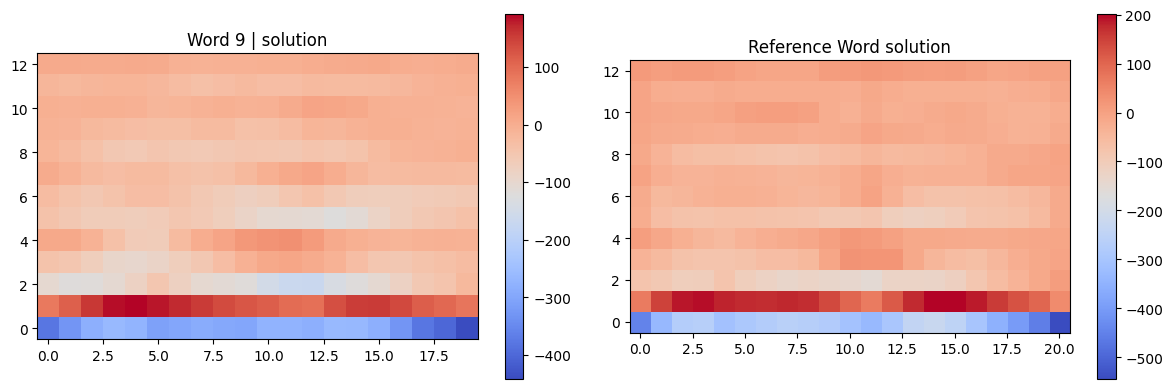

In [47]:
from matplotlib import cm

# extract mfccs
def extract_mfccs(segment, sr=22050, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T

signal1_mfccs = [extract_mfccs(segment) for segment in signal1_segments]
reference_word_mfccs = {word: extract_mfccs(reference_word_signals[word]) for word in words}

def visualize_mfccs(mfccs, reference_mfccs, solution):
    for i, mfcc in enumerate(mfccs):
        if i >= len(solution) or solution[i] not in reference_mfccs:
            print(f"Reference MFCC for '{i}' not found.")
            continue

        fig, ax = plt.subplots(1, 2, figsize=(12, 4))

        # Plot the first MFCC
        mfcc_data_1 = np.swapaxes(mfcc, 0, 1)
        cax1 = ax[0].imshow(mfcc_data_1, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
        ax[0].set_title("Word " + str(i) + " | " + solution[i])
        fig.colorbar(cax1, ax=ax[0])

        # Plot the second MFCC
        mfcc_data_2 = np.swapaxes(reference_mfccs[solution[i]], 0, 1)
        cax2 = ax[1].imshow(mfcc_data_2, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
        ax[1].set_title("Reference Word " + solution[i])
        fig.colorbar(cax2, ax=ax[1])

        plt.tight_layout()
        plt.show()

# Example usage
visualize_mfccs(signal1_mfccs, reference_word_mfccs, solution1)



In [48]:
from fastdtw import fastdtw
import seaborn as sns

def compare_mfccs(mfcc1, mfcc2):
    distance, _ = fastdtw(mfcc1, mfcc2, dist=scipy.spatial.distance.euclidean)
    return distance

def compare_mfcc_sets(mfccs, reference_mfccs):
    distances = np.zeros((len(mfccs), len(reference_mfccs)))
    for i, mfcc in enumerate(mfccs):
        for j, word in enumerate(words):
            distance = compare_mfccs(mfcc, reference_mfccs[word])
            distances[i, j] = distance
    return distances

distances1 = compare_mfcc_sets(signal1_mfccs, reference_word_mfccs)


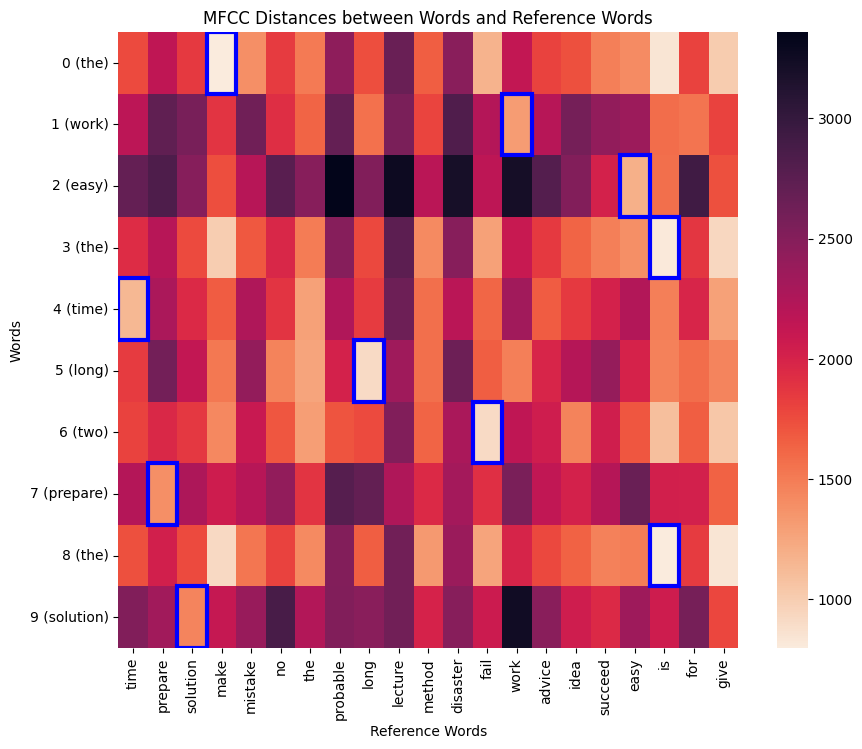

In [56]:
def visualize_mfcc_distances(distances, solution):
    plt.figure(figsize=(10, 8))
    yticklabels = [f"{i} ({solution[i]})" for i in range(distances.shape[0]) if i < len(solution)]
    heatmap = sns.heatmap(distances, cmap='rocket_r', xticklabels=reference_word_mfccs, yticklabels=yticklabels)
    
    # Find and highlight the minimum distance in each row
    for i, row in enumerate(distances):
        min_col_idx = np.argmin(row)
        heatmap.add_patch(plt.Rectangle((min_col_idx, i), 1, 1, fill=False, edgecolor='blue', lw=3))

    plt.title("MFCC Distances between Words and Reference Words")
    plt.xlabel("Reference Words")
    plt.ylabel("Words")
    plt.show()

visualize_mfcc_distances(distances1, solution1)


In [109]:
def evaluate_result(distances, solution, print_result=True):
    correct = 0
    result = []
    for i, row in enumerate(distances):
        min_col_idx = np.argmin(row)
        result.append(words[min_col_idx])
        if i >= len(solution):
            print(f"Word {i} is not in the solution.")
            continue
        if words[min_col_idx] == solution[i]:
            correct += 1
        else:
            if print_result:
                print(f"Word {i} should be {solution[i]}, but was {words[min_col_idx]}")

    if print_result:
        print(f"Correct: {correct}/{len(solution)}")
    return result

result = evaluate_result(distances1, solution1)
print(result)

Word 0 should be the, but was make
Word 3 should be the, but was is
Word 6 should be two, but was fail
Word 8 should be the, but was is
Correct: 6/10
['make', 'work', 'easy', 'is', 'time', 'long', 'fail', 'prepare', 'is', 'solution']


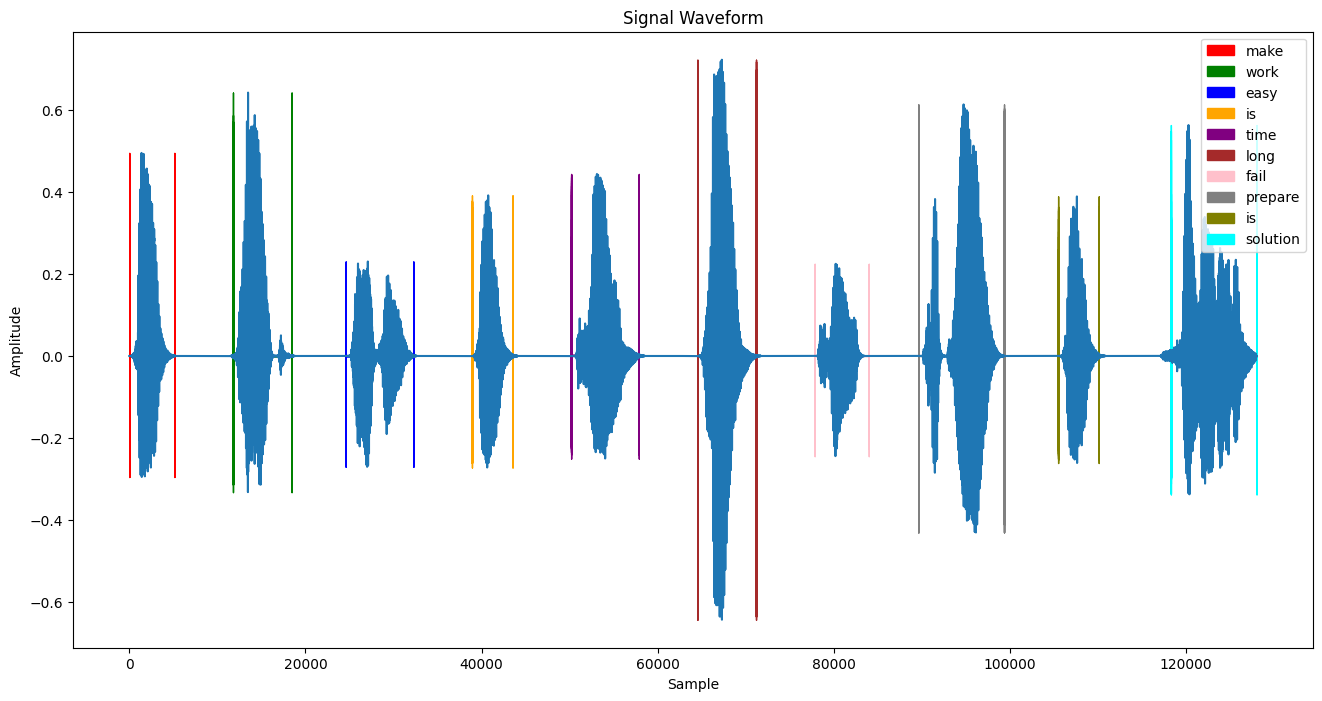

In [111]:
def colored_original_signal(signal, bounds, result):
    plt.figure(figsize=(16, 8))
    plt.plot(signal)
    plt.title("Signal Waveform")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    
    # Keep track of the last end to avoid overlapping colors if not needed
    last_end = 0
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    for i, (start, end) in enumerate(bounds):
        if start < last_end:
            start = last_end
        # Use a different color for each bound, cycle through colors list if there are more bounds than colors
        color = colors[i % len(colors)]
        word_range = np.zeros(len(signal))
        word_range[start:end] = np.ones(end - start)
        plt.fill_betweenx(signal[start:end], start, end, color=color, alpha=1, label=result[i])
        last_end = end
    
    plt.legend()
    plt.show()

colored_original_signal(signal1, segment_signal(signal1, indexes=True, plot=False), result)

## Signál 2

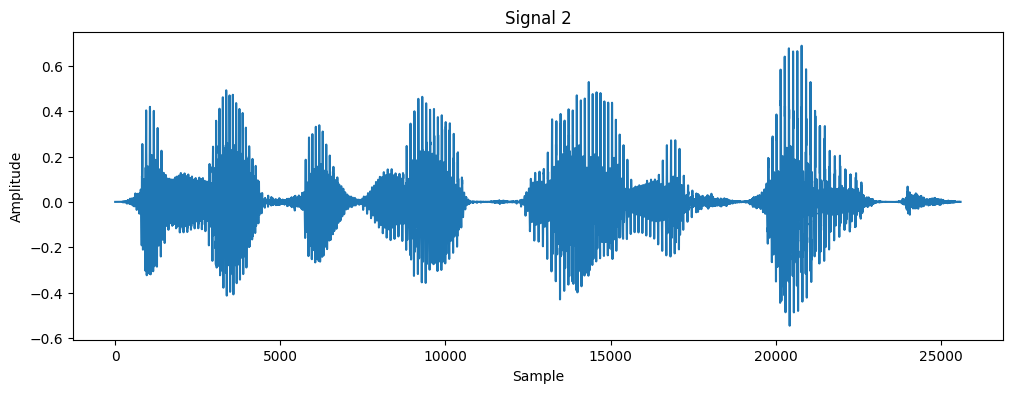

In [51]:
signal2 = load_signal('Signal2.txt')
signal2 = preprocess_signal(signal2, lowcut, highcut, sr)

plt.figure(figsize=(12, 4))
plt.plot(signal2)
plt.title('Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

audio_clip = Audio(signal2, rate=sr)
audio_clip

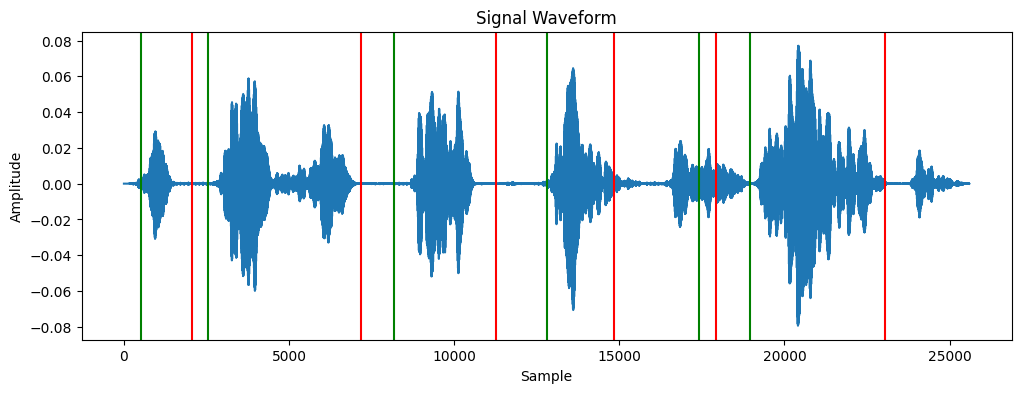

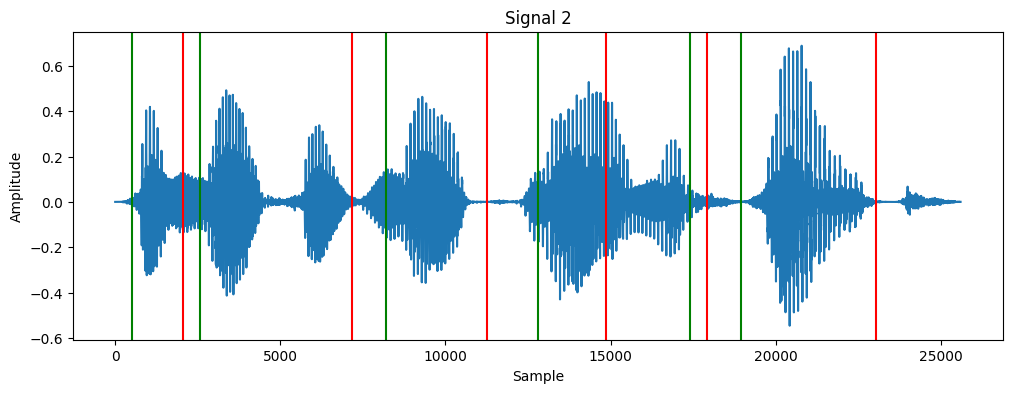

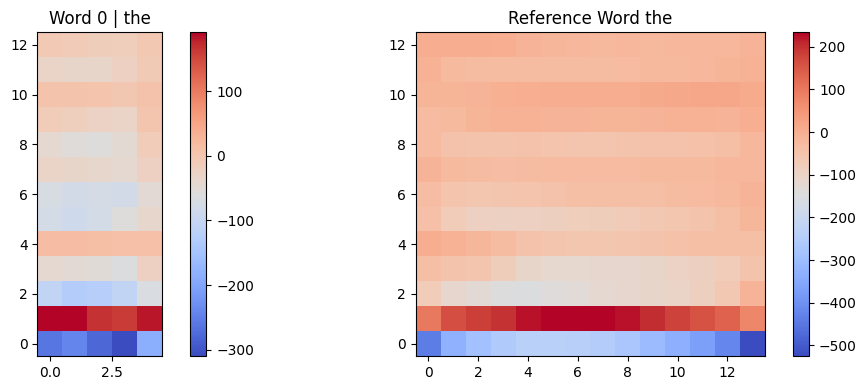

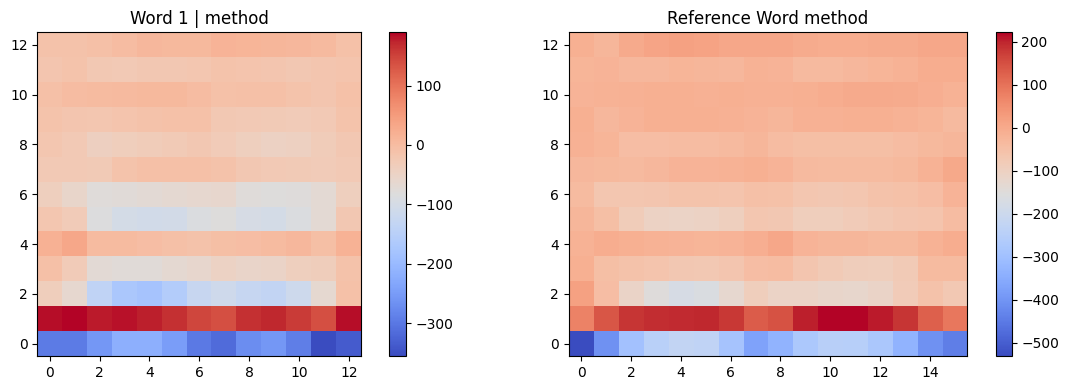

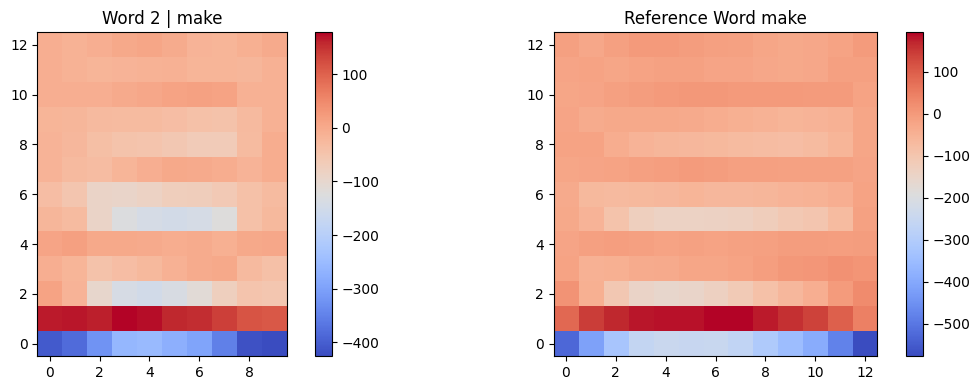

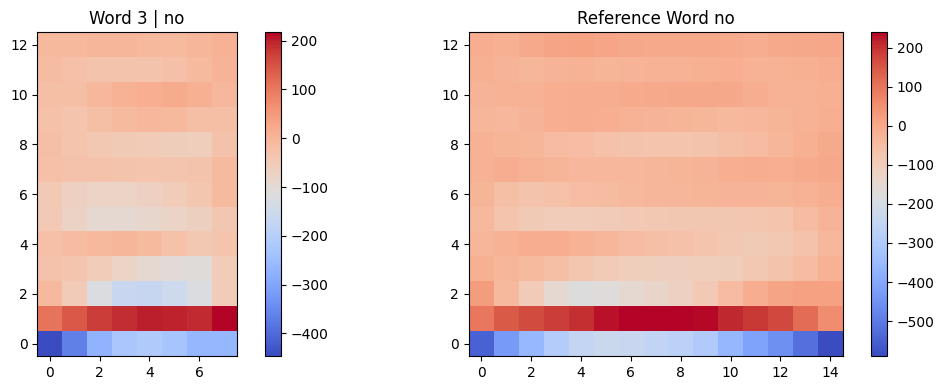

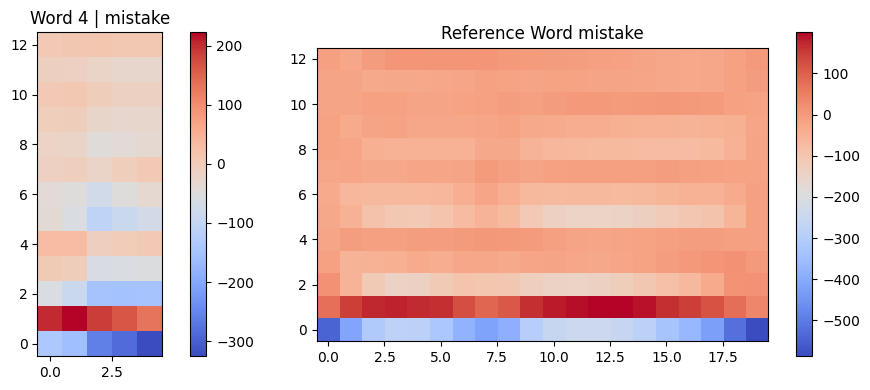

Reference MFCC for '5' not found.


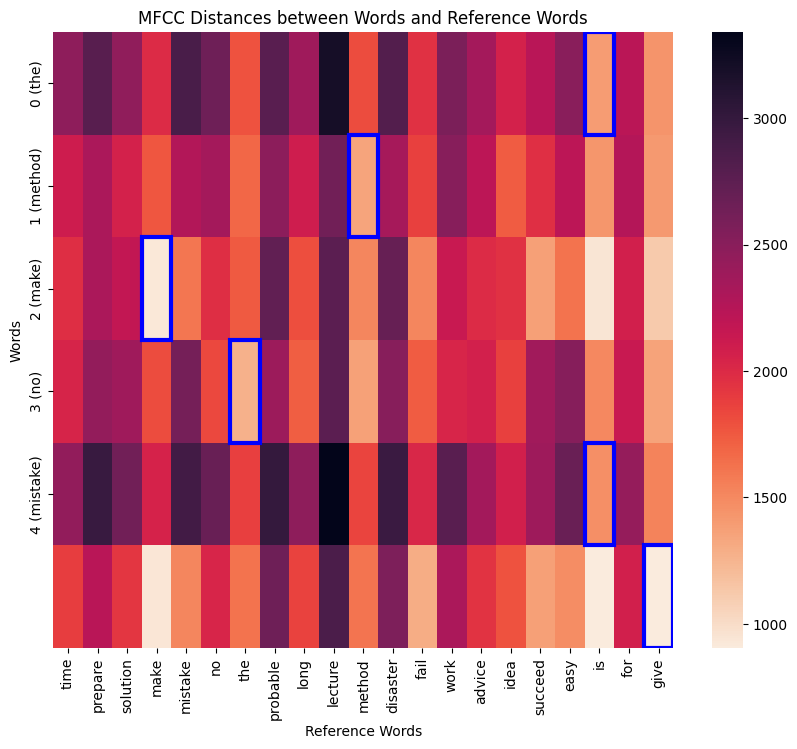

Word 0 should be the, but was is
Word 3 should be no, but was the
Word 4 should be mistake, but was is
Word 5 is not in the solution.
Correct: 2/5


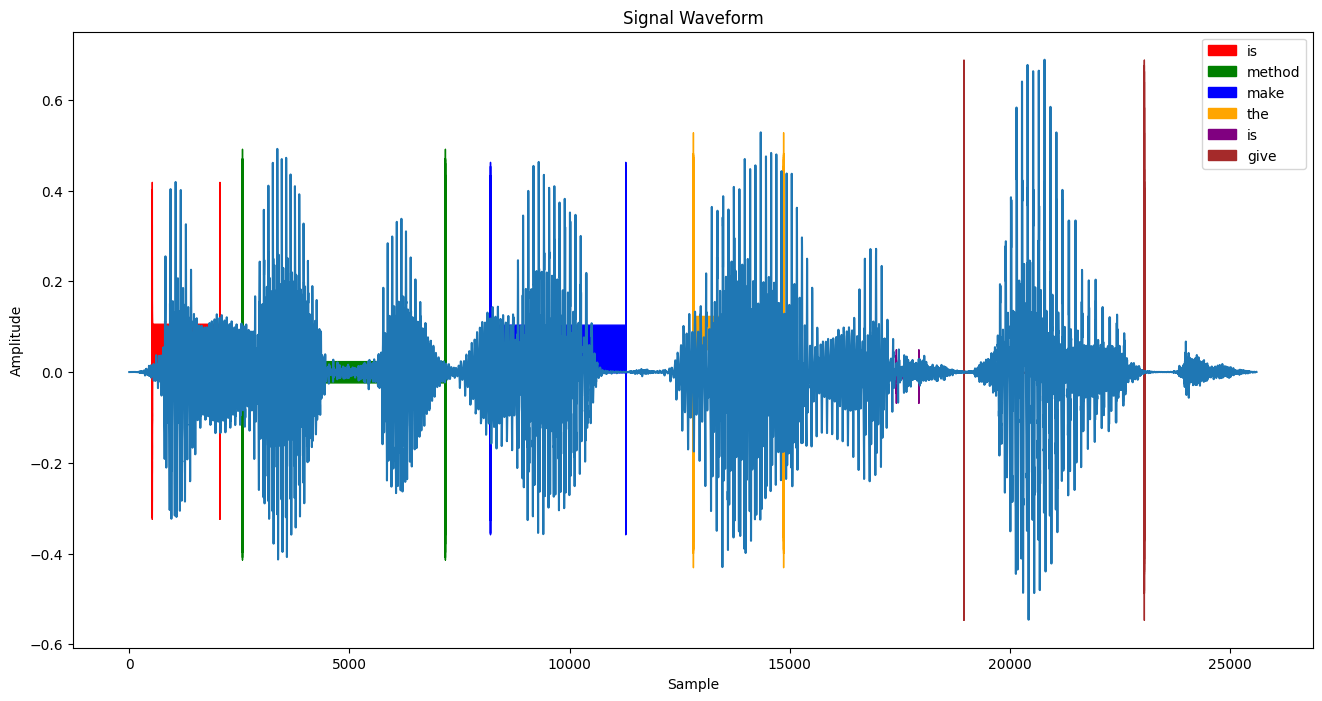

In [116]:
# the method make no mistake
solution2 = ["the", "method", "make", "no", "mistake"]

# signal2_segments = [preprocess_signal(segment, lowcut, highcut, sr) for segment in segment_signal(signal2)]

def calculate_energy(signal, frame_length=1024, hop_length=512):
    energy = np.array([
        np.sum(np.abs(signal[i:i+frame_length]**2))
        for i in range(0, len(signal), hop_length)
    ])
    return energy

def segment_signal_advanced(signal, frame_length=1024, hop_length=512, energy_threshold=0.2, plot=False):
    # Calculate short-term energy
    energy = calculate_energy(signal, frame_length, hop_length)
    
    # Normalize energy
    energy = energy / np.max(energy)

    # Find segments where energy exceeds a threshold
    indices = np.where(energy > energy_threshold)[0]
    speech_segments = []

    if len(indices) > 0:
        # Convert frame indices to sample indices
        start = indices[0] * hop_length
        for i in range(1, len(indices)):
            if indices[i] > indices[i-1] + 1:
                end = indices[i-1] * hop_length + frame_length
                speech_segments.append(signal[start:end])
                start = indices[i] * hop_length
        end = indices[-1] * hop_length + frame_length
        speech_segments.append(signal[start:end])

    # Plotting
    if plot:
      plt.figure(figsize=(12, 4))
      plt.plot(signal)
      plt.plot(np.arange(0, len(signal), hop_length), energy / np.max(energy), color='r')
      plt.title('Signal and Energy')
      plt.xlabel('Sample')
      plt.ylabel('Amplitude/Energy')
      for segment in speech_segments:
          start = np.where(signal == segment[0])[0][0]
          end = start + len(segment)
          plt.axvline(x=start, color="green")
          plt.axvline(x=end, color="red")
      plt.show()
    
    return speech_segments

# results = []
# thresholds = np.arange(0, 1, 0.01)
# for threshold in thresholds:
#     try:
#         signal2_segments = [preprocess_signal(segment, lowcut, highcut, sr) for segment in segment_signal_advanced(signal2, energy_threshold=threshold)]
#         signal2_mfccs = [extract_mfccs(segment) for segment in signal2_segments]
#         distances2 = compare_mfcc_sets(signal2_mfccs, reference_word_mfccs)
#         results.append(evaluate_result(distances2, solution2, False))
#     except:
#         results.append(0)

# plt.figure(figsize=(12, 4))
# plt.plot(thresholds, results)
# plt.title("Accuracy for Energy Threshold")
# plt.xlabel("Energy Threshold")
# plt.ylabel("Accuracy")
# plt.show()

sykavky = preprocess_signal(signal2, 3000, 4000, sr)
non_silent_parts = segment_signal(sykavky, top_db=11.7, indexes=True)

plt.figure(figsize=(12, 4))
plt.plot(signal2)
plt.title('Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
for start, end in non_silent_parts:
    plt.axvline(x=start, color="green")
    plt.axvline(x=end, color="red")
plt.show()

# segment by the non-silent parts
signal2_segments = [preprocess_signal(signal2[start - 1000 if start - 1000 > 0 else start:end + 1000], lowcut, highcut, sr) for start, end in non_silent_parts]
signal2_mfccs = [extract_mfccs(segment) for segment in signal2_segments]
visualize_mfccs(signal2_mfccs, reference_word_mfccs, solution2)
distances2 = compare_mfcc_sets(signal2_mfccs, reference_word_mfccs)
visualize_mfcc_distances(distances2, solution2)
result2 = evaluate_result(distances2, solution2)
colored_original_signal(signal2, non_silent_parts, result2)


In [53]:
def segment_signal_zcr_energy(signal, sr=22050, frame_length=1024, hop_length=512, energy_threshold=0.02, zcr_threshold=0.02):
    # Calculate energy and ZCR
    energy = librosa.feature.rms(y=signal, frame_length=frame_length, hop_length=hop_length)[0]
    zcr = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_length, hop_length=hop_length)[0]
    
    # Normalize energy and ZCR
    energy = energy / np.max(energy)
    zcr = zcr / np.max(zcr)

    # Find segments where energy and ZCR exceed their respective thresholds
    energy_indices = np.where(energy > energy_threshold)[0]
    zcr_indices = np.where(zcr > zcr_threshold)[0]
    combined_indices = np.union1d(energy_indices, zcr_indices)

    # Segment the speech
    speech_segments = []
    if len(combined_indices) > 0:
        start = combined_indices[0] * hop_length
        for i in range(1, len(combined_indices)):
            if combined_indices[i] > combined_indices[i-1] + 1:
                end = combined_indices[i-1] * hop_length + frame_length
                speech_segments.append(signal[start:end])
                start = combined_indices[i] * hop_length
        end = combined_indices[-1] * hop_length + frame_length
        speech_segments.append(signal[start:end])

    return speech_segments

# results = []
# thresholds = np.arange(0, 0.1, 0.001)
# for threshold in thresholds:
#     try:
#         signal2_segments = [preprocess_signal(segment, lowcut, highcut, sr) for segment in segment_signal_zcr_energy(signal2, energy_threshold=0.03 + threshold, zcr_threshold=0.97 + threshold)]
#         signal2_mfccs = [extract_mfccs(segment) for segment in signal2_segments]
#         distances2 = compare_mfcc_sets(signal2_mfccs, reference_word_mfccs)
#         results.append(evaluate_result(distances2, solution2, False))
#     except:
#         print(f"Threshold {threshold} failed")
#         results.append(0)

# plt.figure(figsize=(12, 4))
# plt.plot(thresholds, results)
# plt.title("Accuracy for Energy Threshold")
# plt.xlabel("Energy Threshold")
# plt.ylabel("Accuracy")
# plt.show()

# signal2_segments = [preprocess_signal(segment, lowcut, highcut, sr) for segment in segment_signal_zcr_energy(signal2)]
# signal2_mfccs = [extract_mfccs(segment) for segment in signal2_segments]
# distances2 = compare_mfcc_sets(signal2_mfccs, reference_word_mfccs)
# evaluate_result(distances2, solution2)


## Signál 3

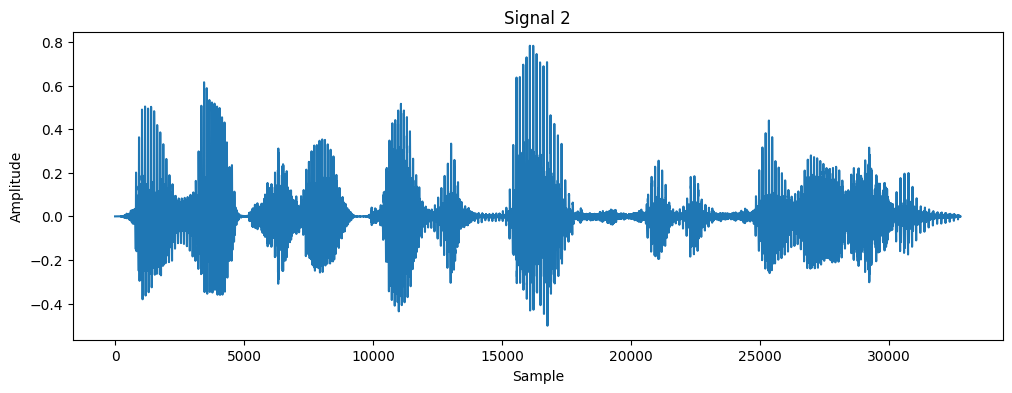

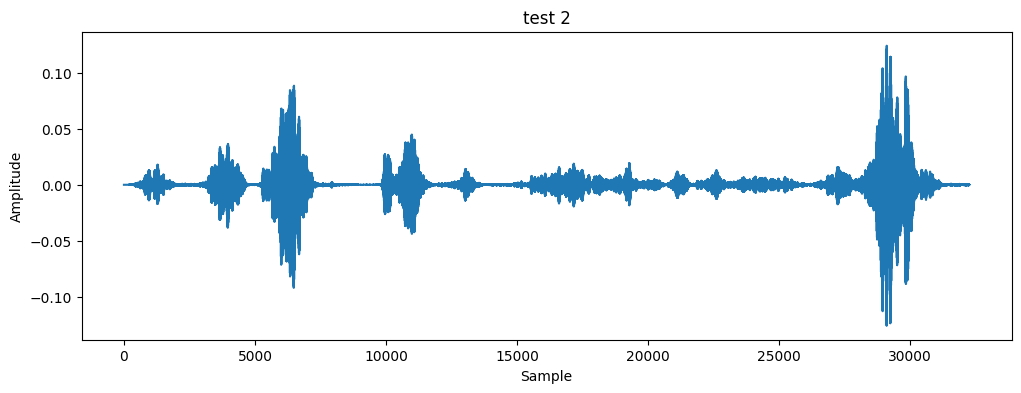

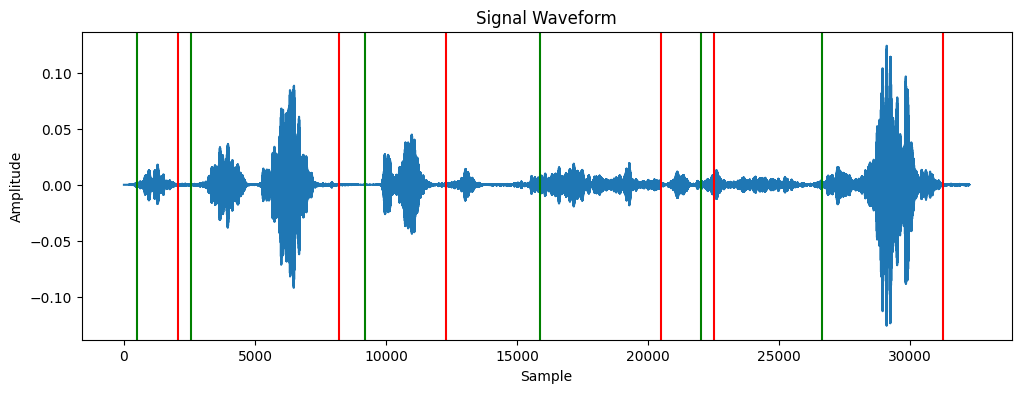

In [54]:
signal3 = load_signal('Signal3.txt')
signal3 = preprocess_signal(signal3, lowcut, highcut, sr)

plt.figure(figsize=(12, 4))
plt.plot(signal3)
plt.title('Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

audio_clip = Audio(signal3, rate=sr)
audio_clip

test = preprocess_signal(signal3, 3000, 4000, sr)

plt.figure(figsize=(12, 4))
plt.plot(test)
plt.title('test 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

test_segments = segment_signal(test, top_db=20)

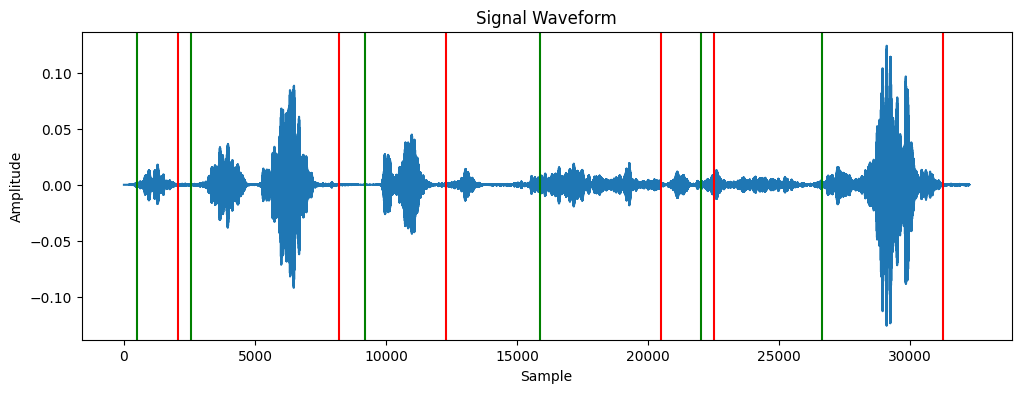

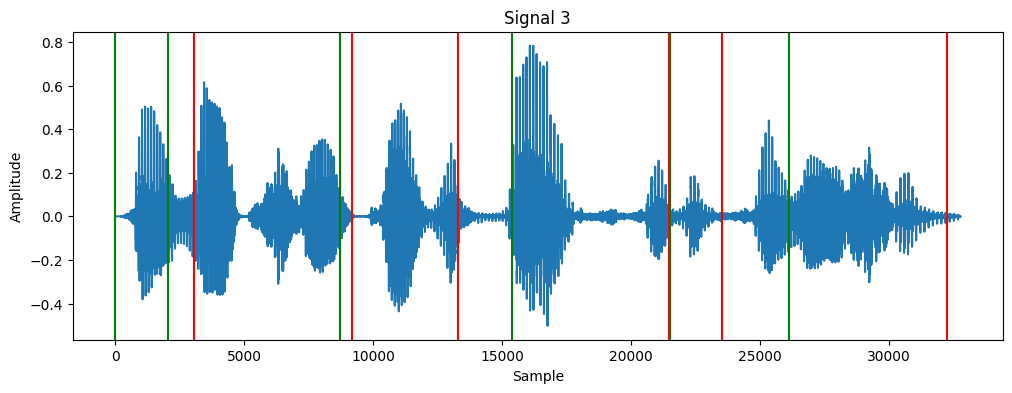

/Users/lpriban/Desktop/codegarden/pzs/sem_2/venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2012
  warnings.warn(


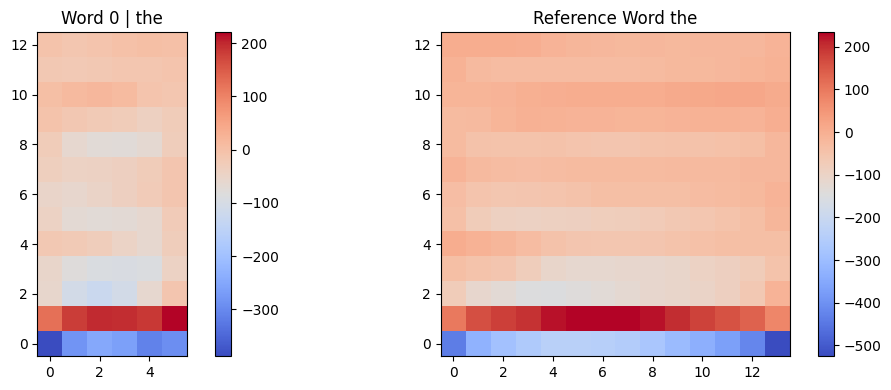

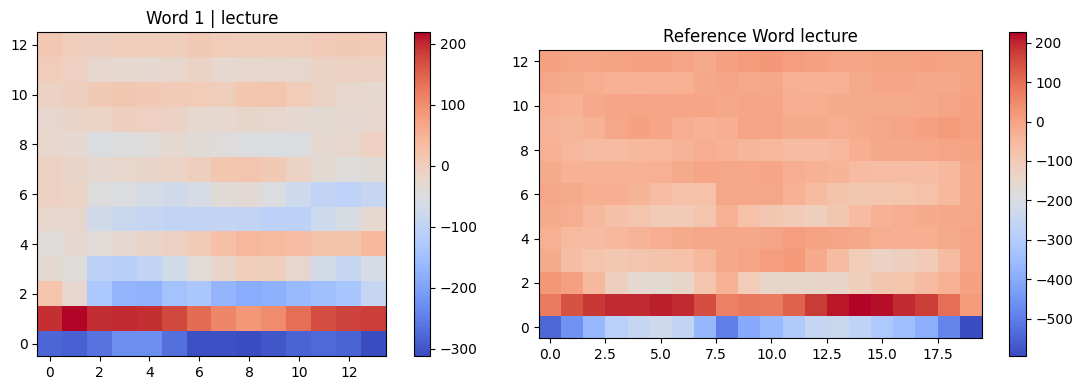

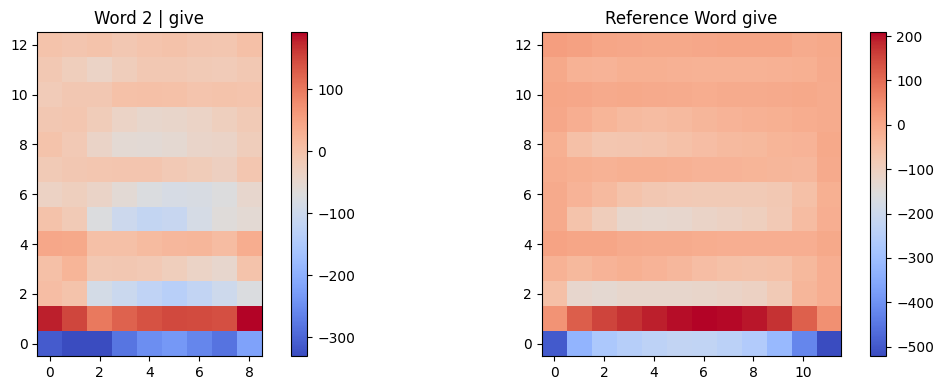

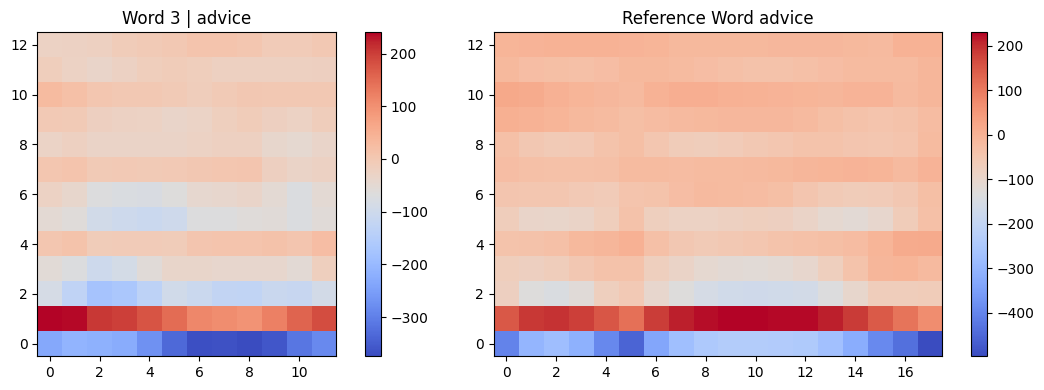

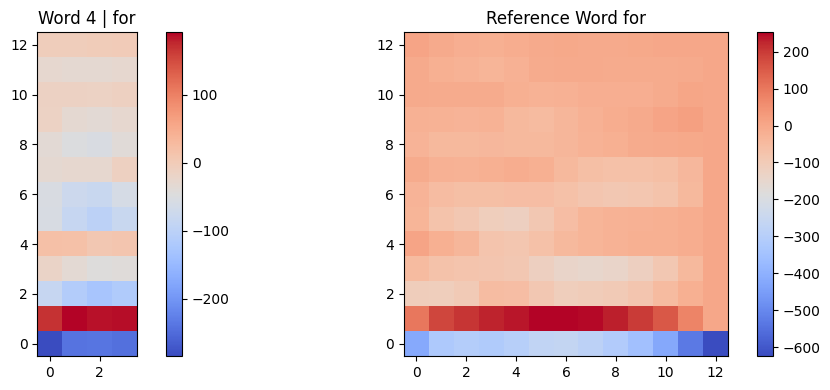

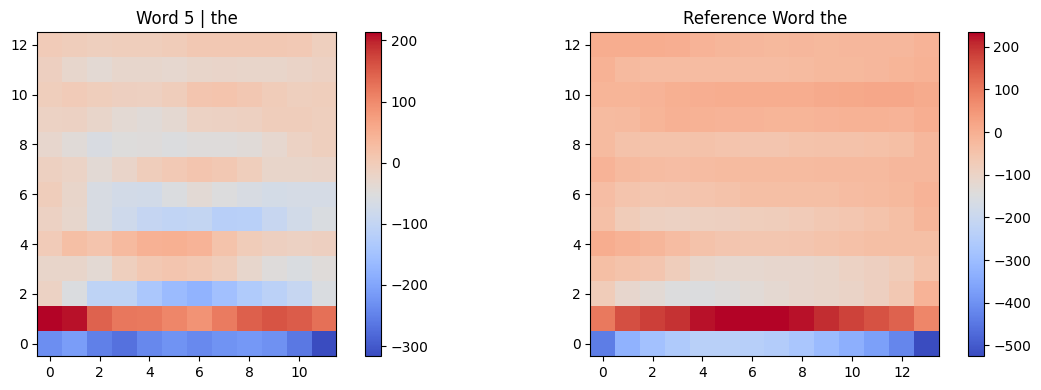

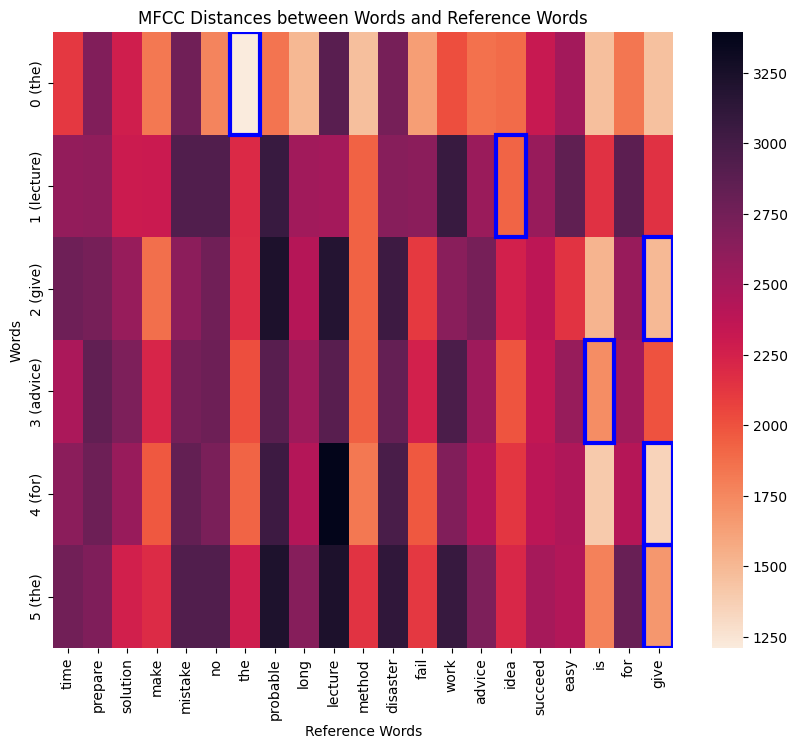

Word 1 should be lecture, but was idea
Word 3 should be advice, but was is
Word 4 should be for, but was give
Word 5 should be the, but was give
Correct: 2/7


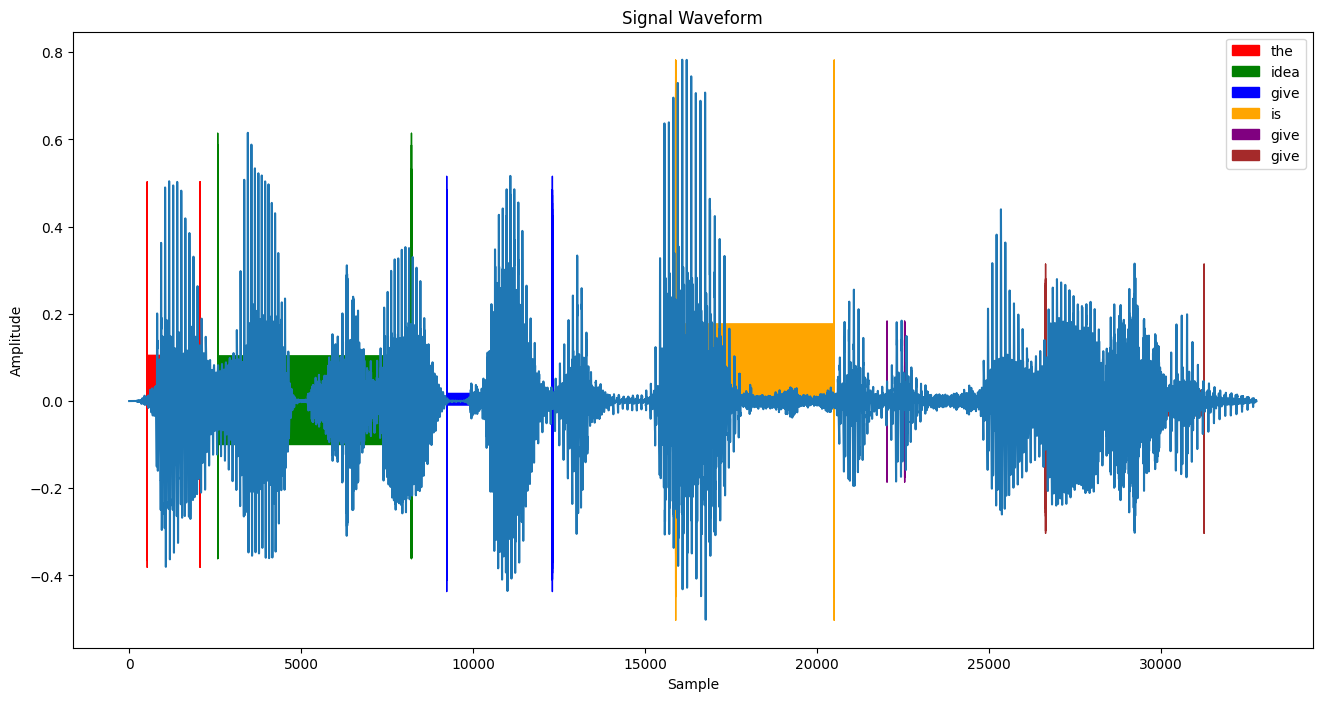

In [115]:
# the lecture give advice for the solution
solution3 = ["the", "lecture", "give", "advice", "for", "the", "solution"]

sykavky = preprocess_signal(signal3, 3000, 4000, sr)
non_silent_parts = segment_signal(sykavky, top_db=20, indexes=True)

plt.figure(figsize=(12, 4))
plt.plot(signal3)
plt.title('Signal 3')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

widen_pre = 500
widen_post = 1000

for start, end in non_silent_parts:
    start = start - widen_pre if start - widen_pre > 0 else start
    end = end + widen_post
    plt.axvline(x=start, color="green")
    plt.axvline(x=end, color="red")
plt.show()

# segment by the non-silent parts
signal3_segments = [preprocess_signal(signal3[start - widen_pre if start - widen_pre > 0 else start:end + widen_post], lowcut, highcut, sr) for start, end in non_silent_parts]
signal3_mfccs = [extract_mfccs(segment) for segment in signal3_segments]
visualize_mfccs(signal3_mfccs, reference_word_mfccs, solution3)
distances3 = compare_mfcc_sets(signal3_mfccs, reference_word_mfccs)
visualize_mfcc_distances(distances3, solution3)
result3 = evaluate_result(distances3, solution3)
colored_original_signal(signal3, non_silent_parts, result3)